#Pre-entrega 3: Modelos Predictivos Supervisados

### üß≠ OBJETIVO GENERAL

Desarrollar y entrenar modelos predictivos para entender la evoluci√≥n y proyecci√≥n futura de la producci√≥n de gas natural en Argentina, haciendo foco en el crecimiento de los recursos no convencionales (shale y tight).

In [3]:
!pip install numpy==1.24.3 pmdarima==2.0.3 --force-reinstall --no-cache-dir

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 91.2/91.2 kB 17.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 99.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.3/17.3 MB 155.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 87.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.2/3.2 MB 133.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 307.7/307.7 kB 82.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [2]:
#Importamos librer√≠as a utilizar
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import TimeSeriesSplit
from prophet import Prophet
# Importar funciones para validaci√≥n cruzada de Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import warnings
# Importar product para iterar sobre combinaciones de par√°metros
from itertools import product

# Importar para ARIMA y SARIMA
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings('ignore')

## Dataset1

#### üîç Carga e inspecci√≥n del Dataset1

Se carg√≥ el archivo `dataset1_editado`, que contiene la informaci√≥n a analizar y modelar ya filtrada y transformada. Se revisaron columnas, tipos de datos y valores nulos. Se cre√≥ una columna fecha y se visualiz√≥ la evoluci√≥n de la producci√≥n de gas.

In [ ]:
df1 = pd.read_csv('/content/dataset1_editado.csv')

In [ ]:
df1.head()

indice_tiempo  produccion_gas_natural_cuenca_austral  \
0    2014-01-01                            885167.3714   
1    2014-02-01                            793800.6656   
2    2014-03-01                            879715.0346   
3    2014-04-01                            740749.0121   
4    2014-05-01                            880061.9141   

   produccion_gas_natural_cuenca_gsj  produccion_gas_natural_cuenca_neuquina  \
0                        442014.6605                            1.944920e+06   
1                        403246.2098                            1.756761e+06   
2                        453502.3597                            1.885451e+06   
3                        438266.3703                            1.833150e+06   
4                        445484.1645                            1.966218e+06   

   produccion_gas_natural_cuenca_noroeste  \
0                             263495.3680   
1                             233504.3885   
2                             254380.6826   
3                             239112.5697   
4                             247344.8389   

   produccion_gas_natural_cuenca_cuyana  produccion_gas_natural_total  \
0                             4599.6114                  3.540197e+06   
1                             4352.7275                  3.191665e+06   
2                             4891.7040                  3.477941e+06   
3                             4763.2185                  3.256041e+06   
4                             4877.9888                  3.543987e+06   

   produccion_shale_gas  produccion_tight_gas  anio  \
0          23465.959800          314046.25217  2014   
1          22807.990191          284537.62290  2014   
2          24844.175160          311893.06300  2014   
3          30990.912010          313487.91707  2014   
4          39014.194660          357115.97376  2014   

   produccion_no_convencional  produccion_convencional  mes  
0               337512.211970             3.202685e+06    1  
1               307345.613091             2.884319e+06    2  
2               336737.238160             3.141204e+06    3  
3               344478.829080             2.911563e+06    4  
4               396130.168420             3.147856e+06    5

In [ ]:
df1.shape

(132, 13)

In [ ]:
df1.dtypes

indice_tiempo                              object
produccion_gas_natural_cuenca_austral     float64
produccion_gas_natural_cuenca_gsj         float64
produccion_gas_natural_cuenca_neuquina    float64
produccion_gas_natural_cuenca_noroeste    float64
produccion_gas_natural_cuenca_cuyana      float64
produccion_gas_natural_total              float64
produccion_shale_gas                      float64
produccion_tight_gas                      float64
anio                                        int64
produccion_no_convencional                float64
produccion_convencional                   float64
mes                                         int64
dtype: object

In [ ]:
df1.isna().sum()

indice_tiempo                             0
produccion_gas_natural_cuenca_austral     0
produccion_gas_natural_cuenca_gsj         0
produccion_gas_natural_cuenca_neuquina    0
produccion_gas_natural_cuenca_noroeste    0
produccion_gas_natural_cuenca_cuyana      0
produccion_gas_natural_total              0
produccion_shale_gas                      0
produccion_tight_gas                      0
anio                                      0
produccion_no_convencional                0
produccion_convencional                   0
mes                                       0
dtype: int64

#### üìä Visualizaci√≥n del Dataset1

Se analizo la evoluci√≥n mensual y anual de la producci√≥n de gas en Argentina desde 2014-2024. Se visualiz√≥ la correlaci√≥n de las variables con la producci√≥n total de gas natural.

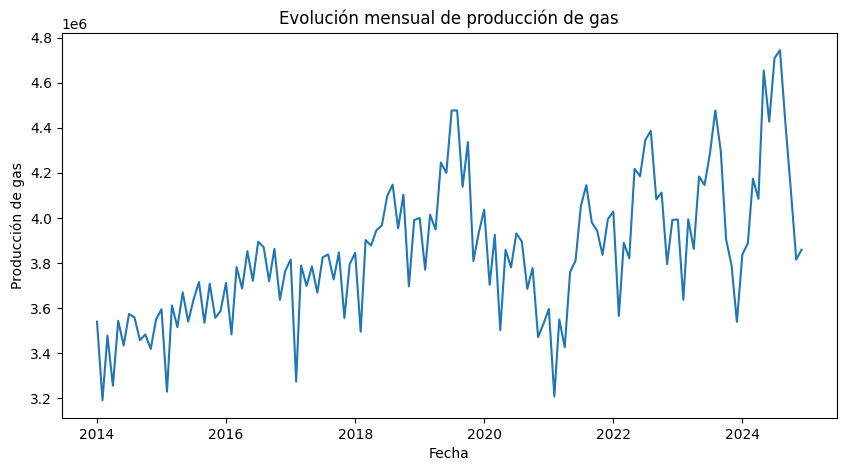

In [ ]:
# Ver evoluci√≥n temporal(Mensual)
# Crear columna de fecha solo para visualizaci√≥n
df1['fecha'] = pd.to_datetime(df1.rename(columns={'anio': 'year', 'mes': 'month'})[['year', 'month']].assign(day=1))

plt.figure(figsize=(10, 5))
sns.lineplot(data=df1, x='fecha', y='produccion_gas_natural_total')  # aseg√∫rate que 'prod_gas' sea el nombre correcto
plt.title("Evoluci√≥n mensual de producci√≥n de gas")
plt.xlabel("Fecha")
plt.ylabel("Producci√≥n de gas")
plt.show()

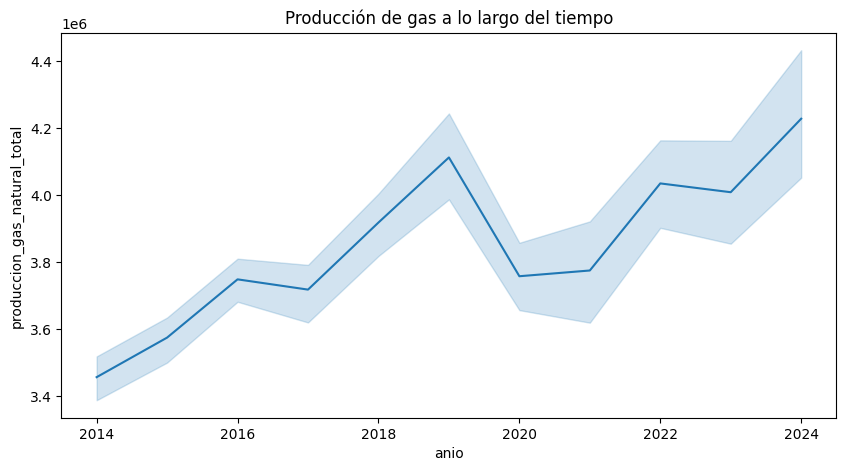

In [ ]:
# Ver evoluci√≥n temporal(Anual)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df1, x='anio', y='produccion_gas_natural_total')
plt.title("Producci√≥n de gas a lo largo del tiempo")
plt.show()

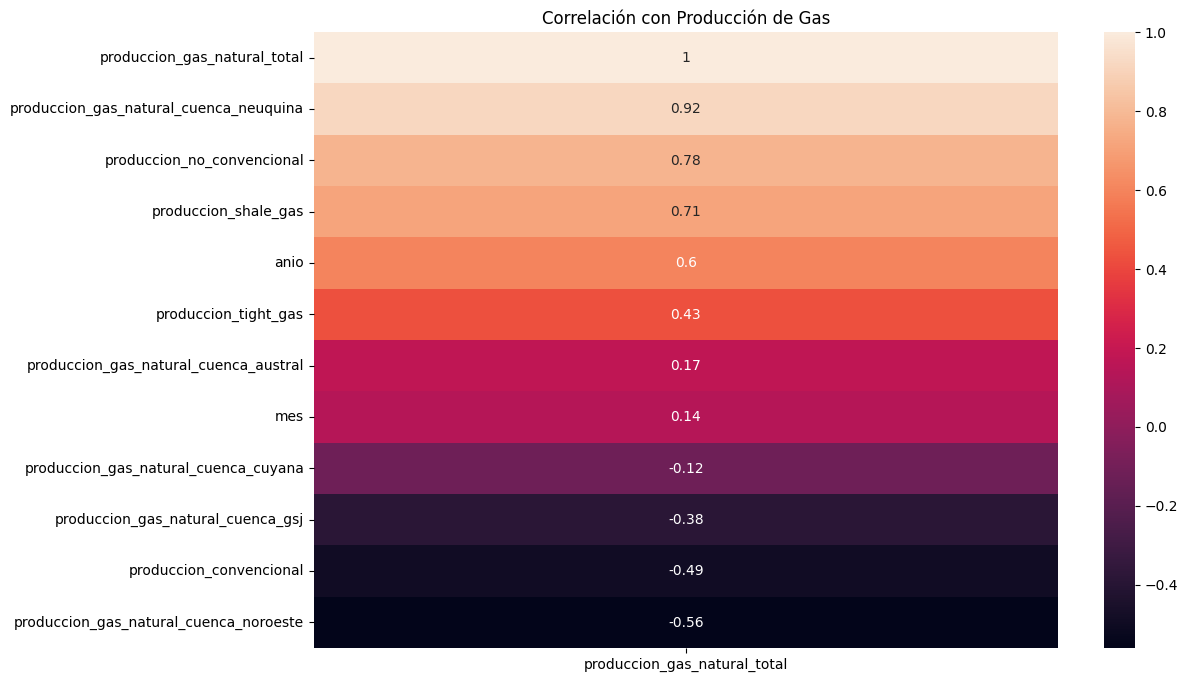

In [ ]:
#Correlaci√≥n de variables
corr = df1.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['produccion_gas_natural_total']].sort_values(by='produccion_gas_natural_total', ascending=False), annot=True)
plt.title("Correlaci√≥n con Producci√≥n de Gas")
plt.show()

El **gr√°fico de Correlaci√≥n de Variables** nos muestra que hay  variables con *alta correlaci√≥n positiva* con la producci√≥n total.

üîπ Estas variables aportan valor predictivo fuerte.

üîπ Tambi√©n implican que la cuenca neuquina y el no convencional (en particular shale) dominan la tendencia nacional.

Variables con *correlaci√≥n negativa o baja*:

üî∏ Estas aportan poco o distorsionan, especialmente en modelos lineales.

üî∏ produccion_convencional y el noroeste tienen una relaci√≥n inversa porque pierden participaci√≥n frente al shale.

‚úÖ **Variables relevantes a conservar**

Nuestra variable objetivo esta relacionada con la produccion de gas `'produccion_gas_natural_total'`

Usaremos como features aquellas con mayor correlaci√≥n positiva con la producci√≥n total y que tienen sentido desde el punto de vista de la producci√≥n a lo largo del tiempo:

* Caracter√≠sticas temporales: mes, anio_caracter√≠stica, trimestre.

* Indicadores de estacionalidad: estacionalidad_verano, estacionalidad_otono, estacionalidad_invierno, estacionalidad_primavera.

* Variable objetivo retardada. Estos son vitales para el pron√≥stico de series de tiempo, ya que aprovechan valores pasados de la variable objetivo para predecir los futuros, y son los siguientes: produccion_total_lag_1, produccion_total_lag_2,
produccion_total_lag_3.


üìå Estas variables son cruciales para la previsi√≥n de series temporales, ya que aprovechan los valores pasados de la variable objetivo para predecir los futuros..


‚ùå **Variables a descartar**

Quitamos las variables que tienen correlaciones directa con nuestro target, como:

    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana',
    'produccion_shale_gas',
    'produccion_tight_gas',
    'produccion_no_convencional',
    'produccion_convencional',    
    'indice_tiempo' # Esta columna es una fecha, no num√©rica y ya tenemos el √≠ndice.

üìå Si bien representan zonas productivas, las excluimos para evitar Data Leakage. Estas son variables que directamente contribuyen a 'produccion_gas_natural_total' y cuya inclusi√≥n como predictores causar√≠a un "leakage" o fuga de datos que ajusta de manera irrealista.

*La fuga de datos ocurre cuando tu modelo tiene acceso a informaci√≥n durante el entrenamiento que leg√≠timamente no tendr√≠a durante la predicci√≥n, lo que lleva a estimaciones de rendimiento demasiado optimistas en tu conjunto de prueba que no se mantendr√°n en un escenario del mundo real.*

### 1. Desarrollo y Evaluaci√≥n de Modelos Predictivos de Producci√≥n (Regresi√≥n)

**Objetivo:** Crear, entrenar y evaluar modelos predictivos de producci√≥n que compare las predicciones con los datos hist√≥ricos reales.

**Tareas:**

- Generar series temporales agregadas (mensuales o anuales) de la producci√≥n total a nivel nacional.
- Crear variables temporales predictoras relevantes: tendencia, estacionalidad, rezagos, entre otras.
- Entrenar y testear modelos cl√°sicos de regresi√≥n como Regresi√≥n lineal, √Årboles de decisi√≥n, Random Forest y SVR (Support Vector Regressor).
- Realizar validaci√≥n temporal: entrenar los modelos con un conjunto de datos hist√≥ricos y evaluar su rendimiento con los datos m√°s recientes disponibles.
- Comparar visualmente las predicciones del modelo con los datos de producci√≥n reales para evaluar su precisi√≥n.

#### üìä 1. 1. Preparaci√≥n para Modelado

En esta secci√≥n se crearon las caracter√≠sticas temporales y se dividieron los datos en conjuntos de entrenamiento y de prueba, manteniendo el orden temporal.

In [ ]:
# --- Funciones Auxiliares (se mantienen igual) ---
def evaluate_model(y_true, y_pred, model_name=""):
    """
    Eval√∫a un modelo de regresi√≥n y devuelve un diccionario de m√©tricas.
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    # R2 para manejar casos donde y_true son constantes o muy peque√±os
    r2 = r2_score(y_true, y_pred)
    # Manejar el caso de divisi√≥n por cero en MAPE si y_true contiene ceros
    y_true_no_zero = y_true.copy()
    y_true_no_zero[y_true_no_zero == 0] = np.nan # Reemplazar 0 por NaN para evitar divisiones por cero

    if y_true_no_zero.dropna().empty: # Si todas son NaN despu√©s de eliminar los 0s
        mape = np.nan
    else:
        # Calcular MAPE solo en los puntos donde y_true no es cero
        mape = np.mean(np.abs((y_true_no_zero - y_pred) / y_true_no_zero).dropna()) * 100
    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAPE (%)': mape
    }
    print(f"\nM√©tricas para {model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    return metrics

def plot_predictions(y_true, y_pred, title, model_name, ax=None):
    """
    Grafica las predicciones vs los datos reales.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(y_true.index, y_true, label='Producci√≥n Real', color='blue')
    ax.plot(y_true.index, y_pred, label='Predicci√≥n', color='red', linestyle='--')
    ax.set_title(f'Predicciones vs Datos Reales - {title} ({model_name})')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Producci√≥n de Gas Natural')
    ax.legend()
    ax.grid(True)
    return ax

def plot_residuals(y_true, y_pred, title, model_name, ax=None):
    """
    Grafica los residuos de un modelo.
    """
    residuals = y_true - y_pred
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(y_pred, residuals, alpha=0.5, color='purple')
    ax.axhline(y=0, color='red', linestyle='--')
    ax.set_title(f'An√°lisis de Residuos - {title} ({model_name})')
    ax.set_xlabel('Predicciones')
    ax.set_ylabel('Residuos')
    ax.grid(True)
    return ax

def plot_feature_importance(model, feature_names, model_name, ax=None):
    """
    Visualiza la importancia de las caracter√≠sticas para modelos basados en √°rboles o lineales.
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        if len(importances) != len(feature_names):
            print(f"Advertencia: El n√∫mero de importancias ({len(importances)}) no coincide con el n√∫mero de caracter√≠sticas ({len(feature_names)}) para {model_name}. Skipping plot.")
            return None

        indices = np.argsort(importances)[::-1]
        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 6))
        sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], ax=ax, palette='viridis')
        ax.set_title(f'Importancia de Caracter√≠sticas - {model_name}')
        ax.set_xlabel('Importancia')
        ax.set_ylabel('Caracter√≠stica')
        return ax
    elif hasattr(model, 'coef_'): # Para modelos lineales
        coefs = model.coef_
        if isinstance(coefs, np.ndarray) and coefs.ndim > 1:
            coefs = coefs.flatten()

        if len(coefs) != len(feature_names):
            print(f"Advertencia: El n√∫mero de coeficientes ({len(coefs)}) no coincide con el n√∫mero de caracter√≠sticas ({len(feature_names)}) para {model_name}. Skipping plot.")
            return None

        abs_coefs = np.abs(coefs)
        indices = np.argsort(abs_coefs)[::-1]
        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 6))
        sns.barplot(x=abs_coefs[indices], y=[feature_names[i] for i in indices], ax=ax, palette='viridis')
        ax.set_title(f'Importancia de Caracter√≠sticas (Abs. Coef.) - {model_name}')
        ax.set_xlabel('Magnitud del Coeficiente')
        ax.set_ylabel('Caracter√≠stica')
        return ax
    else:
        print(f"El modelo {model_name} no tiene un atributo de importancia de caracter√≠sticas o coeficientes directos.")
        return None

In [ ]:
# --- PARTE 1: Modelo Predictivo Nacional de Producci√≥n (Regresi√≥n) ---

# Depuraci√≥n: Ver el rango de fechas del DataFrame original
print(f"\nDataFrame original - Filas: {df1.shape[0]}, Columnas: {df1.shape[1]}")
print(f"Rango de fechas original (anio, mes): {df1['anio'].min()}-{df1['mes'].min()} a {df1['anio'].max()}-{df1['mes'].max()}")

# Generar una columna de fecha para la serie temporal
df1['fecha'] = pd.to_datetime(df1['anio'].astype(str) + '-' + df1['mes'].astype(str) + '-01')
df1.set_index('fecha', inplace=True)
df1.sort_index(inplace=True)

print(f"DataFrame con √≠ndice de fecha - Primeras fechas: {df1.index.min()}, √öltimas fechas: {df1.index.max()}")
print(f"Filas despu√©s de establecer √≠ndice y ordenar: {df1.shape[0]}")


DataFrame original - Filas: 132, Columnas: 14
Rango de fechas original (anio, mes): 2014-1 a 2024-12
DataFrame con √≠ndice de fecha - Primeras fechas: 2014-01-01 00:00:00, √öltimas fechas: 2024-12-01 00:00:00
Filas despu√©s de establecer √≠ndice y ordenar: 132


In [ ]:
# 2. Generar una serie temporal mensual de la variable produccion_gas_natural_total
ts_total_produccion = df1['produccion_gas_natural_total']
print("\nSerie temporal de 'produccion_gas_natural_total' generada.")


Serie temporal de 'produccion_gas_natural_total' generada.


In [ ]:
# 3. Crear variables predictoras temporales
def create_time_features(df1_input):
    df1_output = df1_input.copy()
    if not isinstance(df1_output.index, pd.DatetimeIndex):
        df1_output['fecha'] = pd.to_datetime(df1_output['anio'].astype(str) + '-' + df1_output['mes'].astype(str) + '-01')
        df1_output.set_index('fecha', inplace=True)
        df1_output.sort_index(inplace=True)

    df1_output['mes'] = df1_output.index.month
    df1_output['anio_feature'] = df1_output.index.year
    df1_output['trimestre'] = df1_output.index.quarter

    # Estacionalidad
    df1_output['estacionalidad_verano'] = ((df1_output['mes'] == 12) | (df1_output['mes'] == 1) | (df1_output['mes'] == 2)).astype(int)
    df1_output['estacionalidad_otono'] = ((df1_output['mes'] == 3) | (df1_output['mes'] == 4) | (df1_output['mes'] == 5)).astype(int)
    df1_output['estacionalidad_invierno'] = ((df1_output['mes'] == 6) | (df1_output['mes'] == 7) | (df1_output['mes'] == 8)).astype(int)
    df1_output['estacionalidad_primavera'] = ((df1_output['mes'] == 9) | (df1_output['mes'] == 10) | (df1_output['mes'] == 11)).astype(int)

    if 'produccion_gas_natural_total' not in df1_output.columns:
        raise ValueError("La columna 'produccion_gas_natural_total' no se encontr√≥ en el DataFrame de entrada para lags.")

    for i in range(1, 4): # Lags de la variable objetivo
        df1_output[f'produccion_total_lag_{i}'] = df1_output['produccion_gas_natural_total'].shift(i)

    # Manejar otras columnas num√©ricas que pudieran tener comas como decimales
    cols_to_convert = [col for col in df1_output.columns if df1_output[col].dtype == 'object' and df1_output[col].astype(str).str.contains(',').any()]
    for col in cols_to_convert:
        df1_output[col] = df1_output[col].astype(str).str.replace(',', '.', regex=False)
        df1_output[col] = pd.to_numeric(df1_output[col], errors='coerce')

    initial_rows = df1_output.shape[0]
    df1_output.dropna(subset=[f'produccion_total_lag_{i}' for i in range(1,4)], inplace=True)
    print(f"Filas despu√©s de eliminar NaNs de lags: {df1_output.shape[0]} (eliminadas: {initial_rows - df1_output.shape[0]})")

    initial_rows_after_lags = df1_output.shape[0]
    # Eliminar NaNs restantes que puedan haber surgido de la conversi√≥n a num√©rico
    df1_output.dropna(inplace=True)
    print(f"Filas despu√©s de convertir a num√©rico y eliminar NaNs: {df1_output.shape[0]} (eliminadas: {initial_rows_after_lags - df1_output.shape[0]})")

    return df1_output

df1_features = create_time_features(df1)
print("\nVariables predictoras temporales y lags creadas.")
print(f"DataFrame con features creado - Filas: {df1_features.shape[0]}, Columnas: {df1_features.shape[1]}")
if not df1_features.empty:
    print(f"Primeras 5 filas de df1_features:\n{df1_features.head()}")
    print(f"√öltimas 5 filas de df1_features:\n{df1_features.tail()}")
    print(f"Rango de fechas en df1_features: {df1_features.index.min()} a {df1_features.index.max()}")
else:
    print("¬°Advertencia: df1_features est√° vac√≠o despu√©s de la creaci√≥n de caracter√≠sticas y dropna!")
    exit()

target = 'produccion_gas_natural_total'

# ---  Exclusi√≥n de caracter√≠sticas para evitar Data Leakage ---
cols_to_exclude_from_X = [
    target, # Obviamente, no es una caracter√≠stica
    'produccion_gas_natural_cuenca_austral',
    'produccion_gas_natural_cuenca_gsj',
    'produccion_gas_natural_cuenca_neuquina',
    'produccion_gas_natural_cuenca_noroeste',
    'produccion_gas_natural_cuenca_cuyana',
    'produccion_shale_gas',
    'produccion_tight_gas',
    'produccion_no_convencional',
    'produccion_convencional',
    'indice_tiempo'
]

# Seleccionar X e y
X = df1_features.drop(columns=cols_to_exclude_from_X, errors='ignore').select_dtypes(include=np.number)
y = df1_features[target]

print(f"\nCaracter√≠sticas (X) despu√©s de excluir posibles 'data leakages' y select_dtypes(include=np.number): {X.columns.tolist()}")
print(f"Tama√±o de X: {X.shape}, Tama√±o de y: {y.shape}")

if X.empty or y.empty:
    print("¬°Error: X o y est√°n vac√≠os antes de la divisi√≥n train/test! Revisa la creaci√≥n de features y limpieza de NaNs.")
    exit()

Filas despu√©s de eliminar NaNs de lags: 129 (eliminadas: 3)
Filas despu√©s de convertir a num√©rico y eliminar NaNs: 129 (eliminadas: 0)

Variables predictoras temporales y lags creadas.
DataFrame con features creado - Filas: 129, Columnas: 22
Primeras 5 filas de df1_features:
           indice_tiempo  produccion_gas_natural_cuenca_austral  \
fecha                                                             
2014-04-01    2014-04-01                            740749.0121   
2014-05-01    2014-05-01                            880061.9141   
2014-06-01    2014-06-01                            848265.7895   
2014-07-01    2014-07-01                            882226.6256   
2014-08-01    2014-08-01                            859558.3476   

            produccion_gas_natural_cuenca_gsj  \
fecha                                           
2014-04-01                        438266.3703   
2014-05-01                        445484.1645   
2014-06-01                        432434.9751   
2014-0

In [ ]:
# ---  L√≥gica de Divisi√≥n de Datos ---
horizonte_prediccion_meses = 24 # Los √∫ltimos 2 a√±os

# Calcular la fecha de inicio del conjunto de prueba
split_date = df1_features.index.max() - pd.DateOffset(months=horizonte_prediccion_meses - 1)

# Dividir los datos
X_train = X[X.index < split_date]
y_train = y[y.index < split_date]

X_test = X[X.index >= split_date]
y_test = y[y.index >= split_date]

print(f"\nVerificando tama√±os de sets de entrenamiento y prueba:")
if X_train.empty or y_train.empty:
    print(f"Error: Los sets de entrenamiento est√°n vac√≠os. X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"Fechas en X (todos los datos): {X.index.min()} a {X.index.max()}")
    print(f"Split date: {split_date}")
    exit()
if X_test.empty or y_test.empty:
    print(f"Error: Los sets de prueba est√°n vac√≠os. X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print(f"Fechas en X (todos los datos): {X.index.min()} a {X.index.max()}")
    print(f"Split date: {split_date}")
    exit()

print(f"\nDatos de entrenamiento: {X_train.index.min()} a {X_train.index.max()}")
print(f"Datos de prueba: {X_test.index.min()} a {X_test.index.max()}")
print(f"Tama√±o de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Tama√±o de X_test: {X_test.shape}, y_test: {y_test.shape}")


Verificando tama√±os de sets de entrenamiento y prueba:

Datos de entrenamiento: 2014-04-01 00:00:00 a 2022-12-01 00:00:00
Datos de prueba: 2023-01-01 00:00:00 a 2024-12-01 00:00:00
Tama√±o de X_train: (105, 11), y_train: (105,)
Tama√±o de X_test: (24, 11), y_test: (24,)


In [ ]:
# --- Escalado de caracter√≠sticas ---
scaler = StandardScaler()

# Ajustar el escalador solo en los datos de entrenamiento y transformar ambos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame para mantener los nombres de las columnas e √≠ndices
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nCaracter√≠sticas escaladas usando StandardScaler.")
print(f"Ejemplo de X_train_scaled (primeras filas):\n{X_train_scaled.head()}")


Caracter√≠sticas escaladas usando StandardScaler.
Ejemplo de X_train_scaled (primeras filas):
                anio       mes  anio_feature  trimestre  \
fecha                                                     
2014-04-01 -1.627976 -0.770349     -1.627976  -0.491562   
2014-05-01 -1.627976 -0.477281     -1.627976  -0.491562   
2014-06-01 -1.627976 -0.184214     -1.627976  -0.491562   
2014-07-01 -1.627976  0.108854     -1.627976   0.413947   
2014-08-01 -1.627976  0.401921     -1.627976   0.413947   

            estacionalidad_verano  estacionalidad_otono  \
fecha                                                     
2014-04-01              -0.559017              1.743118   
2014-05-01              -0.559017              1.743118   
2014-06-01              -0.559017             -0.573685   
2014-07-01              -0.559017             -0.573685   
2014-08-01              -0.559017             -0.573685   

            estacionalidad_invierno  estacionalidad_primavera  \
fecha       

#### üìä 1. 2. Modelado y Evaluaci√≥n

Este es el n√∫cleo de nuestro an√°lisis, en el que se entrenan y se eval√∫an diferentes modelos, tanto con la configuraci√≥n predeterminada como con la optimizaci√≥n de los hiperpar√°metros.

**Modelos Base**
Se inicializan y entrenan los modelos de regresi√≥n elegidos con sus par√°metros por defecto, y luego se eval√∫a su rendimiento.

In [ ]:
# ---  Entrenar y Evaluar Modelos de Regresi√≥n ---
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
}

prophet_model_results = {}
base_model_results = {}
optimized_model_results = {}
base_model_predictions = {}
optimized_model_predictions = {}
base_model_residuals = {}
optimized_model_residuals = {}
base_model_feature_importance = {}
optimized_model_feature_importance = {}


print("\n--- ENTRENANDO Y EVALUANDO MODELOS BASE ---")
for name, model in models.items():
    print(f"\nEntrenando {name}...")
    # Usar datos escalados para SVR y Linear Regression, y no escalados para otros
    if name in ['SVR', 'Linear Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    base_model_predictions[name] = pd.Series(y_pred, index=y_test.index)
    metrics = evaluate_model(y_test, y_pred, name)
    base_model_results[name] = metrics
    base_model_residuals[name] = y_test - y_pred
    if hasattr(model, 'feature_importances_'):
        base_model_feature_importance[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        if hasattr(model.coef_, '__len__') and len(model.coef_) == X_train.shape[1]:
            base_model_feature_importance[name] = model.coef_
        else:
            base_model_feature_importance[name] = None
            print(f"Advertencia: Coeficientes de {name} no coinciden con el n√∫mero de caracter√≠sticas o no son v√°lidos.")
    else:
        base_model_feature_importance[name] = None


--- ENTRENANDO Y EVALUANDO MODELOS BASE ---

Entrenando Linear Regression...

M√©tricas para Linear Regression:
  MAE: 191968.6396
  MSE: 53928016514.3040
  RMSE: 232224.0653
  R2: 0.4857
  MAPE (%): 4.7593

Entrenando Decision Tree...

M√©tricas para Decision Tree:
  MAE: 182227.6590
  MSE: 47685240921.7302
  RMSE: 218369.5055
  R2: 0.5452
  MAPE (%): 4.4287

Entrenando Random Forest...

M√©tricas para Random Forest:
  MAE: 189579.7265
  MSE: 56326300809.8512
  RMSE: 237331.6262
  R2: 0.4628
  MAPE (%): 4.5590

Entrenando SVR...

M√©tricas para SVR:
  MAE: 358671.3715
  MSE: 209689723808.8369
  RMSE: 457918.9053
  R2: -0.9998
  MAPE (%): 8.2739

Entrenando XGBoost...

M√©tricas para XGBoost:
  MAE: 178650.0575
  MSE: 50006494561.8211
  RMSE: 223621.3196
  R2: 0.5231
  MAPE (%): 4.2690


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)

# --- Prophet (Modelo Base) ---

print("\nEntrenando Prophet (Base)...")
prophet_df1_full = df1_features.reset_index().rename(columns={'fecha': 'ds', 'produccion_gas_natural_total': 'y'})

prophet_regressors = [col for col in X.columns if col in df1_features.columns]
prophet_cols = ['ds', 'y'] + prophet_regressors

prophet_df1_full = prophet_df1_full[prophet_cols]

prophet_train = prophet_df1_full[prophet_df1_full['ds'] < split_date]
prophet_test = prophet_df1_full[prophet_df1_full['ds'] >= split_date]


if prophet_train.empty or prophet_test.empty:
    print("Error: Los datasets de Prophet (train/test) est√°n vac√≠os. Revisa el rango de fechas o la split_date.")
    exit()

m = Prophet(seasonality_mode='multiplicative',
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False)

for feature in prophet_regressors:
    m.add_regressor(feature)

m.fit(prophet_train)
future = prophet_test.drop(columns=['y'])
forecast = m.predict(future)

y_pred_prophet = pd.Series(forecast['yhat'].values, index=pd.to_datetime(forecast['ds']))
base_model_predictions['Prophet'] = y_pred_prophet
metrics_prophet = evaluate_model(y_test, y_pred_prophet, "Prophet")
base_model_results['Prophet'] = metrics_prophet
base_model_residuals['Prophet'] = y_test - y_pred_prophet
base_model_feature_importance['Prophet'] = None


Entrenando Prophet (Base)...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mnljwdhk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1f0fglkg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75060', 'data', 'file=/tmp/tmpky5uev4_/mnljwdhk.json', 'init=/tmp/tmpky5uev4_/1f0fglkg.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model5_iftnk3/prophet_model-20250618183948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:39:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:39:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



M√©tricas para Prophet:
  MAE: 155195.5279
  MSE: 44487932594.0914
  RMSE: 210921.6267
  R2: 0.5757
  MAPE (%): 3.8536


In [ ]:
# --- ARIMA (Modelo Base) ---
print("\nEntrenando ARIMA (Base)...")
try:
    arima_model = pm.auto_arima(y_train, seasonal=False, suppress_warnings=True,
                                 stepwise=True, trace=False, error_action="ignore",
                                 n_fits=20)

    print(f"Mejores par√°metros ARIMA (Base): {arima_model.order}")

    arima_predictions_array = arima_model.predict(n_periods=len(y_test))
    y_pred_arima = pd.Series(arima_predictions_array, index=y_test.index)

    base_model_predictions['ARIMA'] = y_pred_arima
    metrics_arima = evaluate_model(y_test, y_pred_arima, "ARIMA")
    base_model_results['ARIMA'] = metrics_arima
    base_model_residuals['ARIMA'] = y_test - y_pred_arima
    base_model_feature_importance['ARIMA'] = None
except Exception as e:
    print(f"Error al entrenar o predecir con ARIMA: {e}. Este modelo no ser√° evaluado.")
    base_model_predictions['ARIMA'] = pd.Series([], dtype=float)
    base_model_results['ARIMA'] = {}
    base_model_residuals['ARIMA'] = pd.Series([], dtype=float)
    base_model_feature_importance['ARIMA'] = None


Entrenando ARIMA (Base)...
Mejores par√°metros ARIMA (Base): (0, 1, 0)

M√©tricas para ARIMA:
  MAE: 276219.3166
  MSE: 121036055773.7613
  RMSE: 347902.3653
  R2: -0.1543
  MAPE (%): 6.5032


In [ ]:
# --- SARIMA (Modelo Base) ---
print("\nEntrenando SARIMA (Base)...")
try:
    sarima_model = pm.auto_arima(y_train, seasonal=True, m=12, suppress_warnings=True,
                                 stepwise=True, trace=False, error_action="ignore",
                                 n_fits=20)

    print(f"Mejores par√°metros SARIMA (Base): {sarima_model.order}, estacional: {sarima_model.seasonal_order}")

    sarima_predictions_array = sarima_model.predict(n_periods=len(y_test))
    y_pred_sarima = pd.Series(sarima_predictions_array, index=y_test.index)

    base_model_predictions['SARIMA'] = y_pred_sarima
    metrics_sarima = evaluate_model(y_test, y_pred_sarima, "SARIMA")
    base_model_results['SARIMA'] = metrics_sarima
    base_model_residuals['SARIMA'] = y_test - y_pred_sarima
    base_model_feature_importance['SARIMA'] = None
except Exception as e:
    print(f"Error al entrenar o predecir con SARIMA: {e}. Este modelo no ser√° evaluado.")
    base_model_predictions['SARIMA'] = pd.Series([], dtype=float)
    base_model_results['SARIMA'] = {}
    base_model_residuals['SARIMA'] = pd.Series([], dtype=float)
    base_model_feature_importance['SARIMA'] = None


Entrenando SARIMA (Base)...
Mejores par√°metros SARIMA (Base): (0, 0, 2), estacional: (0, 1, 0, 12)

M√©tricas para SARIMA:
  MAE: 161664.4799
  MSE: 38971593975.1836
  RMSE: 197412.2437
  R2: 0.6283
  MAPE (%): 3.9557


**Modelos Optimizados**

Se realiza un ajuste fino de los hiperpar√°metros de sus modelos de regresi√≥n utilizando `GridSearchCV` o `RandomizedSearchCV` con `TimeSeriesSplit` para una evaluaci√≥n robusta.

In [ ]:
# --- Ajustar hiperpar√°metros para mejorar los √≠ndices de predicciones ---
print("\n--- AJUSTANDO HIPERPAR√ÅMETROS DE MODELOS ---")

# Rangos de par√°metros ajustados para SVR y otros
param_grids = {
    'Linear Regression': {}, # No se optimiza para LR
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None], # Ampliado
        'min_samples_split': [2, 5, 10, 20], # Ampliado
        'min_samples_leaf': [1, 2, 4, 8], # Ampliado
        'max_features': ['sqrt', 'log2', 0.8, 1.0], # A√±adido
        'ccp_alpha': [0.0, 0.001, 0.01, 0.05] # A√±adido
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVR': {
        'C': [1, 10, 100, 1000],
        'gamma': ['scale', 'auto', 0.001, 0.01],
        'kernel': ['rbf', 'poly']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 400],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 6]
    }
}

best_models = {}

for name, model in models.items():
    print(f"\nOptimizando {name}...")
    params = param_grids[name]

    # Decide qu√© datos de entrenamiento usar para la optimizaci√≥n (escalados o no)
    if name in ['SVR', 'Linear Regression']:
        current_X_train = X_train_scaled
    else:
        current_X_train = X_train
    current_y_train = y_train

    if not params:
        best_models[name] = model.fit(current_X_train, current_y_train)
        if name in ['SVR', 'Linear Regression']:
            y_pred_opt = best_models[name].predict(X_test_scaled)
        else:
            y_pred_opt = best_models[name].predict(X_test)
    else:
        total_combinations = 1
        for key in params:
            total_combinations *= len(params[key])

        if current_X_train.empty or current_y_train.empty:
            print(f"Saltando optimizaci√≥n para {name}: Datos de entrenamiento vac√≠os.")
            best_models[name] = model # Usa el modelo base si no se puede optimizar
            if name in ['SVR', 'Linear Regression']:
                y_pred_opt = model.predict(X_test_scaled)
            else:
                y_pred_opt = model.predict(X_test)
        else:
            # Usar TimeSeriesSplit para la validaci√≥n cruzada
            tscv = TimeSeriesSplit(n_splits=5)

            if total_combinations > 10: # Usa RandomizedSearchCV para muchas combinaciones
                n_iter_search = min(30, total_combinations)
                if name == 'SVR':
                    if current_X_train.shape[0] < 2:
                        X_train_tuning = current_X_train
                        y_train_tuning = current_y_train
                        print(f"  No hay suficientes datos para muestrear para SVR tuning. Usando todo el conjunto de entrenamiento.")
                    else:
                        X_train_tuning, _, y_train_tuning, _ = train_test_split(
                            current_X_train, current_y_train, train_size=0.7, random_state=42
                        )
                        print(f"  Usando un subconjunto de entrenamiento ({X_train_tuning.shape[0]} muestras) para SVR tuning.")
                    random_search = RandomizedSearchCV(model, params, n_iter=n_iter_search, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42, verbose=0)
                    random_search.fit(X_train_tuning, y_train_tuning)
                else:
                    random_search = RandomizedSearchCV(model, params, n_iter=n_iter_search, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42, verbose=0)
                    random_search.fit(current_X_train, current_y_train)

                best_estimator = random_search.best_estimator_
                print(f"Mejores par√°metros con RandomizedSearchCV para {name}: {random_search.best_params_}")
            else: # Pocas combinaciones, usa GridSearchCV
                grid_search = GridSearchCV(model, params, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
                grid_search.fit(current_X_train, current_y_train)
                best_estimator = grid_search.best_estimator_
                print(f"Mejores par√°metros con GridSearchCV para {name}: {grid_search.best_params_}")

            best_models[name] = best_estimator
            if name in ['SVR', 'Linear Regression']:
                y_pred_opt = best_models[name].predict(X_test_scaled)
            else:
                y_pred_opt = best_models[name].predict(X_test)

    optimized_model_predictions[name] = pd.Series(y_pred_opt, index=y_test.index)
    metrics_opt = evaluate_model(y_test, y_pred_opt, f"{name} (Optimizado)")
    optimized_model_results[name] = metrics_opt
    optimized_model_residuals[name] = y_test - y_pred_opt
    if hasattr(best_models[name], 'feature_importances_'):
        optimized_model_feature_importance[name] = best_models[name].feature_importances_
    elif hasattr(best_models[name], 'coef_'):
        if hasattr(best_models[name].coef_, '__len__') and len(best_models[name].coef_) == X_train.shape[1]:
            optimized_model_feature_importance[name] = best_models[name].coef_
        else:
            optimized_model_feature_importance[name] = None
            print(f"Advertencia: Coeficientes optimizados de {name} no coinciden con el n√∫mero de caracter√≠sticas o no son v√°lidos.")
    else:
        optimized_model_feature_importance[name] = None


--- AJUSTANDO HIPERPAR√ÅMETROS DE MODELOS ---

Optimizando Linear Regression...

M√©tricas para Linear Regression (Optimizado):
  MAE: 191968.6396
  MSE: 53928016514.3040
  RMSE: 232224.0653
  R2: 0.4857
  MAPE (%): 4.7593

Optimizando Decision Tree...
Mejores par√°metros con RandomizedSearchCV para Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'ccp_alpha': 0.001}

M√©tricas para Decision Tree (Optimizado):
  MAE: 264947.6660
  MSE: 94741238218.3866
  RMSE: 307800.6469
  R2: 0.0965
  MAPE (%): 6.4583

Optimizando Random Forest...
Mejores par√°metros con RandomizedSearchCV para Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

M√©tricas para Random Forest (Optimizado):
  MAE: 186227.4013
  MSE: 55111457877.3818
  RMSE: 234758.2967
  R2: 0.4744
  MAPE (%): 4.4758

Optimizando SVR...
  Usando un subconjunto de entrenamiento (73 muestras) para SVR tuning.
Mejores par√°metros con R

**Modelos de Series Temporales Puros (Prophet, ARIMA, SARIMA)**

Se implementa y optimiza Prophet, y confirma el manejo de ARIMA y SARIMA.

In [ ]:
# --- Prophet Model (Optimizaci√≥n con Cross-Validation - Primera Pasada) ---
print("\n--- OPTIMIZANDO PROPHET CON CROSS-VALIDATION (PRIMERA PASADA) ---")

prophet_params_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

best_prophet_model_cv = None
best_prophet_mape = float('inf')
best_prophet_params = {}

# Convertir horizonte de meses a d√≠as para Prophet cross_validation
horizon_days = int(horizonte_prediccion_meses * (365.25 / 12))
horizon_str = f"{horizon_days} days"

# Asegurarse de que 'initial' sea suficiente para entrenar el modelo antes del primer corte
initial_days = (prophet_train['ds'].iloc[-1] - prophet_train['ds'].iloc[0]).days + 1
initial_str = f"{initial_days} days"

# Advertencia si initial es muy corto en relaci√≥n al horizonte
if initial_days < 2 * horizon_days:
    print(f"Advertencia: 'initial' ({initial_days} days) es menor que 2 veces el 'horizon' ({horizon_days} days).")
    print(f"Esto podr√≠a afectar la validez de la validaci√≥n cruzada de Prophet. Considera extender tu conjunto de entrenamiento o reducir el horizonte de predicci√≥n.")


for s_mode, cp_scale, s_scale in product(prophet_params_grid['seasonality_mode'],
                                         prophet_params_grid['changepoint_prior_scale'],
                                         prophet_params_grid['seasonality_prior_scale']):
    print(f"\nProbando Prophet con: seasonality_mode={s_mode}, changepoint_prior_scale={cp_scale}, seasonality_prior_scale={s_scale}")
    m_tuned = Prophet(seasonality_mode=s_mode,
                      changepoint_prior_scale=cp_scale,
                      seasonality_prior_scale=s_scale,
                      yearly_seasonality=True,
                      weekly_seasonality=False,
                      daily_seasonality=False)

    for feature in prophet_regressors:
        m_tuned.add_regressor(feature)

    # Ajusta el modelo con TODOS los datos disponibles para Prophet (prophet_df1_full)
    m_tuned.fit(prophet_df1_full) # Fit on full data for CV

    try:
        df1_cv = cross_validation(m_tuned,
                                 initial=initial_str,
                                 period='180 days',
                                 horizon=horizon_str,
                                 parallel='processes'
                                 )

        if not df1_cv.empty:
            df1_p = performance_metrics(df1_cv)
            current_mape = df1_p['mape'].mean()
            print(f"MAPE promedio para esta configuraci√≥n de Prophet: {current_mape:.4f}%")

            if current_mape < best_prophet_mape:
                best_prophet_mape = current_mape
                best_prophet_model_cv = m_tuned
                best_prophet_params = {
                    'seasonality_mode': s_mode,
                    'changepoint_prior_scale': cp_scale,
                    'seasonality_prior_scale': s_scale
                }
        else:
            print("df1_cv est√° vac√≠o, no se pudieron calcular las m√©tricas para esta configuraci√≥n de Prophet.")
    except Exception as e:
        print(f"Error durante la validaci√≥n cruzada para esta configuraci√≥n de Prophet: {e}")
        continue

if best_prophet_model_cv:
    print(f"\nMejor configuraci√≥n de Prophet encontrada por CV (primera pasada): {best_prophet_params}")

    # Re-entrenar el mejor modelo de Prophet en el conjunto de entrenamiento (prophet_train)
    # para asegurar la consistencia con las predicciones de los otros modelos.
    m_best_final_prophet_pass1 = Prophet(seasonality_mode=best_prophet_params['seasonality_mode'],
                                         changepoint_prior_scale=best_prophet_params['changepoint_prior_scale'],
                                         seasonality_prior_scale=best_prophet_params['seasonality_prior_scale'],
                                         yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

    for feature in prophet_regressors:
        m_best_final_prophet_pass1.add_regressor(feature)

    m_best_final_prophet_pass1.fit(prophet_train)
    future_best_prophet_pass1 = prophet_test.drop(columns=['y'])
    forecast_best_prophet_pass1 = m_best_final_prophet_pass1.predict(future_best_prophet_pass1)

    y_pred_prophet_optimized = pd.Series(forecast_best_prophet_pass1['yhat'].values, index=pd.to_datetime(forecast_best_prophet_pass1['ds']))
    # Guardamos este resultado como "Prophet" optimizado inicial
    optimized_model_predictions['Prophet'] = y_pred_prophet_optimized
    metrics_prophet_opt = evaluate_model(y_test, y_pred_prophet_optimized, "Prophet (Optimizado CV - Pass 1)")
    optimized_model_results['Prophet'] = metrics_prophet_opt
    optimized_model_residuals['Prophet'] = y_test - y_pred_prophet_optimized
    optimized_model_feature_importance['Prophet'] = None # Prophet no tiene feature_importance directa para graficar
else:
    print("No se encontr√≥ una mejor configuraci√≥n para Prophet en la primera pasada de validaci√≥n cruzada.")
    # Si no se encontr√≥ un modelo optimizado, usar los resultados del modelo base
    optimized_model_predictions['Prophet'] = base_model_predictions['Prophet']
    optimized_model_results['Prophet'] = base_model_results['Prophet']
    optimized_model_residuals['Prophet'] = base_model_residuals['Prophet']
    optimized_model_feature_importance['Prophet'] = None

DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3n8a1yxf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/q4cngpvk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93550', 'data', 'file=/tmp/tmpky5uev4_/3n8a1yxf.json', 'init=/tmp/tmpky5uev4_/q4cngpvk.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model7camir_f/prophet_model-20250618184117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:41:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3r4leddt.json
DE


--- OPTIMIZANDO PROPHET CON CROSS-VALIDATION (PRIMERA PASADA) ---

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.001, seasonality_prior_scale=0.01


18:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2mmx0_e9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7qs7icae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22912', 'data', 'file=/tmp/tmpky5uev4_/2mmx0_e9.json', 'init=/tmp/tmpky5uev4_/7qs7icae.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model8utjd9b5/prophet_model-20250618184118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ht_1kve2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/by3timnv.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0413%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.001, seasonality_prior_scale=0.1


18:41:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ykjxfftt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0ok4fs4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60264', 'data', 'file=/tmp/tmpky5uev4_/ykjxfftt.json', 'init=/tmp/tmpky5uev4_/0ok4fs4s.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelg_wtatfr/prophet_model-20250618184119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/53x2e4v1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0b0yqfqh.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0859%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.001, seasonality_prior_scale=1.0


18:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gbr5ftgm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dmgee4uz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63280', 'data', 'file=/tmp/tmpky5uev4_/gbr5ftgm.json', 'init=/tmp/tmpky5uev4_/dmgee4uz.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeln8_ufhsv/prophet_model-20250618184120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6ta27q5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/p9aml0qr.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0878%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.001, seasonality_prior_scale=10.0


18:41:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/w1u43_11.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4rx4bfah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45894', 'data', 'file=/tmp/tmpky5uev4_/w1u43_11.json', 'init=/tmp/tmpky5uev4_/4rx4bfah.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelqnysttz9/prophet_model-20250618184121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/q6h2sptz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pqgk62la.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0878%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.01, seasonality_prior_scale=0.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/y_vmp9vc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rjyqfd__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80541', 'data', 'file=/tmp/tmpky5uev4_/y_vmp9vc.json', 'init=/tmp/tmpky5uev4_/rjyqfd__.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelrt1ww5dl/prophet_model-20250618184122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/n6uidg8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1nl9mvjh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0339%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.01, seasonality_prior_scale=0.1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qdps8knl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/m8rfzg4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82515', 'data', 'file=/tmp/tmpky5uev4_/qdps8knl.json', 'init=/tmp/tmpky5uev4_/m8rfzg4a.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeld_qsbtye/prophet_model-20250618184122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/tv_alxcf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/eqlemi69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0336%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.01, seasonality_prior_scale=1.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hu8db0ek.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8vp_ifrb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42287', 'data', 'file=/tmp/tmpky5uev4_/hu8db0ek.json', 'init=/tmp/tmpky5uev4_/8vp_ifrb.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelwbcvs0t0/prophet_model-20250618184123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/n0ue1pi3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gxfe5gcc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0337%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.01, seasonality_prior_scale=10.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kubs2tmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/zwga9j5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47759', 'data', 'file=/tmp/tmpky5uev4_/kubs2tmm.json', 'init=/tmp/tmpky5uev4_/zwga9j5q.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modely_ma518p/prophet_model-20250618184123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/976p9rj9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0ezo6y2h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0337%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.05, seasonality_prior_scale=0.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ub7awi47.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/08j8wen1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45172', 'data', 'file=/tmp/tmpky5uev4_/ub7awi47.json', 'init=/tmp/tmpky5uev4_/08j8wen1.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelh2sefh1h/prophet_model-20250618184124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/s048dwr3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/681qi220.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0334%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.05, seasonality_prior_scale=0.1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b5w0_ra4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/g4dl71bf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35607', 'data', 'file=/tmp/tmpky5uev4_/b5w0_ra4.json', 'init=/tmp/tmpky5uev4_/g4dl71bf.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelunfbsb_a/prophet_model-20250618184124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/n6ahxpgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/o3wcypqq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0354%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.05, seasonality_prior_scale=1.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/11tgtrrw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yo8gvms4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87165', 'data', 'file=/tmp/tmpky5uev4_/11tgtrrw.json', 'init=/tmp/tmpky5uev4_/yo8gvms4.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model1c4k0ffz/prophet_model-20250618184124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/epn4vita.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9_taecfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0359%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.05, seasonality_prior_scale=10.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/20qoc6g3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/htujasd1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45131', 'data', 'file=/tmp/tmpky5uev4_/20qoc6g3.json', 'init=/tmp/tmpky5uev4_/htujasd1.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeljo9sznu5/prophet_model-20250618184125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lhwclyp7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/otlra9hi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0367%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.1, seasonality_prior_scale=0.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/zfxn__2r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/73ds07aq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41994', 'data', 'file=/tmp/tmpky5uev4_/zfxn__2r.json', 'init=/tmp/tmpky5uev4_/73ds07aq.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelj2521jui/prophet_model-20250618184125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/_nadf3e4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/j8lj2nub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0342%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.1, seasonality_prior_scale=0.1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/j4toc_50.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9ik4tpi0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97107', 'data', 'file=/tmp/tmpky5uev4_/j4toc_50.json', 'init=/tmp/tmpky5uev4_/9ik4tpi0.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelbf5xtps1/prophet_model-20250618184125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xqxfj3f6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5423xr5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0356%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.1, seasonality_prior_scale=1.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6jw6krr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7e__5sr0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19718', 'data', 'file=/tmp/tmpky5uev4_/6jw6krr2.json', 'init=/tmp/tmpky5uev4_/7e__5sr0.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelldj0evj9/prophet_model-20250618184126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pup7tj3r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/_0k1z578.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0355%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.1, seasonality_prior_scale=10.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/z94nsuoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8k1ze9a2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23170', 'data', 'file=/tmp/tmpky5uev4_/z94nsuoa.json', 'init=/tmp/tmpky5uev4_/8k1ze9a2.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelbzw8zdvy/prophet_model-20250618184126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mi7cdywg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9tv6ep_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0366%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.5, seasonality_prior_scale=0.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/r6h3te6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dk9hdanu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26371', 'data', 'file=/tmp/tmpky5uev4_/r6h3te6v.json', 'init=/tmp/tmpky5uev4_/dk9hdanu.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelz92tfuyv/prophet_model-20250618184127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/fmchiyym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/so2f4ovn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0550%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.5, seasonality_prior_scale=0.1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yzg_6kbm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/t7gsf2m9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89575', 'data', 'file=/tmp/tmpky5uev4_/yzg_6kbm.json', 'init=/tmp/tmpky5uev4_/t7gsf2m9.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelxk241rrj/prophet_model-20250618184127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xg9amtgu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/sjb0qo_7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0548%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.5, seasonality_prior_scale=1.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lcclnktg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ucp1ylip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90348', 'data', 'file=/tmp/tmpky5uev4_/lcclnktg.json', 'init=/tmp/tmpky5uev4_/ucp1ylip.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelui78v2gr/prophet_model-20250618184128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/by1t8xp3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/m5w6k0vv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0557%

Probando Prophet con: seasonality_mode=additive, changepoint_prior_scale=0.5, seasonality_prior_scale=10.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cenw8fri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/nwx7f_bq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89225', 'data', 'file=/tmp/tmpky5uev4_/cenw8fri.json', 'init=/tmp/tmpky5uev4_/nwx7f_bq.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modele0sdjb_t/prophet_model-20250618184128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/u6xh0bel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9p1tijmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0558%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.001, seasonality_prior_scale=0.01


18:41:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rm9effte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dy5646da.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60160', 'data', 'file=/tmp/tmpky5uev4_/rm9effte.json', 'init=/tmp/tmpky5uev4_/dy5646da.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model3q8_uio5/prophet_model-20250618184129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/zajleprs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6c__omfd.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0857%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.001, seasonality_prior_scale=0.1


18:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kotvqc7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ijywae6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38808', 'data', 'file=/tmp/tmpky5uev4_/kotvqc7l.json', 'init=/tmp/tmpky5uev4_/ijywae6e.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeladljiyhd/prophet_model-20250618184130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hnk37jbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/a55dma_8.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0887%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.001, seasonality_prior_scale=1.0


18:41:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/j1fkrycy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/22jziket.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51911', 'data', 'file=/tmp/tmpky5uev4_/j1fkrycy.json', 'init=/tmp/tmpky5uev4_/22jziket.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model6dn8l5dj/prophet_model-20250618184131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4setw4hl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1udremjv.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0875%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.001, seasonality_prior_scale=10.0


18:41:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4kucjhzq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ejgai4qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69422', 'data', 'file=/tmp/tmpky5uev4_/4kucjhzq.json', 'init=/tmp/tmpky5uev4_/ejgai4qq.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeloiby159x/prophet_model-20250618184132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0a0a9ymq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mjiw3ign.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0433%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.01, seasonality_prior_scale=0.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/d98g9rul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/fsyra1rn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55995', 'data', 'file=/tmp/tmpky5uev4_/d98g9rul.json', 'init=/tmp/tmpky5uev4_/fsyra1rn.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model8e8kufud/prophet_model-20250618184132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qi5a5osz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/h_a6um46.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0352%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.01, seasonality_prior_scale=0.1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/w3met50l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/zg2re68q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35989', 'data', 'file=/tmp/tmpky5uev4_/w3met50l.json', 'init=/tmp/tmpky5uev4_/zg2re68q.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelywcz0yzb/prophet_model-20250618184132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5lwjcbzt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wd1uteou.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0353%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.01, seasonality_prior_scale=1.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/no3ukco1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/di2m5c5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14098', 'data', 'file=/tmp/tmpky5uev4_/no3ukco1.json', 'init=/tmp/tmpky5uev4_/di2m5c5j.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelny6msgmk/prophet_model-20250618184133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/y3r400ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/40nk7ojw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0353%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.01, seasonality_prior_scale=10.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rjwhoxn_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xxri3efx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44484', 'data', 'file=/tmp/tmpky5uev4_/rjwhoxn_.json', 'init=/tmp/tmpky5uev4_/xxri3efx.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelbvm4vl14/prophet_model-20250618184133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/p2x3gb4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/llt2bwt3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0352%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.05, seasonality_prior_scale=0.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/__9ed6no.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/c258ap2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64652', 'data', 'file=/tmp/tmpky5uev4_/__9ed6no.json', 'init=/tmp/tmpky5uev4_/c258ap2q.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model97nyr3_w/prophet_model-20250618184134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/tb3a6wj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7rfx2k2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0372%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.05, seasonality_prior_scale=0.1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8lgimg5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3lg5o2_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39176', 'data', 'file=/tmp/tmpky5uev4_/8lgimg5o.json', 'init=/tmp/tmpky5uev4_/3lg5o2_1.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelxiywgto9/prophet_model-20250618184134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9jy4wsox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9w19o_1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0392%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.05, seasonality_prior_scale=1.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/f78vaiz5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/iocldjmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85336', 'data', 'file=/tmp/tmpky5uev4_/f78vaiz5.json', 'init=/tmp/tmpky5uev4_/iocldjmm.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelm249cdsk/prophet_model-20250618184135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5cfdfewj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wojl40da.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0395%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.05, seasonality_prior_scale=10.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rai4614b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ja8_2o2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30709', 'data', 'file=/tmp/tmpky5uev4_/rai4614b.json', 'init=/tmp/tmpky5uev4_/ja8_2o2y.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelrisxh07p/prophet_model-20250618184135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mllcyyv4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qo8hztsc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0399%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.1, seasonality_prior_scale=0.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4hake3ih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/msj0adff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92902', 'data', 'file=/tmp/tmpky5uev4_/4hake3ih.json', 'init=/tmp/tmpky5uev4_/msj0adff.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelbnspmpr_/prophet_model-20250618184136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/u2u7nbz1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0q5rd5qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0373%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.1, seasonality_prior_scale=0.1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lbtb6xn1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lv70nwxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4470', 'data', 'file=/tmp/tmpky5uev4_/lbtb6xn1.json', 'init=/tmp/tmpky5uev4_/lv70nwxp.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelqtm8k9nr/prophet_model-20250618184137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/o1fuuyjb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qm6n5a3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

MAPE promedio para esta configuraci√≥n de Prophet: 0.0365%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.1, seasonality_prior_scale=1.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9sd4azs0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9cb88d6q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93552', 'data', 'file=/tmp/tmpky5uev4_/9sd4azs0.json', 'init=/tmp/tmpky5uev4_/9cb88d6q.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelcon6txcl/prophet_model-20250618184137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vb6v9uuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/x11tqhi0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0350%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.1, seasonality_prior_scale=10.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7ug30tmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ux80zvn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19488', 'data', 'file=/tmp/tmpky5uev4_/7ug30tmo.json', 'init=/tmp/tmpky5uev4_/ux80zvn0.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeltbsbu9r7/prophet_model-20250618184138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9vpqt87j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vo6r3bto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0344%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.5, seasonality_prior_scale=0.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wl6zu15u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/v_ph664n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8463', 'data', 'file=/tmp/tmpky5uev4_/wl6zu15u.json', 'init=/tmp/tmpky5uev4_/v_ph664n.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeldu2gdql1/prophet_model-20250618184138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mad1ja05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ik41cfsw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

MAPE promedio para esta configuraci√≥n de Prophet: 0.0479%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.5, seasonality_prior_scale=0.1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4cfe4pq2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dtjviso2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68838', 'data', 'file=/tmp/tmpky5uev4_/4cfe4pq2.json', 'init=/tmp/tmpky5uev4_/dtjviso2.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelhwcljcmg/prophet_model-20250618184139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4gv5t6lh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/987ewun5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

MAPE promedio para esta configuraci√≥n de Prophet: 0.0472%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.5, seasonality_prior_scale=1.0


18:41:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jlrdctoi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ntxd9rrs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73408', 'data', 'file=/tmp/tmpky5uev4_/jlrdctoi.json', 'init=/tmp/tmpky5uev4_/ntxd9rrs.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model274ikbpc/prophet_model-20250618184139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/zo_s4l8h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/k6st22kc.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0499%

Probando Prophet con: seasonality_mode=multiplicative, changepoint_prior_scale=0.5, seasonality_prior_scale=10.0


18:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/k7o9ktmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/a9hlr3m0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36021', 'data', 'file=/tmp/tmpky5uev4_/k7o9ktmo.json', 'init=/tmp/tmpky5uev4_/a9hlr3m0.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelt62nnfa0/prophet_model-20250618184140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ylp62pym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pszcowsb.json
DEBUG:cmdstanpy:idx

MAPE promedio para esta configuraci√≥n de Prophet: 0.0473%

Mejor configuraci√≥n de Prophet encontrada por CV (primera pasada): {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01}

M√©tricas para Prophet (Optimizado CV - Pass 1):
  MAE: 133465.5942
  MSE: 37713147350.1445
  RMSE: 194198.7316
  R2: 0.6403
  MAPE (%): 3.2850


In [ ]:
# --- Prophet Model (Optimizaci√≥n Extendida con Cross-Validation - Segunda Pasada) ---
print("\n--- OPTIMIZANDO PROPHET CON CROSS-VALIDATION (EXTENDIDO - SEGUNDA PASADA) ---")
print("ADVERTENCIA: Esta etapa de optimizaci√≥n de Prophet puede ser muy lenta y computacionalmente intensiva.")

prophet_params_grid_extended = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': np.logspace(-3, 0, 3).tolist(),
    'seasonality_prior_scale': np.logspace(-2, 1, 3).tolist(),
    'n_changepoints': [20, 30],
    'changepoint_range': [0.8, 0.9],
    'yearly_seasonality_fourier_order': [True, 15]
}

best_prophet_model_extended_cv = None
best_prophet_mape_extended = float('inf')
best_prophet_params_extended = {}

# Generar todas las combinaciones de par√°metros
keys_extended = prophet_params_grid_extended.keys()
combinations_extended = list(product(*prophet_params_grid_extended.values()))

print(f"Total de combinaciones de Prophet a probar (extendido): {len(combinations_extended)}")

for i, combo in enumerate(combinations_extended):
    current_params = dict(zip(keys_extended, combo))
    print(f"\nProbando combinaci√≥n {i+1}/{len(combinations_extended)} de Prophet extendido: {current_params}")

    # Manejar yearly_seasonality_fourier_order
    yearly_seasonality_val = current_params.pop('yearly_seasonality_fourier_order')

    # Crear la instancia de Prophet con los par√°metros actuales
    m_tuned_extended = Prophet(
        seasonality_mode=current_params['seasonality_mode'],
        changepoint_prior_scale=current_params['changepoint_prior_scale'],
        seasonality_prior_scale=current_params['seasonality_prior_scale'],
        n_changepoints=current_params['n_changepoints'],
        changepoint_range=current_params['changepoint_range'],
        # Otras estacionalidades desactivadas para datos mensuales
        weekly_seasonality=False,
        daily_seasonality=False
    )

    if isinstance(yearly_seasonality_val, bool):
        m_tuned_extended.yearly_seasonality = yearly_seasonality_val
    else:
        m_tuned_extended.yearly_seasonality = False
        m_tuned_extended.add_seasonality(name='yearly', period=365.25, fourier_order=yearly_seasonality_val)

    # A√±adir los regresores a Prophet
    for feature in prophet_regressors:
        m_tuned_extended.add_regressor(feature)

    # Ajustar el modelo con TODOS los datos disponibles para Prophet (prophet_df1_full)
    m_tuned_extended.fit(prophet_df1_full)

    try:
        df1_cv_extended = cross_validation(m_tuned_extended,
                                         initial=initial_str,
                                         period='180 days',
                                         horizon=horizon_str,
                                         parallel='processes'
                                         )

        if not df1_cv_extended.empty:
            df1_p_extended = performance_metrics(df1_cv_extended)
            current_mape_extended = df1_p_extended['mape'].mean()
            print(f"  MAPE promedio para esta configuraci√≥n de Prophet extendida: {current_mape_extended:.4f}%")

            if current_mape_extended < best_prophet_mape_extended:
                best_prophet_mape_extended = current_mape_extended
                best_prophet_params_extended = current_params
                best_prophet_params_extended['yearly_seasonality_fourier_order'] = yearly_seasonality_val
                print(f"  --> ¬°Nueva mejor MAPE encontrada! {best_prophet_mape_extended:.4f}% con par√°metros: {best_prophet_params_extended}")
        else:
            print("  df1_cv_extended est√° vac√≠o, no se pudieron calcular las m√©tricas para esta configuraci√≥n de Prophet extendida.")
    except Exception as e:
        print(f"  Error durante la validaci√≥n cruzada para esta configuraci√≥n de Prophet extendida: {e}. Saltando a la siguiente combinaci√≥n.")
        continue

if best_prophet_params_extended:
    print(f"\nMejor configuraci√≥n final de Prophet encontrada por CV extendido: {best_prophet_params_extended}")

    # Re-entrenar el mejor modelo de Prophet en el conjunto de entrenamiento (prophet_train)
    m_best_final_prophet_extended = Prophet(
        seasonality_mode=best_prophet_params_extended['seasonality_mode'],
        changepoint_prior_scale=best_prophet_params_extended['changepoint_prior_scale'],
        seasonality_prior_scale=best_prophet_params_extended['seasonality_prior_scale'],
        n_changepoints=best_prophet_params_extended['n_changepoints'],
        changepoint_range=best_prophet_params_extended['changepoint_range'],
        weekly_seasonality=False,
        daily_seasonality=False
    )

    yearly_seasonality_final_val = best_prophet_params_extended['yearly_seasonality_fourier_order']
    if isinstance(yearly_seasonality_final_val, bool):
        m_best_final_prophet_extended.yearly_seasonality = yearly_seasonality_final_val
    else:
        m_best_final_prophet_extended.yearly_seasonality = False
        m_best_final_prophet_extended.add_seasonality(name='yearly', period=365.25, fourier_order=yearly_seasonality_final_val)

    for feature in prophet_regressors:
        m_best_final_prophet_extended.add_regressor(feature)

    m_best_final_prophet_extended.fit(prophet_train)
    future_best_prophet_extended = prophet_test.drop(columns=['y'])
    forecast_best_prophet_extended = m_best_final_prophet_extended.predict(future_best_prophet_extended)

    y_pred_prophet_optimized_extended = pd.Series(forecast_best_prophet_extended['yhat'].values, index=pd.to_datetime(forecast_best_prophet_extended['ds']))
    optimized_model_predictions['Prophet_Extended'] = y_pred_prophet_optimized_extended
    metrics_prophet_opt_extended = evaluate_model(y_test, y_pred_prophet_optimized_extended, "Prophet (Optimizado CV - EXTENDED)")
    optimized_model_results['Prophet_Extended'] = metrics_prophet_opt_extended
    optimized_model_residuals['Prophet_Extended'] = y_test - y_pred_prophet_optimized_extended
    optimized_model_feature_importance['Prophet_Extended'] = None
else:
    print("No se encontr√≥ una mejor configuraci√≥n en la pasada de optimizaci√≥n extendida para Prophet.")
    if 'Prophet' in optimized_model_predictions:
        optimized_model_predictions['Prophet_Extended'] = optimized_model_predictions['Prophet']
        optimized_model_results['Prophet_Extended'] = optimized_model_results['Prophet']
        optimized_model_residuals['Prophet_Extended'] = optimized_model_residuals['Prophet']
        optimized_model_feature_importance['Prophet_Extended'] = optimized_model_feature_importance['Prophet']
    else:
        optimized_model_predictions['Prophet_Extended'] = base_model_predictions['Prophet']
        optimized_model_results['Prophet_Extended'] = base_model_results['Prophet']
        optimized_model_residuals['Prophet_Extended'] = base_model_residuals['Prophet']
        optimized_model_feature_importance['Prophet_Extended'] = base_model_feature_importance['Prophet']

DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/528wrvfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mib75fjx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18927', 'data', 'file=/tmp/tmpky5uev4_/528wrvfx.json', 'init=/tmp/tmpky5uev4_/mib75fjx.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelnem493lx/prophet_model-20250618184235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:42:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lh7_yy19.json
DE


--- OPTIMIZANDO PROPHET CON CROSS-VALIDATION (EXTENDIDO - SEGUNDA PASADA) ---
ADVERTENCIA: Esta etapa de optimizaci√≥n de Prophet puede ser muy lenta y computacionalmente intensiva.
Total de combinaciones de Prophet a probar (extendido): 144

Probando combinaci√≥n 1/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:42:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7szg7soi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b4vlqa4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35227', 'data', 'file=/tmp/tmpky5uev4_/7szg7soi.json', 'init=/tmp/tmpky5uev4_/b4vlqa4z.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modell48jhgkb/prophet_model-20250618184236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0843%
  --> ¬°Nueva mejor MAPE encontrada! 0.0843% con par√°metros: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}

Probando combinaci√≥n 2/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gulzxs76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/f81vt05w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14512', 'data', 'file=/tmp/tmpky5uev4_/gulzxs76.json', 'init=/tmp/tmpky5uev4_/f81vt05w.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelt377rjed/prophet_model-20250618184237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:42:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5fd0v4rr.json
DE

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1070%

Probando combinaci√≥n 3/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:42:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/c50ycews.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/o4u2v794.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49433', 'data', 'file=/tmp/tmpky5uev4_/c50ycews.json', 'init=/tmp/tmpky5uev4_/o4u2v794.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelyllfs974/prophet_model-20250618184238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wxf5vwqd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/288o31jx.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0405%
  --> ¬°Nueva mejor MAPE encontrada! 0.0405% con par√°metros: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}

Probando combinaci√≥n 4/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:42:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vq7v10yc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vxxpj_ad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59224', 'data', 'file=/tmp/tmpky5uev4_/vq7v10yc.json', 'init=/tmp/tmpky5uev4_/vxxpj_ad.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelkrx6hinv/prophet_model-20250618184239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/_bbwdb_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/w7juj7lz.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0500%

Probando combinaci√≥n 5/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:42:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mlk6kw3w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6k52fx76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86277', 'data', 'file=/tmp/tmpky5uev4_/mlk6kw3w.json', 'init=/tmp/tmpky5uev4_/6k52fx76.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model0agr_hi9/prophet_model-20250618184240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:42:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0334%
  --> ¬°Nueva mejor MAPE encontrada! 0.0334% con par√°metros: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}

Probando combinaci√≥n 6/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:42:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pkcxawd7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2o3qm0gu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90266', 'data', 'file=/tmp/tmpky5uev4_/pkcxawd7.json', 'init=/tmp/tmpky5uev4_/2o3qm0gu.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelrt0lttn2/prophet_model-20250618184241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:42:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0335%

Probando combinaci√≥n 7/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:42:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jnd_h3im.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/uq9r6zu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23505', 'data', 'file=/tmp/tmpky5uev4_/jnd_h3im.json', 'init=/tmp/tmpky5uev4_/uq9r6zu1.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model99fq3oq3/prophet_model-20250618184243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:42:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0335%

Probando combinaci√≥n 8/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:42:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lb5hq065.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/h41tppok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49240', 'data', 'file=/tmp/tmpky5uev4_/lb5hq065.json', 'init=/tmp/tmpky5uev4_/h41tppok.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeldthtjl45/prophet_model-20250618184244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/z1qilwy4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3haxjpn7.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0546%

Probando combinaci√≥n 9/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:42:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qdhf6vbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2sd_5l2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46022', 'data', 'file=/tmp/tmpky5uev4_/qdhf6vbl.json', 'init=/tmp/tmpky5uev4_/2sd_5l2_.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modellyfpyj67/prophet_model-20250618184245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/75rekiu3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/c203nqfq.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0835%

Probando combinaci√≥n 10/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:42:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/csjvc0q8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4wzdso8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70135', 'data', 'file=/tmp/tmpky5uev4_/csjvc0q8.json', 'init=/tmp/tmpky5uev4_/4wzdso8s.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelvr9c86ao/prophet_model-20250618184246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jl6n6ehq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/uhh0p_f8.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1218%

Probando combinaci√≥n 11/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:42:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/t_64glyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/tvls57b3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37452', 'data', 'file=/tmp/tmpky5uev4_/t_64glyf.json', 'init=/tmp/tmpky5uev4_/tvls57b3.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model1xdovymi/prophet_model-20250618184247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8ifjb3mo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/nu21uv03.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0814%

Probando combinaci√≥n 12/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:42:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/fj2k55we.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/o4k5isyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45021', 'data', 'file=/tmp/tmpky5uev4_/fj2k55we.json', 'init=/tmp/tmpky5uev4_/o4k5isyb.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelq3rbllox/prophet_model-20250618184248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/l5sgb66a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/knbu1rne.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1223%

Probando combinaci√≥n 13/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:42:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/_4rz5rba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dwzn0htd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54233', 'data', 'file=/tmp/tmpky5uev4_/_4rz5rba.json', 'init=/tmp/tmpky5uev4_/dwzn0htd.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model96mdfpdl/prophet_model-20250618184249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:42:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0363%

Probando combinaci√≥n 14/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:42:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8lormtvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9f5luwg6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83871', 'data', 'file=/tmp/tmpky5uev4_/8lormtvp.json', 'init=/tmp/tmpky5uev4_/9f5luwg6.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelgbnx6ozj/prophet_model-20250618184250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:42:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0345%

Probando combinaci√≥n 15/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:42:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/azsowtdw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/o0qbaax6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52697', 'data', 'file=/tmp/tmpky5uev4_/azsowtdw.json', 'init=/tmp/tmpky5uev4_/o0qbaax6.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model4t0kgy6l/prophet_model-20250618184252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:42:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0363%

Probando combinaci√≥n 16/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:42:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/oxmp0f6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kz8it7ec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1', 'data', 'file=/tmp/tmpky5uev4_/oxmp0f6f.json', 'init=/tmp/tmpky5uev4_/kz8it7ec.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model60_mykn_/prophet_model-20250618184254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gvgt4pd7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/nrldlgd5.json
DEBUG:cmdstanpy:idx 0
D

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1237%

Probando combinaci√≥n 17/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:42:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1ipatr9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dn064fac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28679', 'data', 'file=/tmp/tmpky5uev4_/1ipatr9v.json', 'init=/tmp/tmpky5uev4_/dn064fac.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelumi1m44b/prophet_model-20250618184255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/z41hu3qn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kcl0enc5.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0337%

Probando combinaci√≥n 18/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:42:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/t3dvb587.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7lsjixzk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71358', 'data', 'file=/tmp/tmpky5uev4_/t3dvb587.json', 'init=/tmp/tmpky5uev4_/7lsjixzk.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model708ix0tf/prophet_model-20250618184257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lw1socny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/nqua13gu.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1201%

Probando combinaci√≥n 19/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:42:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5c3bpwv4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pev9aq5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10984', 'data', 'file=/tmp/tmpky5uev4_/5c3bpwv4.json', 'init=/tmp/tmpky5uev4_/pev9aq5m.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model42siblg6/prophet_model-20250618184257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/sm9h4vph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/x2fenyv9.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0816%

Probando combinaci√≥n 20/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:42:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/c7_lk79e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/07tupw_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94319', 'data', 'file=/tmp/tmpky5uev4_/c7_lk79e.json', 'init=/tmp/tmpky5uev4_/07tupw_i.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelkfh_p6dg/prophet_model-20250618184258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/_w8zyeh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yc611o_t.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1222%

Probando combinaci√≥n 21/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:42:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pxxgi2ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/20k6113p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31712', 'data', 'file=/tmp/tmpky5uev4_/pxxgi2ey.json', 'init=/tmp/tmpky5uev4_/20k6113p.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modellysy30d9/prophet_model-20250618184259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:42:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:42:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0358%

Probando combinaci√≥n 22/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:43:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vrorw67m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/p1s6sown.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11903', 'data', 'file=/tmp/tmpky5uev4_/vrorw67m.json', 'init=/tmp/tmpky5uev4_/p1s6sown.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeltp4v7g3k/prophet_model-20250618184300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:43:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0351%

Probando combinaci√≥n 23/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:43:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3ide52ue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/s19te6x9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23875', 'data', 'file=/tmp/tmpky5uev4_/3ide52ue.json', 'init=/tmp/tmpky5uev4_/s19te6x9.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeljm1ohvmw/prophet_model-20250618184301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:43:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0358%

Probando combinaci√≥n 24/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:43:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ttk52nqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pwcy2kef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79260', 'data', 'file=/tmp/tmpky5uev4_/ttk52nqk.json', 'init=/tmp/tmpky5uev4_/pwcy2kef.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelroxuwzlr/prophet_model-20250618184303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/c9_rgyi6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/nhqm6jvw.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1235%

Probando combinaci√≥n 25/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/q5bty8o9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gfl7uxes.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53692', 'data', 'file=/tmp/tmpky5uev4_/q5bty8o9.json', 'init=/tmp/tmpky5uev4_/gfl7uxes.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model52fo3bw8/prophet_model-20250618184303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3faj4z6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4a_kf_5a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0338%

Probando combinaci√≥n 26/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/y_zp95c3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/bxdtjg1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69744', 'data', 'file=/tmp/tmpky5uev4_/y_zp95c3.json', 'init=/tmp/tmpky5uev4_/bxdtjg1o.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelg909afmf/prophet_model-20250618184304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/fnadxf05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2ix4nci0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0336%

Probando combinaci√≥n 27/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cn_phprw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/r_0mnp6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54276', 'data', 'file=/tmp/tmpky5uev4_/cn_phprw.json', 'init=/tmp/tmpky5uev4_/r_0mnp6e.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelwwf7gjh7/prophet_model-20250618184304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0__9ceg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0w013j7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0337%

Probando combinaci√≥n 28/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gcn9c00q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wdoakh8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56388', 'data', 'file=/tmp/tmpky5uev4_/gcn9c00q.json', 'init=/tmp/tmpky5uev4_/wdoakh8m.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model0kjpjr3s/prophet_model-20250618184304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/s6dv79yn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/v74z0oyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0336%

Probando combinaci√≥n 29/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/01lbuwsk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7uduo3qf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27507', 'data', 'file=/tmp/tmpky5uev4_/01lbuwsk.json', 'init=/tmp/tmpky5uev4_/7uduo3qf.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeloafw9fh_/prophet_model-20250618184305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/m8ju15cv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/e61ltb2d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0339%

Probando combinaci√≥n 30/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/v3f6nwhq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/29yoqzls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24455', 'data', 'file=/tmp/tmpky5uev4_/v3f6nwhq.json', 'init=/tmp/tmpky5uev4_/29yoqzls.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelqdkobz2y/prophet_model-20250618184305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gse835_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/akceko6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0336%

Probando combinaci√≥n 31/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/l4rrp2ez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/sd_459y3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15751', 'data', 'file=/tmp/tmpky5uev4_/l4rrp2ez.json', 'init=/tmp/tmpky5uev4_/sd_459y3.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model50nmjuta/prophet_model-20250618184306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/r3rqg12w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pyzx2bs2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0337%

Probando combinaci√≥n 32/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/p90sm4uv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cfc2v_fo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96820', 'data', 'file=/tmp/tmpky5uev4_/p90sm4uv.json', 'init=/tmp/tmpky5uev4_/cfc2v_fo.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modells_c8uk2/prophet_model-20250618184306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/h73pgt6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/59hki040.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0336%

Probando combinaci√≥n 33/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9mfpsua4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/92ea1igy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71617', 'data', 'file=/tmp/tmpky5uev4_/9mfpsua4.json', 'init=/tmp/tmpky5uev4_/92ea1igy.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model_j3qm_z4/prophet_model-20250618184306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9k0z6kib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6vli5coa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0363%

Probando combinaci√≥n 34/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/uhiwelqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/643sj3ce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82225', 'data', 'file=/tmp/tmpky5uev4_/uhiwelqa.json', 'init=/tmp/tmpky5uev4_/643sj3ce.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modellxg60xdu/prophet_model-20250618184307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/axiotq2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/tt207cth.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0338%

Probando combinaci√≥n 35/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ixc7gfph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/_g6pmwi6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52441', 'data', 'file=/tmp/tmpky5uev4_/ixc7gfph.json', 'init=/tmp/tmpky5uev4_/_g6pmwi6.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelyellz__7/prophet_model-20250618184307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/np9hlhfi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/scvvws64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0364%

Probando combinaci√≥n 36/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/h5quk9j4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vkgjeeqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80474', 'data', 'file=/tmp/tmpky5uev4_/h5quk9j4.json', 'init=/tmp/tmpky5uev4_/vkgjeeqk.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelcq_s_2rz/prophet_model-20250618184308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/45ec4wel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/bbs16um5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0337%

Probando combinaci√≥n 37/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5ah7rx9z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/fk28go6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57354', 'data', 'file=/tmp/tmpky5uev4_/5ah7rx9z.json', 'init=/tmp/tmpky5uev4_/fk28go6e.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelph9wz_a7/prophet_model-20250618184309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dkmpsckz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/58lp3thh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0361%

Probando combinaci√≥n 38/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kee6wzws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qgmk4i7x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43748', 'data', 'file=/tmp/tmpky5uev4_/kee6wzws.json', 'init=/tmp/tmpky5uev4_/qgmk4i7x.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelsxrez_yr/prophet_model-20250618184309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/i1ka8hj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/16dppu82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0336%

Probando combinaci√≥n 39/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/uofr8dew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dxe1_ur0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46496', 'data', 'file=/tmp/tmpky5uev4_/uofr8dew.json', 'init=/tmp/tmpky5uev4_/dxe1_ur0.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelv5n4x93_/prophet_model-20250618184310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cxp7za9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/e2qj0zk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0362%

Probando combinaci√≥n 40/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/79mmujhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/846qxbo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29705', 'data', 'file=/tmp/tmpky5uev4_/79mmujhy.json', 'init=/tmp/tmpky5uev4_/846qxbo_.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model4niwq2hy/prophet_model-20250618184311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wxttd2rz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1q9d60rp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0339%

Probando combinaci√≥n 41/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8wmvg8qn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/nfcwpe1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74793', 'data', 'file=/tmp/tmpky5uev4_/8wmvg8qn.json', 'init=/tmp/tmpky5uev4_/nfcwpe1b.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelbve058t3/prophet_model-20250618184311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gfuozikm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5_d9zd7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0370%

Probando combinaci√≥n 42/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/bw4fsv_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hb3_777l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31931', 'data', 'file=/tmp/tmpky5uev4_/bw4fsv_4.json', 'init=/tmp/tmpky5uev4_/hb3_777l.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modellb43h8sz/prophet_model-20250618184312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ho4zfnib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8w80in2v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0339%

Probando combinaci√≥n 43/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dao_vynt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hsfqxh8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89273', 'data', 'file=/tmp/tmpky5uev4_/dao_vynt.json', 'init=/tmp/tmpky5uev4_/hsfqxh8k.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelzaco3fiu/prophet_model-20250618184312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/_y8nc1o5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/90ovajyg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0364%

Probando combinaci√≥n 44/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/k_nm_se9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ux5uawsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31308', 'data', 'file=/tmp/tmpky5uev4_/k_nm_se9.json', 'init=/tmp/tmpky5uev4_/ux5uawsh.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelpn_6b3th/prophet_model-20250618184313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mh6cu7h1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/19usbjmk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0338%

Probando combinaci√≥n 45/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/nz5f3ks8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/t19jhk9r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59869', 'data', 'file=/tmp/tmpky5uev4_/nz5f3ks8.json', 'init=/tmp/tmpky5uev4_/t19jhk9r.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelyyn2nz6f/prophet_model-20250618184313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wmlr40js.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/07bbayle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0361%

Probando combinaci√≥n 46/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/h7q7i623.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2dmp6w4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10181', 'data', 'file=/tmp/tmpky5uev4_/h7q7i623.json', 'init=/tmp/tmpky5uev4_/2dmp6w4x.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeliga2mtgk/prophet_model-20250618184314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8im1zqz7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/d3h6ze3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0336%

Probando combinaci√≥n 47/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/10d3947f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6i87q402.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24482', 'data', 'file=/tmp/tmpky5uev4_/10d3947f.json', 'init=/tmp/tmpky5uev4_/6i87q402.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelk0n5kuzt/prophet_model-20250618184314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6u06js44.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ckx_odx7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0361%

Probando combinaci√≥n 48/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rtrew3gn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6tpn7aoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12213', 'data', 'file=/tmp/tmpky5uev4_/rtrew3gn.json', 'init=/tmp/tmpky5uev4_/6tpn7aoq.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model_0arl9n5/prophet_model-20250618184314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3fq9im83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0lizcm8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0340%

Probando combinaci√≥n 49/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/t0x6n53z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vsjzkwh_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57790', 'data', 'file=/tmp/tmpky5uev4_/t0x6n53z.json', 'init=/tmp/tmpky5uev4_/vsjzkwh_.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelxmli_j_5/prophet_model-20250618184315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vuvuf2ij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5wrtjgfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0559%

Probando combinaci√≥n 50/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/utj3oc_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/me03t2p4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81739', 'data', 'file=/tmp/tmpky5uev4_/utj3oc_c.json', 'init=/tmp/tmpky5uev4_/me03t2p4.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeloqq93mfe/prophet_model-20250618184316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kzgnjykg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ohp8bctu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0565%

Probando combinaci√≥n 51/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3c428m34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/fqbbois8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91009', 'data', 'file=/tmp/tmpky5uev4_/3c428m34.json', 'init=/tmp/tmpky5uev4_/fqbbois8.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelxwnsq0py/prophet_model-20250618184316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/z4tcj54q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/28sg1o02.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0455%

Probando combinaci√≥n 52/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/whx15zz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9u0yf_z3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89816', 'data', 'file=/tmp/tmpky5uev4_/whx15zz4.json', 'init=/tmp/tmpky5uev4_/9u0yf_z3.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model84681o6s/prophet_model-20250618184317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gkayzwd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/oim7adry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0462%

Probando combinaci√≥n 53/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/piqqyrk1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7hart21c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1431', 'data', 'file=/tmp/tmpky5uev4_/piqqyrk1.json', 'init=/tmp/tmpky5uev4_/7hart21c.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelmv0kmxym/prophet_model-20250618184317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/09o_hpvg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9u6t9wle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0614%

Probando combinaci√≥n 54/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/r3y2kr3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/edt134q4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32579', 'data', 'file=/tmp/tmpky5uev4_/r3y2kr3e.json', 'init=/tmp/tmpky5uev4_/edt134q4.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelvnx3evns/prophet_model-20250618184318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3eiisv9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3hl3evs3.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0595%

Probando combinaci√≥n 55/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ijiwscmu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ou3jo5fs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18109', 'data', 'file=/tmp/tmpky5uev4_/ijiwscmu.json', 'init=/tmp/tmpky5uev4_/ou3jo5fs.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model4v11nz94/prophet_model-20250618184318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2ga7b3na.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qpwc061a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0473%

Probando combinaci√≥n 56/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:43:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5bz0pg8x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4jaxxgy2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77778', 'data', 'file=/tmp/tmpky5uev4_/5bz0pg8x.json', 'init=/tmp/tmpky5uev4_/4jaxxgy2.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model6c73p7ni/prophet_model-20250618184319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b_c1qzlo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/u8gtu9_z.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0487%

Probando combinaci√≥n 57/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/uz14swoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/_p2j5yn8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45817', 'data', 'file=/tmp/tmpky5uev4_/uz14swoh.json', 'init=/tmp/tmpky5uev4_/_p2j5yn8.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modellsefcv_s/prophet_model-20250618184320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mqz6qx0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/we2zug7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0579%

Probando combinaci√≥n 58/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yn1io9co.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/s1aeqke_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76925', 'data', 'file=/tmp/tmpky5uev4_/yn1io9co.json', 'init=/tmp/tmpky5uev4_/s1aeqke_.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeld6o9l5t6/prophet_model-20250618184320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yzy5f2xn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pur1_vf0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0540%

Probando combinaci√≥n 59/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vfi6youe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/n4owdt_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54592', 'data', 'file=/tmp/tmpky5uev4_/vfi6youe.json', 'init=/tmp/tmpky5uev4_/n4owdt_t.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model4bi67292/prophet_model-20250618184321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ic9p5ad_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0r91inos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0464%

Probando combinaci√≥n 60/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lgrwwcfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/o4w5_74q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64636', 'data', 'file=/tmp/tmpky5uev4_/lgrwwcfc.json', 'init=/tmp/tmpky5uev4_/o4w5_74q.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeluyx9pus0/prophet_model-20250618184321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kjefbmku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/azwewd85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0460%

Probando combinaci√≥n 61/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/071oq9fu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/77dgtohz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52683', 'data', 'file=/tmp/tmpky5uev4_/071oq9fu.json', 'init=/tmp/tmpky5uev4_/77dgtohz.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modell6zcd4cd/prophet_model-20250618184322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xbmaz6hq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mxs53r9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0588%

Probando combinaci√≥n 62/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:43:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rmhf7v76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3vsi3bzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56728', 'data', 'file=/tmp/tmpky5uev4_/rmhf7v76.json', 'init=/tmp/tmpky5uev4_/3vsi3bzp.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelujwsqs2z/prophet_model-20250618184323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/282bys4j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/arp_aq_m.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0536%

Probando combinaci√≥n 63/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:43:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/an4jnicq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ptd3qkbn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97313', 'data', 'file=/tmp/tmpky5uev4_/an4jnicq.json', 'init=/tmp/tmpky5uev4_/ptd3qkbn.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model7svvqodm/prophet_model-20250618184324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0qt3xbpm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/tks1uz22.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0476%

Probando combinaci√≥n 64/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:43:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/f1vlb7d7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rhd0cy1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95239', 'data', 'file=/tmp/tmpky5uev4_/f1vlb7d7.json', 'init=/tmp/tmpky5uev4_/rhd0cy1o.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modele9rl3h4g/prophet_model-20250618184325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/m9aqy93l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ys6tdlt0.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0502%

Probando combinaci√≥n 65/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:43:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ywmopt6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jvf0tine.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13843', 'data', 'file=/tmp/tmpky5uev4_/ywmopt6c.json', 'init=/tmp/tmpky5uev4_/jvf0tine.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelw3h8qj4o/prophet_model-20250618184326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/s2d05jnr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/aenux778.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0588%

Probando combinaci√≥n 66/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:43:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dj9u3wd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jqgoaroh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76851', 'data', 'file=/tmp/tmpky5uev4_/dj9u3wd6.json', 'init=/tmp/tmpky5uev4_/jqgoaroh.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeligjumfvz/prophet_model-20250618184327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ynmd47vd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/r6ul_a1y.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0501%

Probando combinaci√≥n 67/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:43:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1d3e3loj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vm57tu3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3822', 'data', 'file=/tmp/tmpky5uev4_/1d3e3loj.json', 'init=/tmp/tmpky5uev4_/vm57tu3j.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model5iz8_n9x/prophet_model-20250618184328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hqxrt8_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/o6u22wqx.json
DEBUG:cmdstanpy:idx 

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0479%

Probando combinaci√≥n 68/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:43:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/g4ysyh4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/i2rrjpe4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32351', 'data', 'file=/tmp/tmpky5uev4_/g4ysyh4p.json', 'init=/tmp/tmpky5uev4_/i2rrjpe4.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelbrn1loun/prophet_model-20250618184329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ql8_ozcp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wuji80n2.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0456%

Probando combinaci√≥n 69/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/oqboppey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/96uhhubt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85571', 'data', 'file=/tmp/tmpky5uev4_/oqboppey.json', 'init=/tmp/tmpky5uev4_/96uhhubt.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelnmx6vqws/prophet_model-20250618184329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cbx77s42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ca35a3bi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0576%

Probando combinaci√≥n 70/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:43:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9gkmmpuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3z7lo678.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33301', 'data', 'file=/tmp/tmpky5uev4_/9gkmmpuu.json', 'init=/tmp/tmpky5uev4_/3z7lo678.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelmbqigzif/prophet_model-20250618184330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/i8ojfxom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/74v2yz7e.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0521%

Probando combinaci√≥n 71/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/k3xx7iwn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/322zfz4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52290', 'data', 'file=/tmp/tmpky5uev4_/k3xx7iwn.json', 'init=/tmp/tmpky5uev4_/322zfz4w.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model8jzo79xg/prophet_model-20250618184331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jjaoa0nc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b6b71v0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0491%

Probando combinaci√≥n 72/144 de Prophet extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:43:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kggqgofo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3ae30tlt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86986', 'data', 'file=/tmp/tmpky5uev4_/kggqgofo.json', 'init=/tmp/tmpky5uev4_/3ae30tlt.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model1yfj0eld/prophet_model-20250618184332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cbh48ynn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ux4z16wy.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0512%

Probando combinaci√≥n 73/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:43:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/theq9mvo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/v5hjjtjv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21075', 'data', 'file=/tmp/tmpky5uev4_/theq9mvo.json', 'init=/tmp/tmpky5uev4_/v5hjjtjv.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelgdlgcyt1/prophet_model-20250618184333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9nl_cfyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/za3kmlnd.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0434%

Probando combinaci√≥n 74/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:43:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ny_krb4_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vdnc58g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22360', 'data', 'file=/tmp/tmpky5uev4_/ny_krb4_.json', 'init=/tmp/tmpky5uev4_/vdnc58g0.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelxbbg83j8/prophet_model-20250618184334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/67401mjt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/zwt58b00.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0440%

Probando combinaci√≥n 75/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:43:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kokpp258.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rkda70hd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10708', 'data', 'file=/tmp/tmpky5uev4_/kokpp258.json', 'init=/tmp/tmpky5uev4_/rkda70hd.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model0wnq8s66/prophet_model-20250618184336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/02slieu4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rabqoshj.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0506%

Probando combinaci√≥n 76/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:43:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7bfdnpzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xtvinfdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86291', 'data', 'file=/tmp/tmpky5uev4_/7bfdnpzk.json', 'init=/tmp/tmpky5uev4_/xtvinfdz.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelb5d8z4g2/prophet_model-20250618184337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/laipypyy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vbqjq4ik.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0479%

Probando combinaci√≥n 77/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:43:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5epcukcs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/v50je9iz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95737', 'data', 'file=/tmp/tmpky5uev4_/5epcukcs.json', 'init=/tmp/tmpky5uev4_/v50je9iz.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelen215rg_/prophet_model-20250618184338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:43:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0371%

Probando combinaci√≥n 78/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:43:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/y2ng8xg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4vbclms_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23946', 'data', 'file=/tmp/tmpky5uev4_/y2ng8xg3.json', 'init=/tmp/tmpky5uev4_/4vbclms_.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelmove1zfm/prophet_model-20250618184341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:43:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0370%

Probando combinaci√≥n 79/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:43:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2wix_e68.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/f9k_uqf6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20829', 'data', 'file=/tmp/tmpky5uev4_/2wix_e68.json', 'init=/tmp/tmpky5uev4_/f9k_uqf6.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelgmp6xbac/prophet_model-20250618184345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:43:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0372%

Probando combinaci√≥n 80/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:43:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lpvkv5n_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/eth986ho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56065', 'data', 'file=/tmp/tmpky5uev4_/lpvkv5n_.json', 'init=/tmp/tmpky5uev4_/eth986ho.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelp9ktzbs0/prophet_model-20250618184348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:43:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0371%

Probando combinaci√≥n 81/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:43:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6qcdncd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lrz_2j5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1012', 'data', 'file=/tmp/tmpky5uev4_/6qcdncd2.json', 'init=/tmp/tmpky5uev4_/lrz_2j5j.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model0uxi5x96/prophet_model-20250618184350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pcezmbo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/oq8hhb8c.json
DEBUG:cmdstanpy:idx 

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0413%

Probando combinaci√≥n 82/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:43:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wtgnz_si.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yskjb1t8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37192', 'data', 'file=/tmp/tmpky5uev4_/wtgnz_si.json', 'init=/tmp/tmpky5uev4_/yskjb1t8.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelu7eq_6fx/prophet_model-20250618184351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1ef_ak06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2wxd9amr.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0723%

Probando combinaci√≥n 83/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:43:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/20uud12e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/l0grpkyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89201', 'data', 'file=/tmp/tmpky5uev4_/20uud12e.json', 'init=/tmp/tmpky5uev4_/l0grpkyo.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeldfdhkrwa/prophet_model-20250618184351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/n_ay5n7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8fnw4g7r.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0394%

Probando combinaci√≥n 84/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:43:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/isqxdabw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/e1qu7pqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50995', 'data', 'file=/tmp/tmpky5uev4_/isqxdabw.json', 'init=/tmp/tmpky5uev4_/e1qu7pqf.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model465zpzau/prophet_model-20250618184352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/l5y77eyn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9g_abe6d.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1278%

Probando combinaci√≥n 85/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:43:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/avyw7gb0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/t8wa6e92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75457', 'data', 'file=/tmp/tmpky5uev4_/avyw7gb0.json', 'init=/tmp/tmpky5uev4_/t8wa6e92.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelfsjn1pni/prophet_model-20250618184353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:43:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0389%

Probando combinaci√≥n 86/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:43:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7mjckz1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3ylgcntj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93698', 'data', 'file=/tmp/tmpky5uev4_/7mjckz1s.json', 'init=/tmp/tmpky5uev4_/3ylgcntj.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model34oemlkl/prophet_model-20250618184358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:43:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:43:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:43:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0408%

Probando combinaci√≥n 87/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:44:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5kepi797.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/l1nhz_lq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79175', 'data', 'file=/tmp/tmpky5uev4_/5kepi797.json', 'init=/tmp/tmpky5uev4_/l1nhz_lq.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelis4p7z3u/prophet_model-20250618184400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:44:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0392%

Probando combinaci√≥n 88/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:44:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5z24cu5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/isuk2unv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19911', 'data', 'file=/tmp/tmpky5uev4_/5z24cu5d.json', 'init=/tmp/tmpky5uev4_/isuk2unv.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelphbf7t41/prophet_model-20250618184403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:44:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0424%

Probando combinaci√≥n 89/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:44:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5mqg1uiz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/bx5b_1ne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77676', 'data', 'file=/tmp/tmpky5uev4_/5mqg1uiz.json', 'init=/tmp/tmpky5uev4_/bx5b_1ne.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelsq1zpkl7/prophet_model-20250618184405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5gzs28br.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/soog_lpa.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0403%

Probando combinaci√≥n 90/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:44:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/saa3txjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/13ebnlt6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41386', 'data', 'file=/tmp/tmpky5uev4_/saa3txjj.json', 'init=/tmp/tmpky5uev4_/13ebnlt6.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeluow3ajl_/prophet_model-20250618184405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ojbw7vz5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/on0s6czl.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1199%

Probando combinaci√≥n 91/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:44:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7yape_dg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kq0f2nj5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70040', 'data', 'file=/tmp/tmpky5uev4_/7yape_dg.json', 'init=/tmp/tmpky5uev4_/kq0f2nj5.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelr7eylt5d/prophet_model-20250618184406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/zk2fm5a9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/v2jze89l.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0408%

Probando combinaci√≥n 92/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:44:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jge_brnt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pp0x7hgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52349', 'data', 'file=/tmp/tmpky5uev4_/jge_brnt.json', 'init=/tmp/tmpky5uev4_/pp0x7hgw.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelse39lfiq/prophet_model-20250618184407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/j_jwc9j2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/16o9zf3a.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1279%

Probando combinaci√≥n 93/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:44:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yf77hdsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/sinratlr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88377', 'data', 'file=/tmp/tmpky5uev4_/yf77hdsj.json', 'init=/tmp/tmpky5uev4_/sinratlr.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model8q260sk0/prophet_model-20250618184408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:44:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0392%

Probando combinaci√≥n 94/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:44:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/840vb_md.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xlfekhev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56960', 'data', 'file=/tmp/tmpky5uev4_/840vb_md.json', 'init=/tmp/tmpky5uev4_/xlfekhev.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelth084m5a/prophet_model-20250618184409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:44:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0458%

Probando combinaci√≥n 95/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:44:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/w9fa2sgm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/i67kvlqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73851', 'data', 'file=/tmp/tmpky5uev4_/w9fa2sgm.json', 'init=/tmp/tmpky5uev4_/i67kvlqa.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelut8ziwjt/prophet_model-20250618184411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:44:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0395%

Probando combinaci√≥n 96/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:44:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2kesmu7k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/keap0ljn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80817', 'data', 'file=/tmp/tmpky5uev4_/2kesmu7k.json', 'init=/tmp/tmpky5uev4_/keap0ljn.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model8gcs20ku/prophet_model-20250618184412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:44:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during pro

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0457%

Probando combinaci√≥n 97/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/urw_vn1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/s9nvdppu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49899', 'data', 'file=/tmp/tmpky5uev4_/urw_vn1v.json', 'init=/tmp/tmpky5uev4_/s9nvdppu.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelkjm_w0qz/prophet_model-20250618184414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wyso0biq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hcgk1mm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0376%

Probando combinaci√≥n 98/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0qq2ewzl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ozksocfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66000', 'data', 'file=/tmp/tmpky5uev4_/0qq2ewzl.json', 'init=/tmp/tmpky5uev4_/ozksocfd.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelkgko111c/prophet_model-20250618184414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b2tk75m8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/bx1cqs2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0379%

Probando combinaci√≥n 99/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b4mxmif7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dd5s9iv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35598', 'data', 'file=/tmp/tmpky5uev4_/b4mxmif7.json', 'init=/tmp/tmpky5uev4_/dd5s9iv3.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelrkz87qe2/prophet_model-20250618184415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pk7q_bql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/au_114ok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0377%

Probando combinaci√≥n 100/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9o7xu9e6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/g0rx2yot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5438', 'data', 'file=/tmp/tmpky5uev4_/9o7xu9e6.json', 'init=/tmp/tmpky5uev4_/g0rx2yot.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelm4_ctv7a/prophet_model-20250618184416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/d_bw61mj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/v6y317pf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0376%

Probando combinaci√≥n 101/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/d8ks1rjm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rkv2qpu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79487', 'data', 'file=/tmp/tmpky5uev4_/d8ks1rjm.json', 'init=/tmp/tmpky5uev4_/rkv2qpu_.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelrseqlwvl/prophet_model-20250618184416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hieomruu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/tv_9apkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0370%

Probando combinaci√≥n 102/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ivvop1jv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1oben0ih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30213', 'data', 'file=/tmp/tmpky5uev4_/ivvop1jv.json', 'init=/tmp/tmpky5uev4_/1oben0ih.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelahbsfn1h/prophet_model-20250618184417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9kweg9a8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3hxiqn8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0366%

Probando combinaci√≥n 103/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/zr6ys54c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/h6tn3ewa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11347', 'data', 'file=/tmp/tmpky5uev4_/zr6ys54c.json', 'init=/tmp/tmpky5uev4_/h6tn3ewa.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_models5_ach5b/prophet_model-20250618184418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cf4xie1p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1b5oce8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0389%

Probando combinaci√≥n 104/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dwkwc5sv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hd4wfj8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28822', 'data', 'file=/tmp/tmpky5uev4_/dwkwc5sv.json', 'init=/tmp/tmpky5uev4_/hd4wfj8k.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model8r59mphf/prophet_model-20250618184418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b5n8yksj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7ixshcmn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0367%

Probando combinaci√≥n 105/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wq1ereu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/npqu1g12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79610', 'data', 'file=/tmp/tmpky5uev4_/wq1ereu1.json', 'init=/tmp/tmpky5uev4_/npqu1g12.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelu91vsnme/prophet_model-20250618184418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/70x581v3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/inhhq0ld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0396%

Probando combinaci√≥n 106/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/q2jti3ma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dmj910ny.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82581', 'data', 'file=/tmp/tmpky5uev4_/q2jti3ma.json', 'init=/tmp/tmpky5uev4_/dmj910ny.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model1ov5bm9h/prophet_model-20250618184419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/v0322xvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/d4eu5jq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0393%

Probando combinaci√≥n 107/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vcbnhoku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/a0x5ecnt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92691', 'data', 'file=/tmp/tmpky5uev4_/vcbnhoku.json', 'init=/tmp/tmpky5uev4_/a0x5ecnt.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelzf40atrr/prophet_model-20250618184419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gj04azok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/t6e1rhq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0385%

Probando combinaci√≥n 108/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/nlcrz527.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7cmmb3s3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59154', 'data', 'file=/tmp/tmpky5uev4_/nlcrz527.json', 'init=/tmp/tmpky5uev4_/7cmmb3s3.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelsp43c668/prophet_model-20250618184420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/bp8t5nuc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/j_cyiisn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0399%

Probando combinaci√≥n 109/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qj4thfwn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/k4niplii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96861', 'data', 'file=/tmp/tmpky5uev4_/qj4thfwn.json', 'init=/tmp/tmpky5uev4_/k4niplii.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model3p8grkay/prophet_model-20250618184420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/gd39gwck.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mdbee78n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0388%

Probando combinaci√≥n 110/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ankjpj7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2k663a7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78369', 'data', 'file=/tmp/tmpky5uev4_/ankjpj7j.json', 'init=/tmp/tmpky5uev4_/2k663a7w.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model2ax3cl4s/prophet_model-20250618184421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3qs7d1bc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lzg3uhcy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0384%

Probando combinaci√≥n 111/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/izm5hjn1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/nhphujrc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13809', 'data', 'file=/tmp/tmpky5uev4_/izm5hjn1.json', 'init=/tmp/tmpky5uev4_/nhphujrc.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model2k4dh9jf/prophet_model-20250618184421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ilrwflc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/aupult_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0398%

Probando combinaci√≥n 112/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cul8ljfw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2vemrii3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29052', 'data', 'file=/tmp/tmpky5uev4_/cul8ljfw.json', 'init=/tmp/tmpky5uev4_/2vemrii3.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelbvkiyfgx/prophet_model-20250618184422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pqx7jbc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/tbzmpmca.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0380%

Probando combinaci√≥n 113/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ash1krkw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/h4i_37tb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73203', 'data', 'file=/tmp/tmpky5uev4_/ash1krkw.json', 'init=/tmp/tmpky5uev4_/h4i_37tb.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelv5_rpga7/prophet_model-20250618184422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/e82mdpty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ldr1091r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0401%

Probando combinaci√≥n 114/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ssny3p07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/g5c38inz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29547', 'data', 'file=/tmp/tmpky5uev4_/ssny3p07.json', 'init=/tmp/tmpky5uev4_/g5c38inz.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelhxik1_ih/prophet_model-20250618184422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ou4pyi9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/pkkj1nia.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0403%

Probando combinaci√≥n 115/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cy6z9cnu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/s8zq4l69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30724', 'data', 'file=/tmp/tmpky5uev4_/cy6z9cnu.json', 'init=/tmp/tmpky5uev4_/s8zq4l69.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeleffkq105/prophet_model-20250618184423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/tfhb54o9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lycppggx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0402%

Probando combinaci√≥n 116/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2a2y3vse.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/un9x_oua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4221', 'data', 'file=/tmp/tmpky5uev4_/2a2y3vse.json', 'init=/tmp/tmpky5uev4_/un9x_oua.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelsn_7w5me/prophet_model-20250618184423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/7kzm99ge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/h87utd4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0401%

Probando combinaci√≥n 117/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lavu1rkm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/lvcg5qlf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79122', 'data', 'file=/tmp/tmpky5uev4_/lavu1rkm.json', 'init=/tmp/tmpky5uev4_/lvcg5qlf.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeljouv4oa3/prophet_model-20250618184424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/n3v7r_1q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/eplkleu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0393%

Probando combinaci√≥n 118/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/y4b9g2yz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/npz6_cpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57993', 'data', 'file=/tmp/tmpky5uev4_/y4b9g2yz.json', 'init=/tmp/tmpky5uev4_/npz6_cpn.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model44ttdvvi/prophet_model-20250618184424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/s3shsqiu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xyy2akxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0388%

Probando combinaci√≥n 119/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hza5d9ja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/diio91vy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18678', 'data', 'file=/tmp/tmpky5uev4_/hza5d9ja.json', 'init=/tmp/tmpky5uev4_/diio91vy.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeldrdiqwd6/prophet_model-20250618184425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/i_f7c6mc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9jwacuis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0382%

Probando combinaci√≥n 120/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03162277660168379, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qosl0urm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/l5mdisyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84429', 'data', 'file=/tmp/tmpky5uev4_/qosl0urm.json', 'init=/tmp/tmpky5uev4_/l5mdisyq.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model0fz1hlrc/prophet_model-20250618184425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/n15wuc23.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/bi8990m3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0390%

Probando combinaci√≥n 121/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wrqosfbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b2anbynx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27571', 'data', 'file=/tmp/tmpky5uev4_/wrqosfbf.json', 'init=/tmp/tmpky5uev4_/b2anbynx.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model8dgndxvb/prophet_model-20250618184426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/6wef3r01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0iqy52vy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0463%

Probando combinaci√≥n 122/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/51tyspp8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hkqis75j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66877', 'data', 'file=/tmp/tmpky5uev4_/51tyspp8.json', 'init=/tmp/tmpky5uev4_/hkqis75j.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelu8hzy88v/prophet_model-20250618184426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/e_otgsxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/72drpk34.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0459%

Probando combinaci√≥n 123/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/u6pzt5v_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/z9a128e1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62620', 'data', 'file=/tmp/tmpky5uev4_/u6pzt5v_.json', 'init=/tmp/tmpky5uev4_/z9a128e1.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modela9o01_td/prophet_model-20250618184427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jbdh43ke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/cs8xmyex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0464%

Probando combinaci√≥n 124/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9b384qqv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/so8mynsq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30653', 'data', 'file=/tmp/tmpky5uev4_/9b384qqv.json', 'init=/tmp/tmpky5uev4_/so8mynsq.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelsiu23v2t/prophet_model-20250618184427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3flkwp8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4da9hd86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0465%

Probando combinaci√≥n 125/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:44:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0bdbary6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ckpi2dub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62878', 'data', 'file=/tmp/tmpky5uev4_/0bdbary6.json', 'init=/tmp/tmpky5uev4_/ckpi2dub.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model01k3gbak/prophet_model-20250618184428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/p6d0vu41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/p70a63da.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0549%

Probando combinaci√≥n 126/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:44:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/e_c89m90.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/at3fr867.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4285', 'data', 'file=/tmp/tmpky5uev4_/e_c89m90.json', 'init=/tmp/tmpky5uev4_/at3fr867.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelhkg_9anz/prophet_model-20250618184429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/846lh8f_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xe24yywv.json
DEBUG:cmdstanpy:idx 

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0519%

Probando combinaci√≥n 127/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:44:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/h16nays2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/kfnt6gn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22080', 'data', 'file=/tmp/tmpky5uev4_/h16nays2.json', 'init=/tmp/tmpky5uev4_/kfnt6gn0.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model9bfrryzn/prophet_model-20250618184430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yrlnyijq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ebdk3_az.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0459%

Probando combinaci√≥n 128/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:44:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/x3fxvnyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/sbb3l2if.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42316', 'data', 'file=/tmp/tmpky5uev4_/x3fxvnyd.json', 'init=/tmp/tmpky5uev4_/sbb3l2if.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelquk2fb7p/prophet_model-20250618184431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ufjjk6em.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rgue8arf.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0463%

Probando combinaci√≥n 129/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:44:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/o7a4sl_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/8sqteogy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28578', 'data', 'file=/tmp/tmpky5uev4_/o7a4sl_v.json', 'init=/tmp/tmpky5uev4_/8sqteogy.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelq1k9js57/prophet_model-20250618184432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/35h79b59.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/j44832wp.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0825%

Probando combinaci√≥n 130/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:44:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/vtmp1ij6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3cujffxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39656', 'data', 'file=/tmp/tmpky5uev4_/vtmp1ij6.json', 'init=/tmp/tmpky5uev4_/3cujffxp.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelrohxyubb/prophet_model-20250618184433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b_c8x_ht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1ldx8z2n.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0561%

Probando combinaci√≥n 131/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:44:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jx7x5olh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4venhpfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75253', 'data', 'file=/tmp/tmpky5uev4_/jx7x5olh.json', 'init=/tmp/tmpky5uev4_/4venhpfl.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeladzud4v_/prophet_model-20250618184434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/38dfwvbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/l0ne8luw.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0465%

Probando combinaci√≥n 132/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:44:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/sfrs1yvl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/n5_voymo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49145', 'data', 'file=/tmp/tmpky5uev4_/sfrs1yvl.json', 'init=/tmp/tmpky5uev4_/n5_voymo.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model4f_aluhi/prophet_model-20250618184435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xm1xrjs3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/al92j5i3.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0463%

Probando combinaci√≥n 133/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:44:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0j_bsyud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/647cimyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4050', 'data', 'file=/tmp/tmpky5uev4_/0j_bsyud.json', 'init=/tmp/tmpky5uev4_/647cimyh.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model_h_nhfgr/prophet_model-20250618184436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jn9_zj3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4y_vxd8j.json
DEBUG:cmdstanpy:idx 

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0680%

Probando combinaci√≥n 134/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:44:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/bghn30tu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yjtm5k_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19870', 'data', 'file=/tmp/tmpky5uev4_/bghn30tu.json', 'init=/tmp/tmpky5uev4_/yjtm5k_e.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model2nnq_eba/prophet_model-20250618184437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xyuk4om0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dpivsaqf.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0672%

Probando combinaci√≥n 135/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:44:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xq68eqvb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/4wxn_eua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62758', 'data', 'file=/tmp/tmpky5uev4_/xq68eqvb.json', 'init=/tmp/tmpky5uev4_/4wxn_eua.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model2om2ulro/prophet_model-20250618184438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/wo9ck7gw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/71r4n52k.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0539%

Probando combinaci√≥n 136/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.31622776601683794, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:44:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/f1wk4k4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3_456p4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36352', 'data', 'file=/tmp/tmpky5uev4_/f1wk4k4l.json', 'init=/tmp/tmpky5uev4_/3_456p4h.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modeln8zmvkub/prophet_model-20250618184439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/rnp9tjiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/fyhjbb1w.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0587%

Probando combinaci√≥n 137/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:44:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/f1sqigwu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/zdm40gk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42704', 'data', 'file=/tmp/tmpky5uev4_/f1sqigwu.json', 'init=/tmp/tmpky5uev4_/zdm40gk8.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelnanyglzd/prophet_model-20250618184440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/xq_pjat8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/mafhf1m6.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0634%

Probando combinaci√≥n 138/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:44:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/53dxdyxf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qnpp0usz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74415', 'data', 'file=/tmp/tmpky5uev4_/53dxdyxf.json', 'init=/tmp/tmpky5uev4_/qnpp0usz.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelflxuyxbf/prophet_model-20250618184440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/dluwh4v9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qzfs0mb5.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0583%

Probando combinaci√≥n 139/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yys239se.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/idz7pic_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82949', 'data', 'file=/tmp/tmpky5uev4_/yys239se.json', 'init=/tmp/tmpky5uev4_/idz7pic_.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model3f4abxu0/prophet_model-20250618184441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/b39v4sw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/5lfv83f_.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0438%

Probando combinaci√≥n 140/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 20, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:44:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/3lktcyi_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/yea2f9u5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5964', 'data', 'file=/tmp/tmpky5uev4_/3lktcyi_.json', 'init=/tmp/tmpky5uev4_/yea2f9u5.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modely09xs1tw/prophet_model-20250618184442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/jl2rdjhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/_an0ixgu.json
DEBUG:cmdstanpy:idx 

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0464%

Probando combinaci√≥n 141/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:44:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/v166c6to.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/2ps3kcb6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16809', 'data', 'file=/tmp/tmpky5uev4_/v166c6to.json', 'init=/tmp/tmpky5uev4_/2ps3kcb6.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelpu59x9ua/prophet_model-20250618184443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/716vjbe0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/tblvog4i.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0499%

Probando combinaci√≥n 142/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': 15}


18:44:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/0c3_l4sb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/m2t9qjzb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54610', 'data', 'file=/tmp/tmpky5uev4_/0c3_l4sb.json', 'init=/tmp/tmpky5uev4_/m2t9qjzb.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model5zrzz05_/prophet_model-20250618184444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qmvetr2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/9ju16bxz.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.1001%

Probando combinaci√≥n 143/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': True}


18:44:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/1o_m_ath.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/ra_ad374.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61829', 'data', 'file=/tmp/tmpky5uev4_/1o_m_ath.json', 'init=/tmp/tmpky5uev4_/ra_ad374.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_modelntm32w2z/prophet_model-20250618184446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/qflg9eur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/de3zeyig.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0531%

Probando combinaci√≥n 144/144 de Prophet extendido: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0, 'n_changepoints': 30, 'changepoint_range': 0.9, 'yearly_seasonality_fourier_order': 15}


18:44:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/hyc5jlrk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/va25py1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21886', 'data', 'file=/tmp/tmpky5uev4_/hyc5jlrk.json', 'init=/tmp/tmpky5uev4_/va25py1b.json', 'output', 'file=/tmp/tmpky5uev4_/prophet_model9u74abcu/prophet_model-20250618184447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:44:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/fnsz4c9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpky5uev4_/f5ghwpgf.json
DEBUG:cmdstanpy:idx

  MAPE promedio para esta configuraci√≥n de Prophet extendida: 0.0775%

Mejor configuraci√≥n final de Prophet encontrada por CV extendido: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'n_changepoints': 30, 'changepoint_range': 0.8, 'yearly_seasonality_fourier_order': True}


18:44:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



M√©tricas para Prophet (Optimizado CV - EXTENDED):
  MAE: 133252.9480
  MSE: 37888967534.6696
  RMSE: 194650.8863
  R2: 0.6387
  MAPE (%): 3.2808


In [ ]:
# Para ARIMA y SARIMA, dado que auto_arima ya encuentra los mejores par√°metros
# consideramos que la versi√≥n "base" ya es la "optimizada".
# Sin embargo, si quieres hacer una re-evaluaci√≥n, puedes volver a ejecutar auto_arima
# aqu√≠ si hubieras ajustado sus par√°metros (n_fits, etc.) en un futuro.
# Por ahora, simplemente copiamos los resultados base a los optimizados.

print("\n--- SARIMA (Optimizado) y ARIMA (Optimizado) usan los resultados de auto_arima (Base) ---")
if 'ARIMA' not in optimized_model_predictions:
    optimized_model_predictions['ARIMA'] = base_model_predictions.get('ARIMA', pd.Series([], dtype=float))
    optimized_model_results['ARIMA'] = base_model_results.get('ARIMA', {})
    optimized_model_residuals['ARIMA'] = base_model_residuals.get('ARIMA', pd.Series([], dtype=float))
    optimized_model_feature_importance['ARIMA'] = None

if 'SARIMA' not in optimized_model_predictions:
    optimized_model_predictions['SARIMA'] = base_model_predictions.get('SARIMA', pd.Series([], dtype=float))
    optimized_model_results['SARIMA'] = base_model_results.get('SARIMA', {})
    optimized_model_residuals['SARIMA'] = base_model_residuals.get('SARIMA', pd.Series([], dtype=float))
    optimized_model_feature_importance['SARIMA'] = None


--- SARIMA (Optimizado) y ARIMA (Optimizado) usan los resultados de auto_arima (Base) ---


#### üìä 1. 3.  Visualizaci√≥n de Modelos

 Se eneran gr√°ficos que ayuden a comprender el rendimiento del modelo, los residuos y la importancia de las caracter√≠sticas.



--- VISUALIZANDO PREDICCIONES EN L√çNEA DE TIEMPO (BASE vs OPTIMIZADO) ---
No hay datos de predicci√≥n para Prophet_Extended (Base). Saltando gr√°fico.


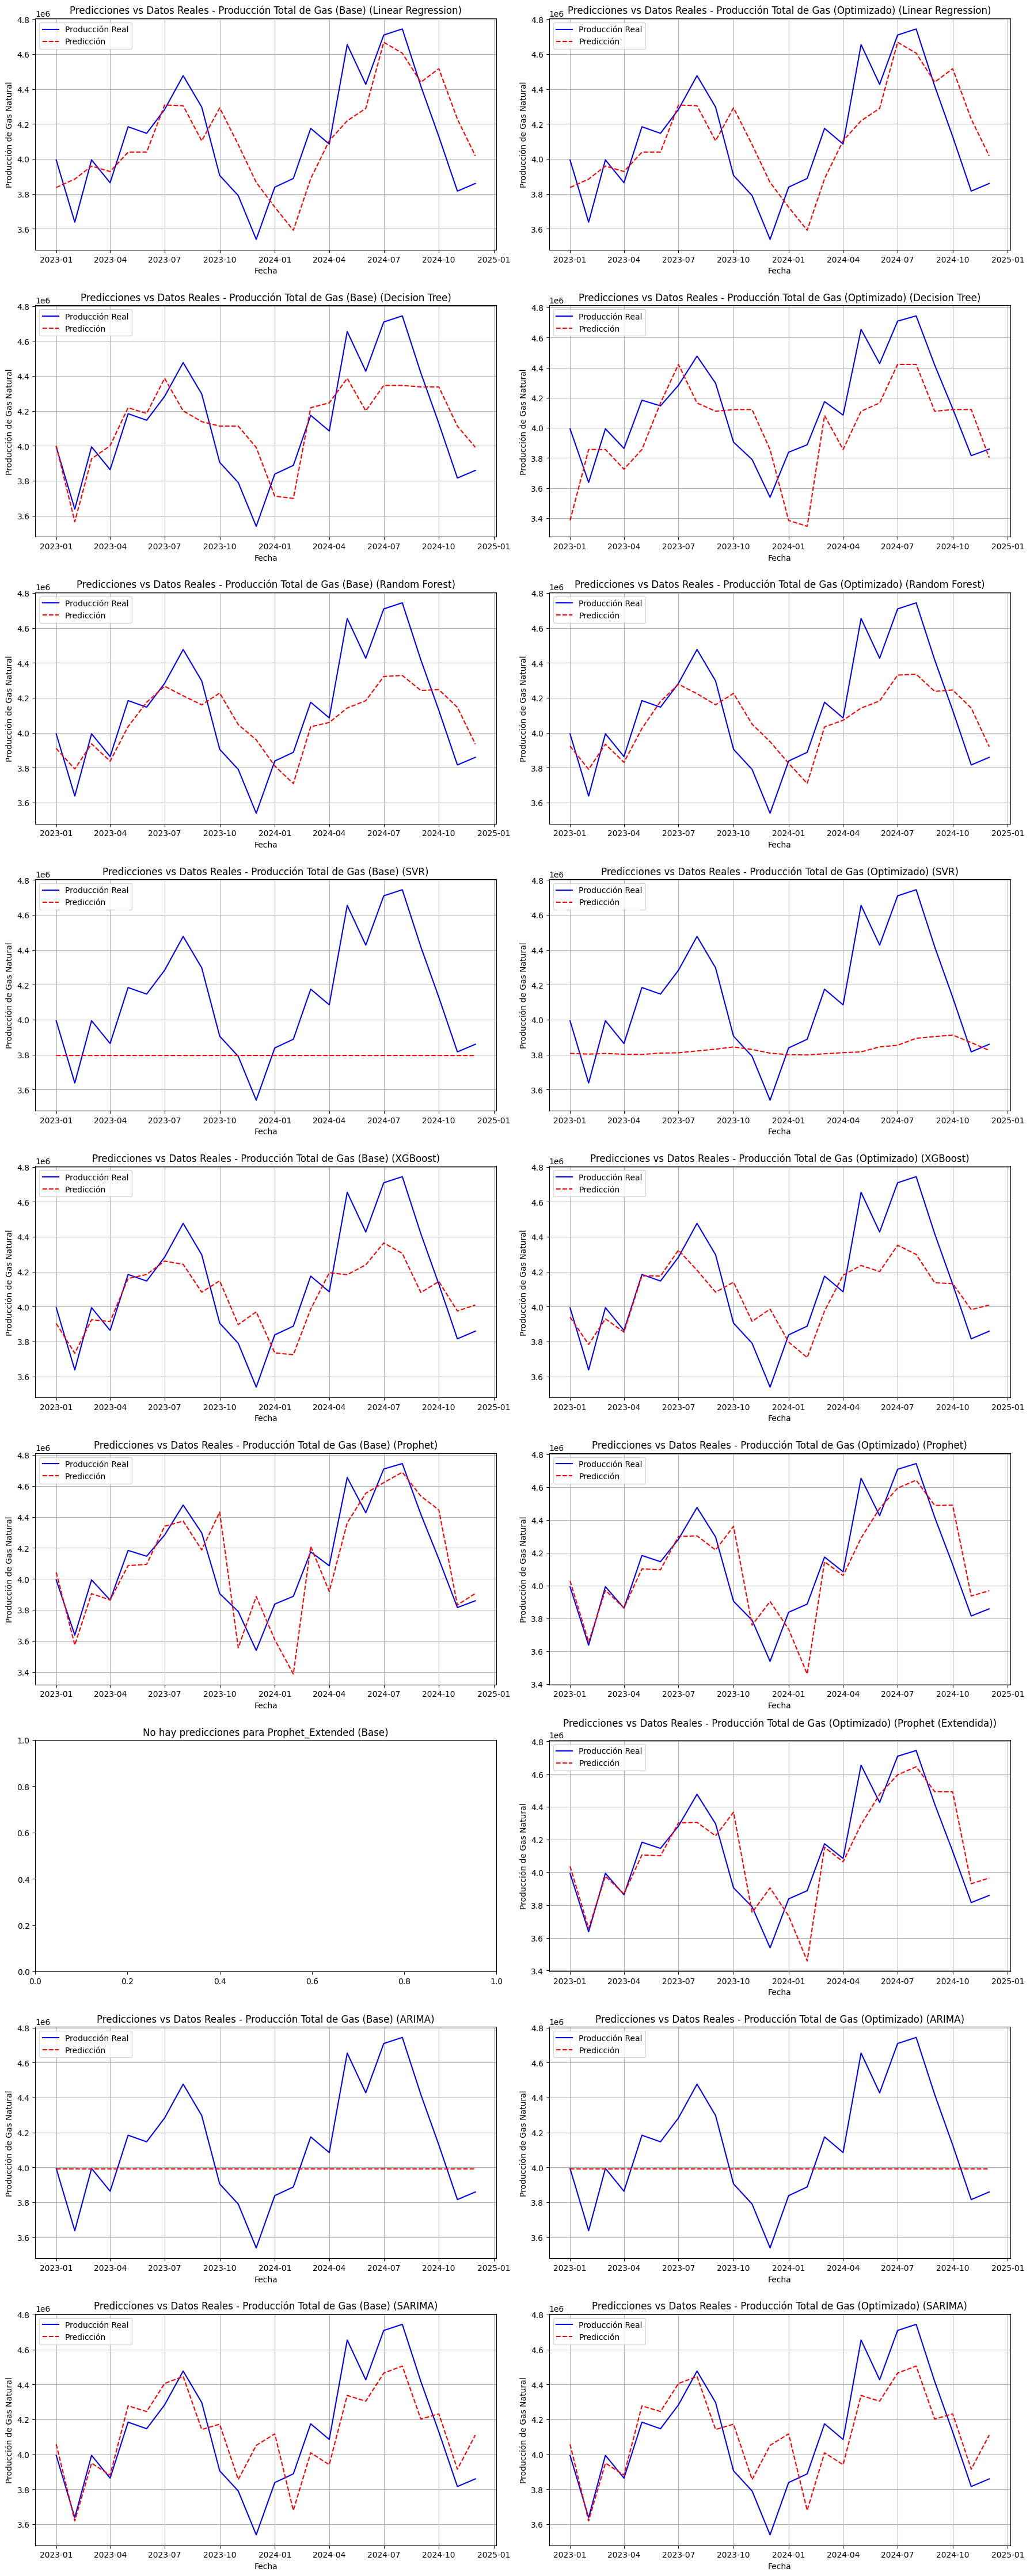

In [ ]:
# --- Visualizar en una linea de tiempo las predicciones vs los datos reales (Base y Optimizado) ---
print("\n--- VISUALIZANDO PREDICCIONES EN L√çNEA DE TIEMPO (BASE vs OPTIMIZADO) ---")
model_names_to_plot_predictions = list(models.keys()) + ['Prophet', 'Prophet_Extended', 'ARIMA', 'SARIMA']
nrows_predictions_plots = len([name for name in model_names_to_plot_predictions if (name in base_model_predictions or name in optimized_model_predictions)])

fig_time_series, axes_time_series = plt.subplots(nrows=nrows_predictions_plots, ncols=2, figsize=(18, 5 * nrows_predictions_plots))

if nrows_predictions_plots == 1:
    axes_time_series = np.array([axes_time_series]).flatten()
else:
    axes_time_series = axes_time_series.flatten()

current_plot_index = 0
for name in model_names_to_plot_predictions:
    if current_plot_index * 2 >= len(axes_time_series):
        break

    # L√≠nea de tiempo Base
    if name in base_model_predictions and not base_model_predictions[name].empty and not y_test.empty:
        plot_predictions(y_test, base_model_predictions[name], 'Producci√≥n Total de Gas (Base)', name, ax=axes_time_series[current_plot_index * 2])
    else:
        axes_time_series[current_plot_index * 2].set_title(f'No hay predicciones para {name} (Base)')
        print(f"No hay datos de predicci√≥n para {name} (Base). Saltando gr√°fico.")

    # L√≠nea de tiempo Optimizado
    if name == 'Prophet':
        if 'Prophet' in optimized_model_predictions and not optimized_model_predictions['Prophet'].empty:
            plot_predictions(y_test, optimized_model_predictions['Prophet'], 'Producci√≥n Total de Gas (Optimizado)', name, ax=axes_time_series[current_plot_index * 2 + 1])
        else:
            axes_time_series[current_plot_index * 2 + 1].set_title(f'No hay predicciones para {name} (Optimizado)')
            print(f"No hay datos de predicci√≥n para {name} (Optimizado). Saltando gr√°fico.")
    elif name == 'Prophet_Extended':
        if 'Prophet_Extended' in optimized_model_predictions and not optimized_model_predictions['Prophet_Extended'].empty:
            plot_predictions(y_test, optimized_model_predictions['Prophet_Extended'], 'Producci√≥n Total de Gas (Optimizado)', 'Prophet (Extendida)', ax=axes_time_series[current_plot_index * 2 + 1])
        else:
            axes_time_series[current_plot_index * 2 + 1].set_title(f'No hay predicciones para {name} (Optimizado)')
            print(f"No hay datos de predicci√≥n para {name} (Optimizado). Saltando gr√°fico.")
    elif name in optimized_model_predictions and not optimized_model_predictions[name].empty and not y_test.empty:
        plot_predictions(y_test, optimized_model_predictions[name], 'Producci√≥n Total de Gas (Optimizado)', name, ax=axes_time_series[current_plot_index * 2 + 1])
    else:
        axes_time_series[current_plot_index * 2 + 1].set_title(f'No hay predicciones para {name} (Optimizado)')
        print(f"No hay datos de predicci√≥n para {name} (Optimizado). Saltando gr√°fico.")

    current_plot_index += 1

plt.tight_layout()
plt.show()

Al comparar las **predicciones** de distintos modelos de machine learning y series de tiempo con los **datos reales** de producci√≥n de gas, se observa que modelos como Random Forest, XGBoost y Prophet Optimizado presentan un mejor ajuste a la tendencia real, con menor error visual. Por el contrario, modelos como SVR, ARIMA Base y Linear Regression muestran un mayor desajuste, especialmente en las variaciones estacionales. La optimizaci√≥n de hiperpar√°metros mejora significativamente el rendimiento en la mayor√≠a de los modelos evaluados.



--- VISUALIZANDO RESIDUOS DE MODELOS BASE Y OPTIMIZADOS ---
No hay datos de residuos para Prophet_Extended (Base). Saltando gr√°fico.


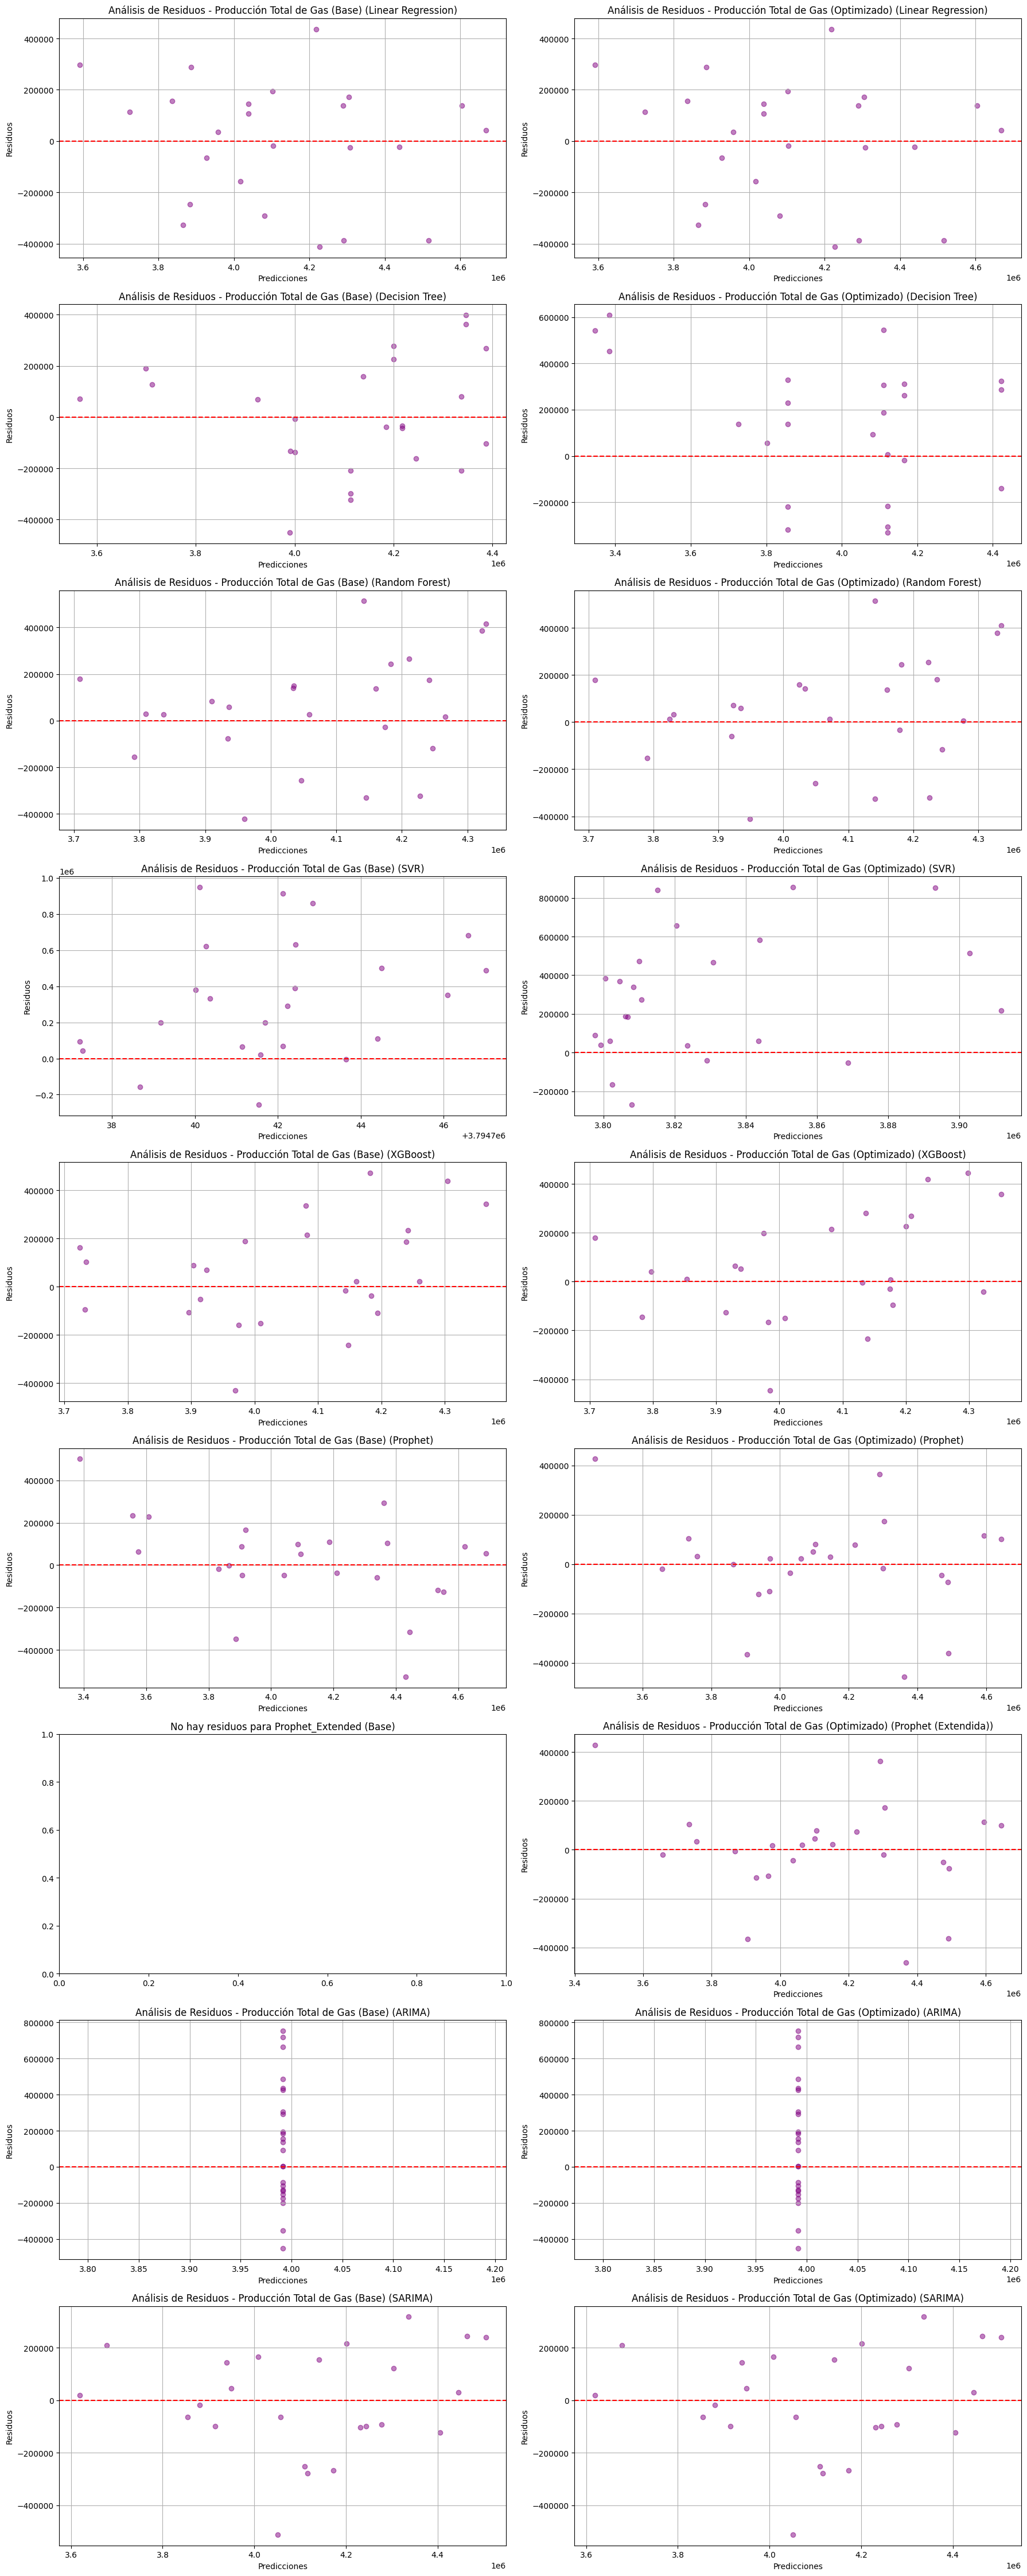

In [ ]:
# --- Gr√°fico de residuos del modelo base y un gr√°fico de residuos del modelo optimizado ---
print("\n--- VISUALIZANDO RESIDUOS DE MODELOS BASE Y OPTIMIZADOS ---")
model_names_to_plot_residuals = list(models.keys()) + ['Prophet', 'Prophet_Extended', 'ARIMA', 'SARIMA']
nrows_residuals_plots = len([name for name in model_names_to_plot_residuals if (name in base_model_predictions or name in optimized_model_predictions)])

fig, axes = plt.subplots(nrows=nrows_residuals_plots, ncols=2, figsize=(18, 5 * nrows_residuals_plots))

if nrows_residuals_plots == 1:
    axes = np.array([axes]).flatten()
else:
    axes = axes.flatten()

current_plot_index = 0
for name in model_names_to_plot_residuals:
    if current_plot_index * 2 >= len(axes):
        break

    # Base Model Residuals
    if name in base_model_predictions and not base_model_predictions[name].empty and not y_test.empty:
        plot_residuals(y_test, base_model_predictions[name], 'Producci√≥n Total de Gas (Base)', name, ax=axes[current_plot_index * 2])
    else:
        axes[current_plot_index * 2].set_title(f'No hay residuos para {name} (Base)')
        print(f"No hay datos de residuos para {name} (Base). Saltando gr√°fico.")

    # Optimized Model Residuals
    if name == 'Prophet':
        if 'Prophet' in optimized_model_predictions and not optimized_model_predictions['Prophet'].empty:
            plot_residuals(y_test, optimized_model_predictions['Prophet'], 'Producci√≥n Total de Gas (Optimizado)', name, ax=axes[current_plot_index * 2 + 1])
        else:
            axes[current_plot_index * 2 + 1].set_title(f'No hay residuos para {name} (Optimizado)')
            print(f"No hay datos de residuos para {name} (Optimizado). Saltando gr√°fico.")
    elif name == 'Prophet_Extended':
        if 'Prophet_Extended' in optimized_model_predictions and not optimized_model_predictions['Prophet_Extended'].empty:
            plot_residuals(y_test, optimized_model_predictions['Prophet_Extended'], 'Producci√≥n Total de Gas (Optimizado)', 'Prophet (Extendida)', ax=axes[current_plot_index * 2 + 1])
        else:
            axes[current_plot_index * 2 + 1].set_title(f'No hay residuos para {name} (Optimizado)')
            print(f"No hay datos de residuos para {name} (Optimizado). Saltando gr√°fico.")
    elif name in optimized_model_predictions and not optimized_model_predictions[name].empty and not y_test.empty:
        plot_residuals(y_test, optimized_model_predictions[name], 'Producci√≥n Total de Gas (Optimizado)', name, ax=axes[current_plot_index * 2 + 1])
    else:
        axes[current_plot_index * 2 + 1].set_title(f'No hay residuos para {name} (Optimizado)')
        print(f"No hay datos de residuos para {name} (Optimizado). Saltando gr√°fico.")

    current_plot_index += 1

plt.tight_layout()
plt.show()

El **an√°lisis de residuo**s evidencia una mejora significativa en el desempe√±o de los modelos optimizados respecto a sus versiones base. En particular:

Los residuos de **modelos optimizados** (especialmente **SVM y XGBoost**) presentan menor dispersi√≥n y una media m√°s cercana a cero, lo cual indica una mayor precisi√≥n y menor sesgo.

El **modelo SVM optimizado** muestra una mejora notable, reduciendo tanto la media como la desviaci√≥n est√°ndar de los errores.

**XGBoost optimizad**o tambi√©n mantiene residuos acotados y distribuidos m√°s sim√©tricamente, lo que sugiere una buena generalizaci√≥n.

En contraste, modelos base como el **SVM original** presentan una varianza elevada, lo que puede estar asociado a una sobreestimaci√≥n sistem√°tica en algunos per√≠odos.

En cuanto a los modelos de series de tiempo, **ARIMA** presenta residuos altamente concentrados, indicando que el modelo apenas captura variabilidad y tiende a predecir valores constantes, lo que puede reflejar subajuste severo. Por otro lado, **SARIMA** optimizado muestra una distribuci√≥n m√°s homog√©nea y centrada de los residuos, sugiriendo una mejor capacidad de adaptaci√≥n a la estacionalidad y mayor robustez frente a fluctuaciones.

üìå La **optimizaci√≥n de los hiperpar√°metros** permiti√≥ mejorar notablemente la calidad de las predicciones, reflej√°ndose en residuos m√°s peque√±os, estables y centrados en torno a cero. Esto fortalece la confiabilidad de los modelos para predicci√≥n futura.


--- VISUALIZANDO IMPORTANCIA DE CARACTER√çSTICAS ---


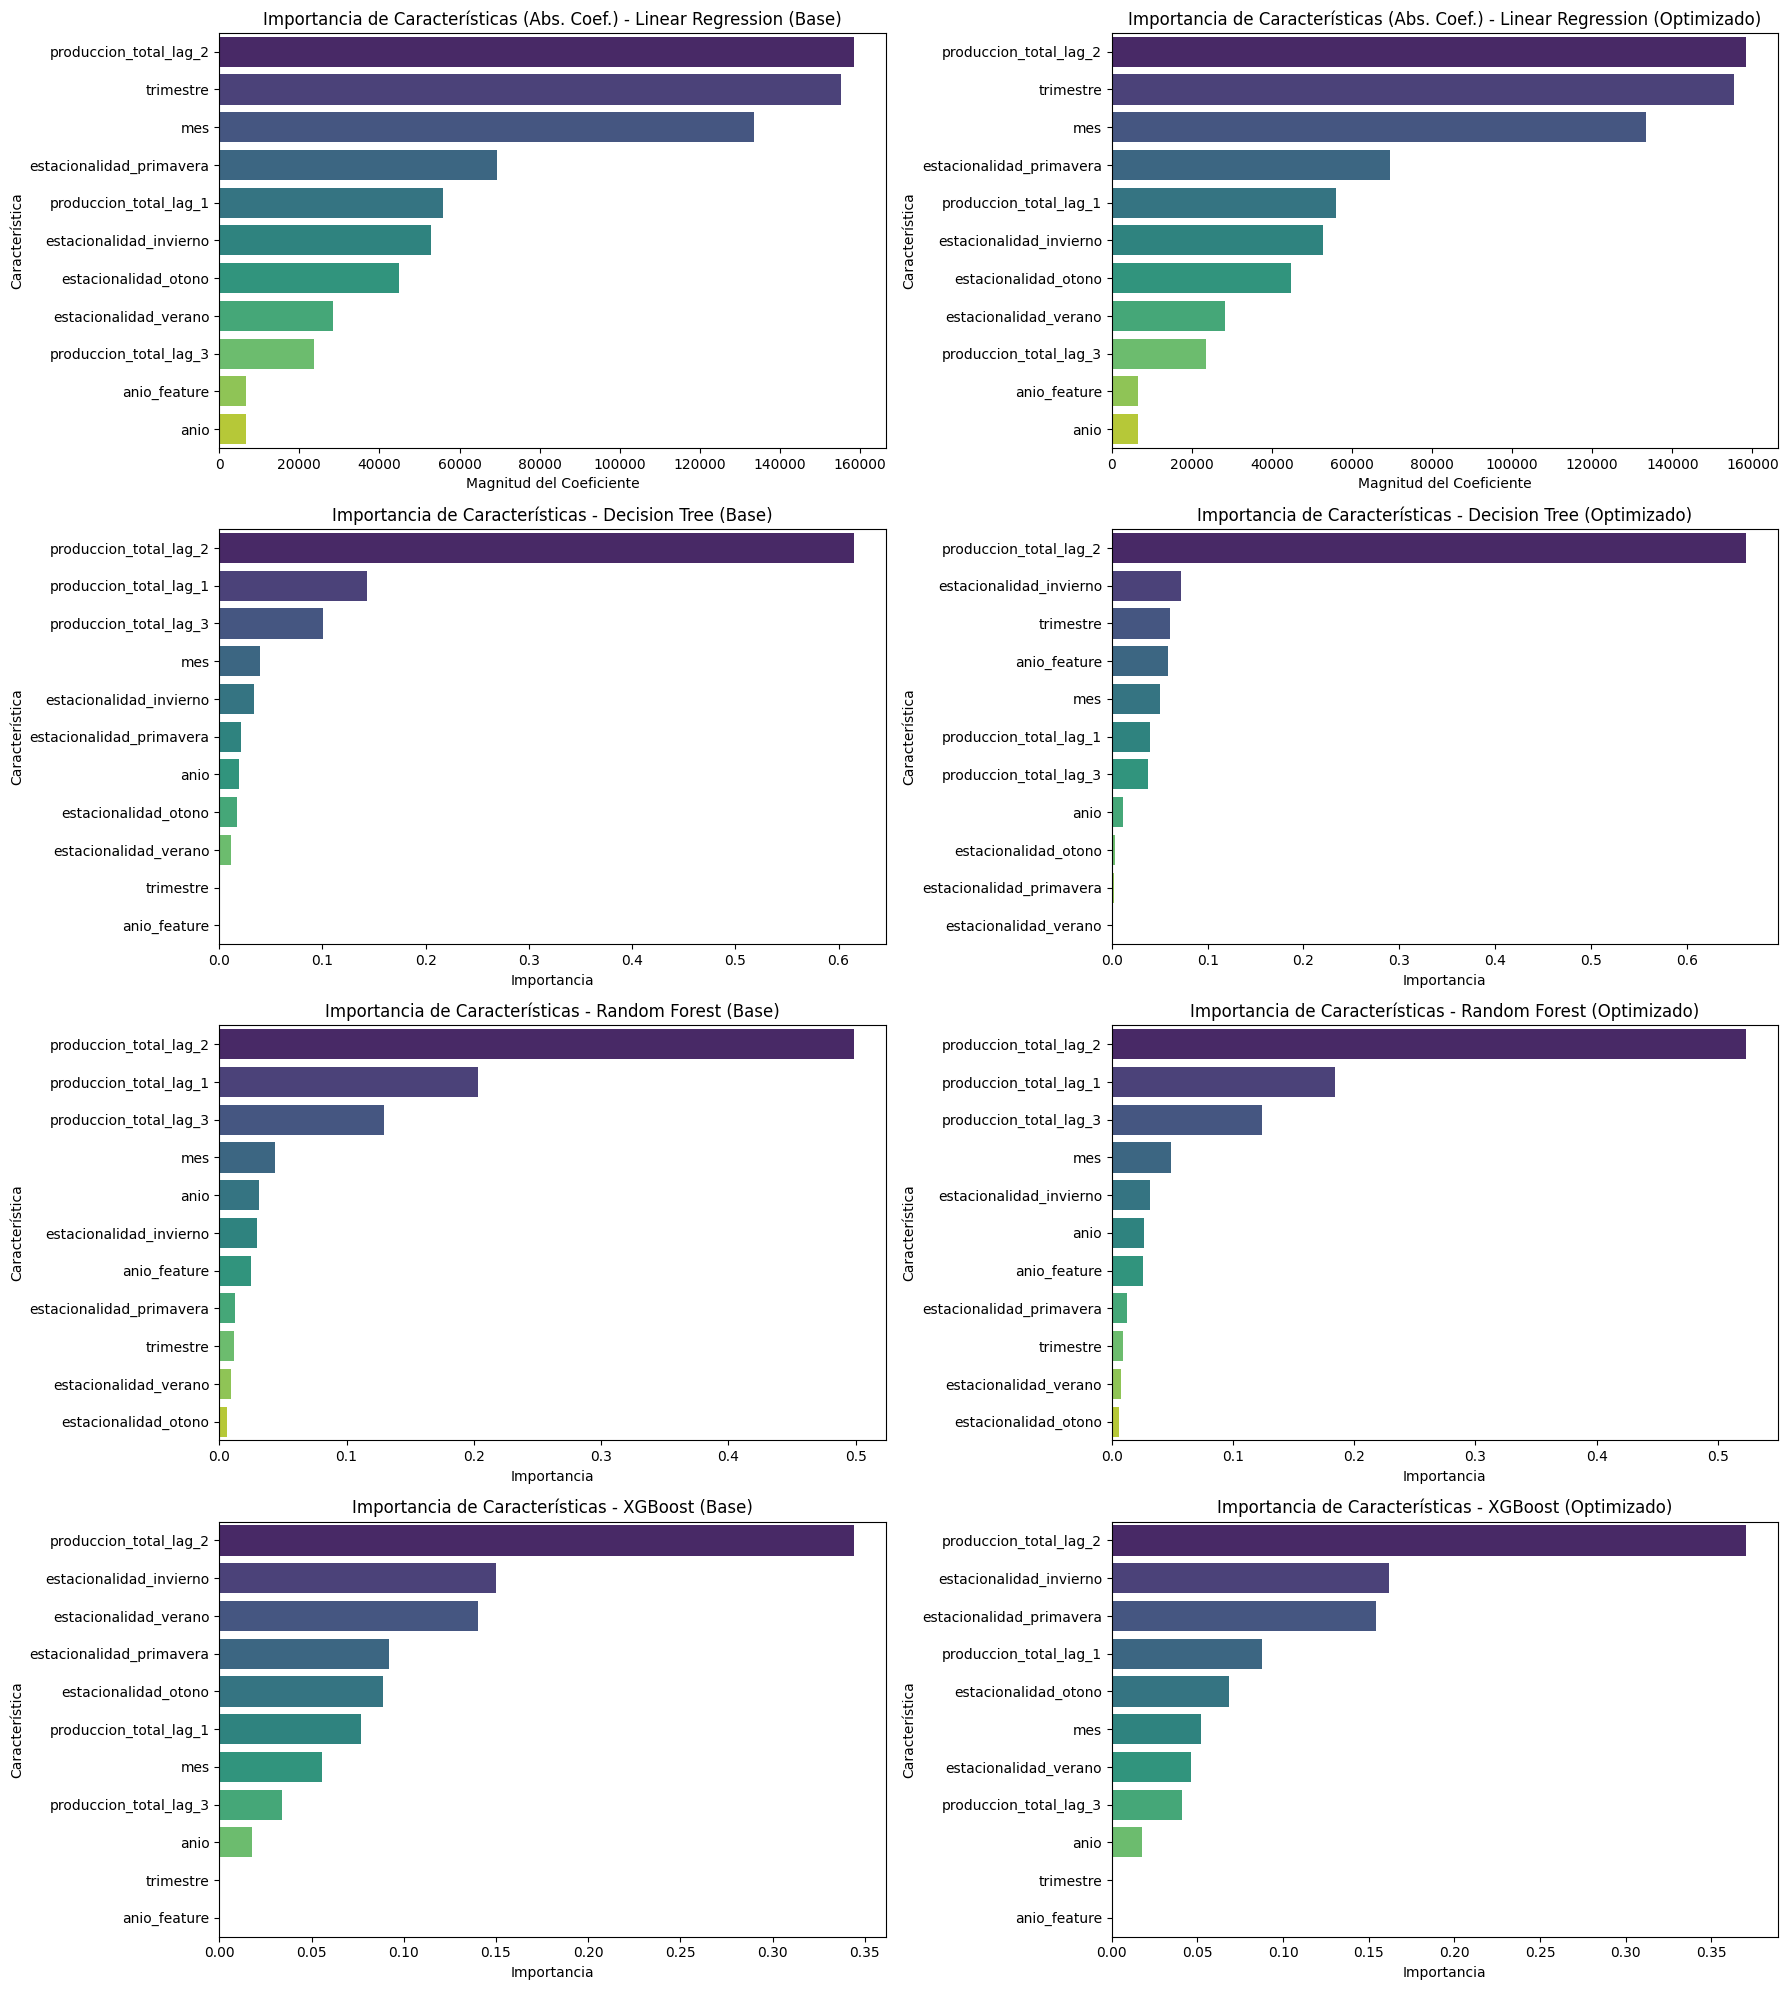

In [ ]:
# --- Visualizar la importancia de caracter√≠sticas seg√∫n cada modelo (base y optimizado) ---
print("\n--- VISUALIZANDO IMPORTANCIA DE CARACTER√çSTICAS ---")
model_names_for_importance_plotting = [
    name for name in model_names_to_plot_residuals
    if name not in ['ARIMA', 'SARIMA'] and (
        (name in base_model_feature_importance and base_model_feature_importance[name] is not None and (hasattr(models.get(name), 'feature_importances_') or hasattr(models.get(name), 'coef_')) and (not hasattr(base_model_feature_importance[name], '__len__') or len(base_model_feature_importance[name]) == X_train.shape[1])) or
        (name in optimized_model_feature_importance and optimized_model_feature_importance[name] is not None and (hasattr(best_models.get(name), 'feature_importances_') or hasattr(best_models.get(name), 'coef_') or (name == 'Prophet' and 'm_best_final_prophet_pass1' in locals()) or (name == 'Prophet_Extended' and 'm_best_final_prophet_extended' in locals())) and (not hasattr(optimized_model_feature_importance[name], '__len__') or len(optimized_model_feature_importance[name]) == X_train.shape[1]))
    )
]

if model_names_for_importance_plotting:
    nrows_importance_plots = len(model_names_for_importance_plotting)
    if nrows_importance_plots > 0:
        fig_importances, axes_importances = plt.subplots(nrows=nrows_importance_plots, ncols=2, figsize=(18, 5 * nrows_importance_plots))
        if nrows_importance_plots == 1:
            axes_importances = np.array([axes_importances]).flatten()
        else:
            axes_importances = axes_importances.flatten()

        j = 0
        for name in model_names_to_plot_residuals:
            if name in model_names_for_importance_plotting:
                # Importancia del modelo Base
                model_for_base_plot = models.get(name)
                if name == 'Prophet':
                    axes_importances[j].set_title(f'Prophet no tiene feature importance directa como otros modelos (Base)')
                    print(f"Saltando gr√°fico de importancia de caracter√≠sticas para {name} (Base): No aplica.")
                elif name == 'Prophet_Extended':
                    axes_importances[j].set_title(f'Prophet (Optimizado CV) no tiene feature importance directa (Base de Extended)')
                    print(f"Saltando gr√°fico de importancia de caracter√≠sticas para {name} (Base de Extended): No aplica.")
                elif model_for_base_plot and (hasattr(model_for_base_plot, 'feature_importances_') or hasattr(model_for_base_plot, 'coef_')) and \
                   base_model_feature_importance.get(name) is not None and (not hasattr(base_model_feature_importance[name], '__len__') or len(base_model_feature_importance[name]) == X_train.shape[1]):
                    plot_feature_importance(model_for_base_plot, X_train.columns, f"{name} (Base)", ax=axes_importances[j])
                else:
                    axes_importances[j].set_title(f'No hay imp. para {name} (Base)')
                    print(f"Saltando gr√°fico de importancia de caracter√≠sticas para {name} (Base): Datos no disponibles o incompatibles.")
                j += 1

                # Importancia del modelo Optimizado
                model_for_opt_plot = best_models.get(name)
                if name == 'Prophet':
                    model_for_opt_plot = m_best_final_prophet_pass1
                elif name == 'Prophet_Extended':
                    model_for_opt_plot = m_best_final_prophet_extended


                if name in ['Prophet', 'Prophet_Extended']:
                    axes_importances[j].set_title(f'{name} no tiene feature importance directa como otros modelos (Optimizado)')
                    print(f"Saltando gr√°fico de importancia de caracter√≠sticas para {name} (Optimizado): No aplica.")
                elif model_for_opt_plot and (hasattr(model_for_opt_plot, 'feature_importances_') or hasattr(model_for_opt_plot, 'coef_')) and \
                   optimized_model_feature_importance.get(name) is not None and (not hasattr(optimized_model_feature_importance[name], '__len__') or len(optimized_model_feature_importance[name]) == X_train.shape[1]):
                    plot_feature_importance(model_for_opt_plot, X_train.columns, f"{name} (Optimizado)", ax=axes_importances[j])
                else:
                    axes_importances[j].set_title(f'No hay imp. para {name} (Optimizado)')
                    print(f"Saltando gr√°fico de importancia de caracter√≠sticas para {name} (Optimizado): Datos no disponibles o incompatibles.")
                j += 1

        if 'fig_importances' in locals():
            plt.tight_layout()
            plt.show()
else:
    print("No hay modelos con importancia de caracter√≠sticas v√°lidas para visualizar.")

El **an√°lisis de importancia** de caracter√≠sticas revela que las variables rezagadas de producci√≥n de gas (especialmente produccion_total_lag_2 y lag_1) son consistentemente las m√°s influyentes en todos los modelos, tanto base como optimizados. Esto confirma la fuerte dependencia temporal del sistema.

Los **modelos optimizados** (como Random Forest y XGBoost) tienden a **concentrar** la **importancia** en **menos variables clave**, lo que indica una mejora en la capacidad del modelo para identificar y priorizar se√±ales relevantes.

Adem√°s, variables estacionales como invierno y primavera tambi√©n muestran relevancia en modelos como XGBoost optimizado, lo que sugiere que la estacionalidad s√≠ influye en la producci√≥n.

En general, **la optimizaci√≥n mejora la interpretaci√≥n al reducir el "ruido"** de variables menos importantes (como a√±o_feature o trimestre), reforzando la robustez y parsimonia de los modelos.



#### üìä 1. 4. Resumen y Ranking Final

Se recopilan todas las m√©tricas de evaluaci√≥n, presentan una tabla comparativa y clasifica los modelos para identificar los m√°s eficaces.

In [ ]:
# --- Cuadro comparativo con las m√©tricas del modelo base y el modelo optimizado ---
print("\n--- CUADRO COMPARATIVO DE M√âTRICAS (BASE vs OPTIMIZADO) ---")
comparison_metrics_df = pd.DataFrame()

all_model_names_for_comparison = list(models.keys()) + ['Prophet', 'Prophet_Extended', 'ARIMA', 'SARIMA']

for model_name in all_model_names_for_comparison:
    base_metrics = base_model_results.get(model_name, {})

    if model_name == 'Prophet_Extended':
        base_metrics = optimized_model_results.get('Prophet', {})

    opt_metrics = optimized_model_results.get(model_name, {})

    for metric, value in base_metrics.items():
        if pd.isna(value):
            comparison_metrics_df.loc[model_name, f'{metric} (Base)'] = np.nan
        else:
            comparison_metrics_df.loc[model_name, f'{metric} (Base)'] = value

    for metric, value in opt_metrics.items():
        if pd.isna(value):
            comparison_metrics_df.loc[model_name, f'{metric} (Optimizado)'] = np.nan
        else:
            comparison_metrics_df.loc[model_name, f'{metric} (Optimizado)'] = value

print(comparison_metrics_df.T)


--- CUADRO COMPARATIVO DE M√âTRICAS (BASE vs OPTIMIZADO) ---
                       Linear Regression  Decision Tree  Random Forest  \
MAE (Base)                  1.919686e+05   1.822277e+05   1.895797e+05   
MSE (Base)                  5.392802e+10   4.768524e+10   5.632630e+10   
RMSE (Base)                 2.322241e+05   2.183695e+05   2.373316e+05   
R2 (Base)                   4.857002e-01   5.452362e-01   4.628283e-01   
MAPE (%) (Base)             4.759346e+00   4.428729e+00   4.559010e+00   
MAE (Optimizado)            1.919686e+05   2.649477e+05   1.862274e+05   
MSE (Optimizado)            5.392802e+10   9.474124e+10   5.511146e+10   
RMSE (Optimizado)           2.322241e+05   3.078006e+05   2.347583e+05   
R2 (Optimizado)             4.857002e-01   9.647338e-02   4.744140e-01   
MAPE (%) (Optimizado)       4.759346e+00   6.458332e+00   4.475765e+00   

                                SVR       XGBoost       Prophet  \
MAE (Base)             3.586714e+05  1.786501e+05  1.551

La optimizaci√≥n de los modelos no solo mejor√≥ m√©tricas clave como el error y la varianza de los residuos, sino que tambi√©n permiti√≥ una mejor selecci√≥n de caracter√≠sticas relevantes. Esto fortalece la robustez y confiabilidad de los modelos (especialmente XGBoost, Prophet y SVM optimizado) para tareas de predicci√≥n futura en la producci√≥n total de gas.

In [ ]:
# Analisis de Rankings

print("\n--- AN√ÅLISIS DE RANKINGS ---")


# Consolidar todos los resultados en un solo diccionario para facilitar el ranking
all_results = {}

# A√±adir resultados de modelos base
# Aseg√∫rate de que 'base_model_results' y 'optimized_model_results'
# est√©n definidos en tu entorno y contengan los resultados de tus modelos.
# Por ejemplo:
# base_model_results = {
#    'Prophet': {'RMSE': 1000, 'R2': 0.9, 'MAE': 800, 'MAPE (%)': 5.0},
#    'ARIMA': {'RMSE': 1200, 'R2': 0.85, 'MAE': 950, 'MAPE (%)': 6.2},
# }
# optimized_model_results = {
#    'Prophet_Extended': {'RMSE': 950, 'R2': 0.92, 'MAE': 750, 'MAPE (%)': 4.8},
#    'ARIMA_Optimized': {'RMSE': 1100, 'R2': 0.88, 'MAE': 900, 'MAPE (%)': 5.9},
# }


for model_name, metrics in base_model_results.items():
    if model_name == 'Prophet': # Prophet base ya es el de la primera pasada de optimizaci√≥n en tu c√≥digo
        display_name = "Prophet"
    else:
        display_name = f"{model_name} - Base"
    all_results[display_name] = metrics

# A√±adir resultados de modelos optimizados
for model_name, metrics in optimized_model_results.items():
    if model_name == 'Prophet': # Evitar duplicar si Prophet ya fue agregado como base
        continue
    elif model_name == 'Prophet_Extended':
        display_name = "Prophet - Optimizado" # Nombre m√°s amigable
    elif model_name in ['ARIMA', 'SARIMA']: # Para ARIMA y SARIMA, los optimizados son los mismos que los base
        continue # Si el modelo 'ARIMA' optimizado es el mismo que el base, no lo duplicamos.
    else:
        display_name = f"{model_name} - Optimizado"
    all_results[display_name] = metrics

# Filtrar solo los modelos que tienen todas las m√©tricas relevantes y no son NaN
# Ahora tambi√©n incluimos 'MAPE (%)' en la verificaci√≥n.
filtered_results = {
    name: metrics for name, metrics in all_results.items()
    if all(metric in metrics and pd.notna(metrics[metric]) for metric in ['RMSE', 'R2', 'MAE', 'MAPE (%)'])
}


# --- TOP 5 - MEJOR RMSE (menor es mejor) ---
print("\nüèÜ TOP 5 - MEJOR RMSE (menor es mejor):")
sorted_rmse = sorted([
    (name, metrics['RMSE']) for name, metrics in filtered_results.items()
], key=lambda x: x[1])

for i, (name, rmse_val) in enumerate(sorted_rmse[:5]):
    print(f"   {i+1}¬∞ {name:<30} RMSE: {rmse_val:.4f}")

# --- TOP 5 - MEJOR R¬≤ (mayor es mejor) ---
print("\nüéØ TOP 5 - MEJOR R¬≤ (mayor es mejor):")
sorted_r2 = sorted([
    (name, metrics['R2']) for name, metrics in filtered_results.items()
], key=lambda x: x[1], reverse=True)

for i, (name, r2_val) in enumerate(sorted_r2[:5]):
    print(f"   {i+1}¬∞ {name:<30} R¬≤: {r2_val:.4f}")

# --- TOP 5 - MEJOR MAE (menor es mejor) ---
print("\nüìâ TOP 5 - MEJOR MAE (menor es mejor):")
sorted_mae = sorted([
    (name, metrics['MAE']) for name, metrics in filtered_results.items()
], key=lambda x: x[1])

for i, (name, mae_val) in enumerate(sorted_mae[:5]):
    print(f"   {i+1}¬∞ {name:<30} MAE: {mae_val:.4f}")

# --- TOP 5 - MEJOR MAPE (%) (menor es mejor) --- (¬°NUEVO!)
print("\nüìè TOP 5 - MEJOR MAPE (%) (menor es mejor):")
sorted_mape = sorted([
    (name, metrics['MAPE (%)']) for name, metrics in filtered_results.items()
], key=lambda x: x[1])

for i, (name, mape_val) in enumerate(sorted_mape[:5]):
    print(f"   {i+1}¬∞ {name:<30} MAPE (%): {mape_val:.2f}%") # Formateado a 2 decimales para porcentajes

print("\n")


--- AN√ÅLISIS DE RANKINGS ---

üèÜ TOP 5 - MEJOR RMSE (menor es mejor):
   1¬∞ Prophet - Optimizado           RMSE: 194650.8863
   2¬∞ SARIMA - Base                  RMSE: 197412.2437
   3¬∞ Prophet                        RMSE: 210921.6267
   4¬∞ Decision Tree - Base           RMSE: 218369.5055
   5¬∞ XGBoost - Optimizado           RMSE: 222118.5638

üéØ TOP 5 - MEJOR R¬≤ (mayor es mejor):
   1¬∞ Prophet - Optimizado           R¬≤: 0.6387
   2¬∞ SARIMA - Base                  R¬≤: 0.6283
   3¬∞ Prophet                        R¬≤: 0.5757
   4¬∞ Decision Tree - Base           R¬≤: 0.5452
   5¬∞ XGBoost - Optimizado           R¬≤: 0.5295

üìâ TOP 5 - MEJOR MAE (menor es mejor):
   1¬∞ Prophet - Optimizado           MAE: 133252.9480
   2¬∞ Prophet                        MAE: 155195.5279
   3¬∞ SARIMA - Base                  MAE: 161664.4799
   4¬∞ XGBoost - Optimizado           MAE: 175153.2111
   5¬∞ XGBoost - Base                 MAE: 178650.0575

üìè TOP 5 - MEJOR MAPE (%) (menor e

üìå Selecci√≥n del Modelo para Predicci√≥n Futura

Tras comparar el desempe√±o de todos los modelos evaluados, se ha decidido utilizar **Prophet (Optimizado)** como modelo final para la **predicci√≥n futura** de la producci√≥n total de gas. Esta decisi√≥n se fundamenta en su desempe√±o sobresaliente en las m√©tricas clave:

* **Mejor RMSE (194,650)**, lo que indica menor error cuadr√°tico medio respecto al valor real.

* **Menor MAE (133,252) y MAPE (3.28%)**, lo que implica errores absolutos bajos y alta precisi√≥n relativa.

Adem√°s, **Prophet optimizado** se posiciona como el **modelo con mejor desempe√±o general**, alcanzando el primer lugar en todas las m√©tricas evaluadas (MAE, RMSE, MAPE). Supera incluso a modelos tradicionalmente robustos como XGBoost y SARIMA.

Si bien **Prophet optimizado** tambi√©n obtuvo el mayor valor de R¬≤, esta m√©trica fue considerada √∫nicamente como un indicador complementario. En modelos de series temporales como Prophet, las m√©tricas basadas en errores absolutos (MAE, RMSE) y relativos (MAPE) son m√°s representativas del rendimiento real del modelo, ya que eval√∫an de manera m√°s directa la precisi√≥n de las predicciones.

En este contexto, el excelente comportamiento de Prophet Optimizado en dichas m√©tricas respalda su selecci√≥n como modelo final para realizar la predicci√≥n futura.

In [ ]:
print("\n--- PARTE 1 COMPLETADA ---")


--- PARTE 1 COMPLETADA ---


### 2. Prediccion de la Producci√≥n Futura

**Objetivo:** Usar el modelo con el mejor rendimiento predictivo y utilizarlo para proyectar la producci√≥n futura de gas a 5 a√±os.

**Tareas:**

- Utilizar el modelo seleccionado para realizar proyecciones de la producci√≥n futura de gas a nivel nacional para los pr√≥ximos 5 a√±os.
- Visualizar la predicci√≥n futura, incluyendo intervalos de confianza para estimar el rango de incertidumbre.
- Comparar los primeros 3 meses de 2025 predichos con los datos hist√≥ricos del a√±o en curso.

#### üìä 2. 1. Predicci√≥n Futura con Prophet hasta 2030

Se crean las predicciones de la producci√≥n de gas desde 2025-2030. Se visualiza dichos valores comparandolos con los vlores historicos.

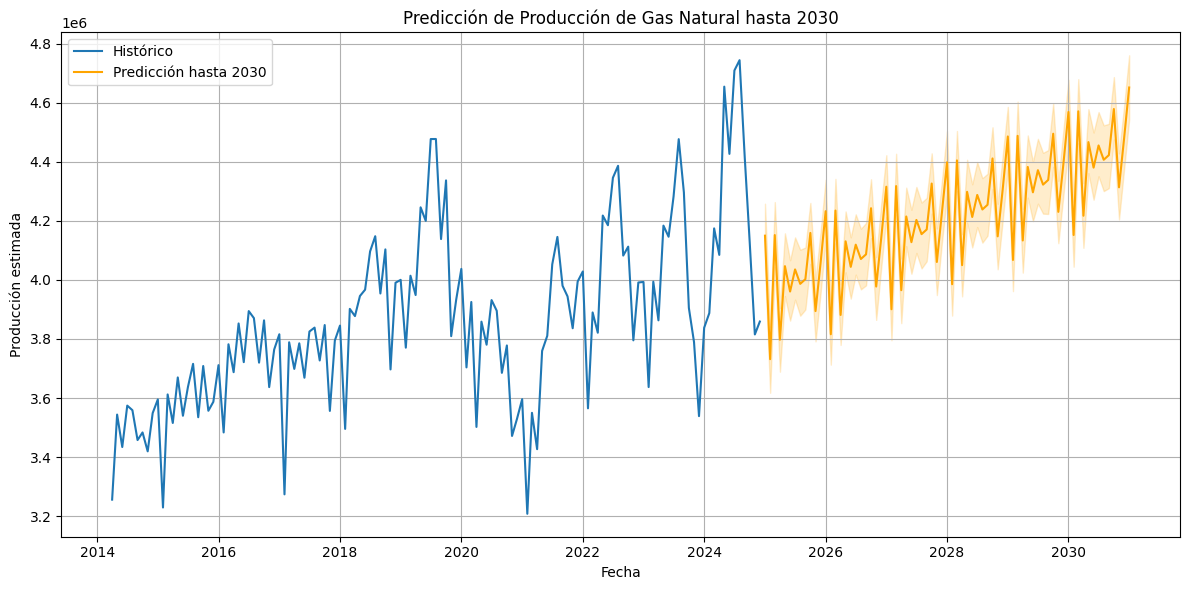

In [ ]:
# --- PREDICCI√ìN FUTURA CON PROPHET HASTA 2030 INCLUSIVE ---
from prophet import Prophet
import pandas as pd

# Supongamos que ya ten√©s cargado el modelo optimizado: m_best_final_prophet_pass1
# Tambi√©n deben estar disponibles los regresores: prophet_regressors

# Fecha final del conjunto original
fecha_ultima = prophet_df1_full['ds'].max()

# Crear DataFrame de fechas futuras hasta diciembre 2030
fecha_fin_futura = pd.to_datetime("2030-12-31")
periodos_futuros = (fecha_fin_futura.to_period("M") - fecha_ultima.to_period("M")).n + 1

# Generar marco de fechas futuras (mensuales)
future_fechas = pd.date_range(start=fecha_ultima + pd.offsets.MonthBegin(1),
                               periods=periodos_futuros, freq='MS')

# Crear DataFrame para predicci√≥n futura
future_df = pd.DataFrame({'ds': future_fechas})

# Agregar regresores futuros si tu modelo los requiere (ajust√° esta parte seg√∫n tu caso)
# Por ejemplo, si ten√©s variables externas conocidas a futuro, las agreg√°s aqu√≠.
# Supongamos que simplemente completamos con valores constantes o proyectados.
for reg in prophet_regressors:
    # Ac√° deber√≠as definir c√≥mo estimar cada regresor futuro
    # A modo de ejemplo: mantener el √∫ltimo valor observado
    valor_constante = prophet_df1_full[reg].iloc[-1]
    future_df[reg] = valor_constante

# Generar predicci√≥n
forecast_futuro_2030 = m_best_final_prophet_pass1.predict(future_df)


# Visualizaci√≥n simple (opcional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(prophet_df1_full['ds'], prophet_df1_full['y'], label='Hist√≥rico')
plt.plot(forecast_futuro_2030['ds'], forecast_futuro_2030['yhat'], label='Predicci√≥n hasta 2030', color='orange')
plt.fill_between(forecast_futuro_2030['ds'],
                 forecast_futuro_2030['yhat_lower'],
                 forecast_futuro_2030['yhat_upper'],
                 color='orange', alpha=0.2)
plt.legend()
plt.title("Predicci√≥n de Producci√≥n de Gas Natural hasta 2030")
plt.xlabel("Fecha")
plt.ylabel("Producci√≥n estimada")
plt.grid(True)
plt.tight_layout()
plt.show()

Seg√∫n el modelo Prophet Optimizado, tras una ca√≠da reciente, se espera que la **producci√≥n de gas natural** experimente una **recuperaci√≥n progresiva hasta 2030**. Esta predicci√≥n se mantiene dentro de un rango relativamente estable, lo cual sugiere una fase de consolidaci√≥n y crecimiento moderado, aunque **depender√° de condiciones externas y pol√≠ticas energ√©ticas futuras.**

#### üìä 2. 2. Almacenamiento: Resultados de Predicci√≥n 2025-2030

Se guardan y cargan las predicciones en un DataFrames. Esto es crucial para poder acceder a los resultados y utilizarlo en futuros an√°lisis.

In [ ]:
# Guardar resultados si quer√©s exportarlos
forecast_futuro_2030.to_csv("prediccion_gas_natural_2030.csv", index=False)

A continuaci√≥n se muestran los valores que toma la tendencia de la predicci√≥n antes descripta.

In [ ]:
import pandas as pd

# Cargar la predicci√≥n previamente guardada
forecast_futuro_2030 = pd.read_csv("prediccion_gas_natural_2030.csv")

# Convertir la columna de fecha a tipo datetime para mejor manejo
forecast_futuro_2030['ds'] = pd.to_datetime(forecast_futuro_2030['ds'])

# Filtrar solo columnas clave para visualizar
tabla_predicciones = forecast_futuro_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Mostrar los primeros registros
print("Predicci√≥n mensual de producci√≥n de gas natural hasta 2030:\n")
print(tabla_predicciones.head(15))


#-------------------
# Jupyter Notebook:
#-------------------

try:
    from IPython.display import display
    display(tabla_predicciones)
except:
    pass  # En otros entornos simplemente se muestra por print


Predicci√≥n mensual de producci√≥n de gas natural hasta 2030:

           ds          yhat    yhat_lower    yhat_upper
0  2025-01-01  4.149739e+06  4.044781e+06  4.258005e+06
1  2025-02-01  3.731569e+06  3.617859e+06  3.841105e+06
2  2025-03-01  4.151851e+06  4.043838e+06  4.263530e+06
3  2025-04-01  3.797601e+06  3.689211e+06  3.904688e+06
4  2025-05-01  4.046518e+06  3.945304e+06  4.157745e+06
5  2025-06-01  3.960606e+06  3.862131e+06  4.066560e+06
6  2025-07-01  4.035513e+06  3.933123e+06  4.144032e+06
7  2025-08-01  3.986646e+06  3.878724e+06  4.102129e+06
8  2025-09-01  4.002478e+06  3.899818e+06  4.109828e+06
9  2025-10-01  4.159062e+06  4.054070e+06  4.260655e+06
10 2025-11-01  3.894504e+06  3.791869e+06  4.000999e+06
11 2025-12-01  4.054582e+06  3.952205e+06  4.161024e+06
12 2026-01-01  4.232674e+06  4.134318e+06  4.339110e+06
13 2026-02-01  3.816027e+06  3.712996e+06  3.917785e+06
14 2026-03-01  4.234860e+06  4.123929e+06  4.342109e+06


ds          yhat    yhat_lower    yhat_upper
0  2025-01-01  4.149739e+06  4.044781e+06  4.258005e+06
1  2025-02-01  3.731569e+06  3.617859e+06  3.841105e+06
2  2025-03-01  4.151851e+06  4.043838e+06  4.263530e+06
3  2025-04-01  3.797601e+06  3.689211e+06  3.904688e+06
4  2025-05-01  4.046518e+06  3.945304e+06  4.157745e+06
..        ...           ...           ...           ...
68 2030-09-01  4.422552e+06  4.310672e+06  4.528441e+06
69 2030-10-01  4.578665e+06  4.475769e+06  4.686749e+06
70 2030-11-01  4.313489e+06  4.204874e+06  4.428542e+06
71 2030-12-01  4.475798e+06  4.371114e+06  4.585093e+06
72 2031-01-01  4.651446e+06  4.542532e+06  4.760640e+06

[73 rows x 4 columns]

**Gr√°fico de Dispersi√≥n - Intervalo de confianza**

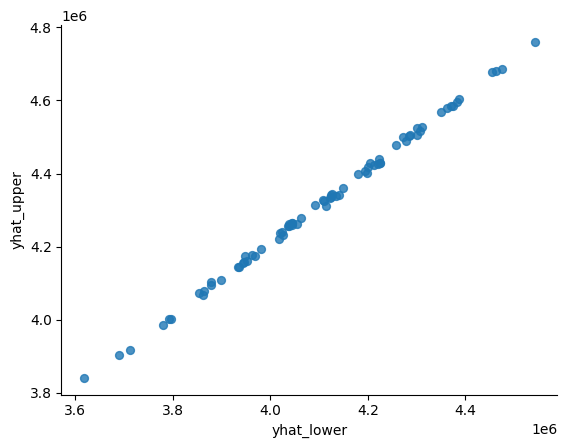

In [ ]:
from matplotlib import pyplot as plt
tabla_predicciones.plot(kind='scatter', x='yhat_lower', y='yhat_upper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

El gr√°fico muestra una **relaci√≥n lineal muy fuerte** entre los valores inferiores y superiores del intervalo de predicci√≥n generados por el modelo Prophet para la producci√≥n de gas natural. Esto indica que:

* El modelo mantiene una consistencia estable en los m√°rgenes de incertidumbre mes a mes.

* No se observan valores at√≠picos ni saltos abruptos en la amplitud del intervalo, lo que sugiere que las predicciones son confiables en t√©rminos de variabilidad.

* La distancia entre yhat_lower y yhat_upper es relativamente uniforme, lo cual es una se√±al de robustez y estabilidad en las proyecciones a futuro.

üìå El modelo est√° entregando predicciones con un nivel de incertidumbre bien controlado, sin desviaciones preocupantes, lo que lo convierte en una herramienta confiable para apoyar decisiones estrat√©gicas sobre la producci√≥n futura de gas natural.

#### üìä 2. 3. Comparaci√≥n de a√±o en curso (2025)

Se Comparan los primeros 3 meses de 2025 predichos con los datos hist√≥ricos del a√±o en curso.

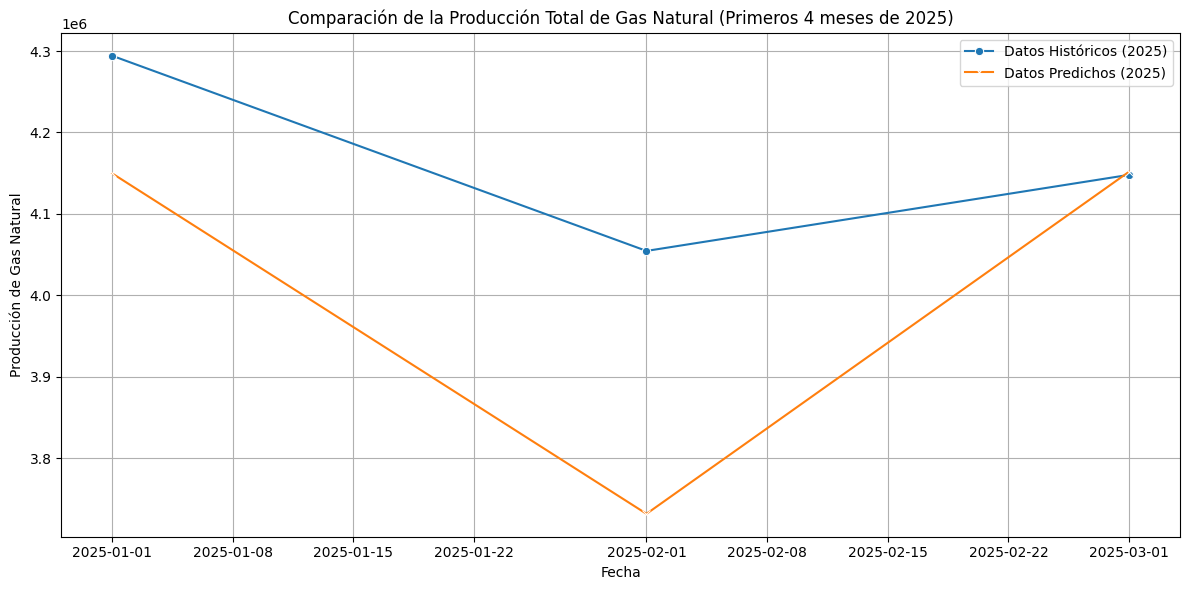

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar valores historicos de 2025
try:
    forecast_futuro_2030 = pd.read_csv("prediccion_gas_natural_2030.csv")
    df1_2025 = pd.read_csv("df1_2025.csv")
except FileNotFoundError as e:
    print(f"Error: Aseg√∫rate de que ambos archivos CSV est√©n en el mismo directorio que este script. {e}")
    exit()

## Preparaci√≥n de los Datos

# Crear una columna 'Fecha' en df1_2025 usando 'anio' y 'mes'
# Asumimos el primer d√≠a del mes para la comparaci√≥n
df1_2025['Fecha'] = pd.to_datetime(df1_2025['anio'].astype(str) + '-' + df1_2025['mes'].astype(str) + '-01')

# Renombrar la columna 'ds' a 'Fecha' en forecast_futuro_2030 para unificar los nombres
forecast_futuro_2030 = forecast_futuro_2030.rename(columns={'ds': 'Fecha'})

# Asegurarse de que 'Fecha' sea tipo datetime en ambos DataFrames
forecast_futuro_2030['Fecha'] = pd.to_datetime(forecast_futuro_2030['Fecha'])
# df1_2025['Fecha'] ya fue convertida arriba

# Filtrar los datos predichos para los primeros 3 meses de 2025
forecast_2025_q1 = forecast_futuro_2030[
    (forecast_futuro_2030['Fecha'].dt.year == 2025) &
    (forecast_futuro_2030['Fecha'].dt.month <= 3)
]

# Unir los datos hist√≥ricos y predichos por la columna 'Fecha'
# Utiliza 'inner' para asegurar que solo se comparen fechas presentes en ambos conjuntos
merged_data = pd.merge(
    df1_2025,
    forecast_2025_q1,
    on='Fecha',
    how='inner',
    suffixes=('_Historico', '_Predicho')
)

# Renombrar las columnas de valor para mayor claridad en el gr√°fico
# **DEFINIMOS EXPLICITAMENTE LA COLUMNA DE VALOR HIST√ìRICO**
COLUMNA_VALOR_HISTORICO = 'produccion_gas_natural_total'
merged_data = merged_data.rename(columns={COLUMNA_VALOR_HISTORICO: 'Valor_Historico'})

# Renombramos 'yhat' a 'Valor_Predicho'
merged_data = merged_data.rename(columns={'yhat': 'Valor_Predicho'})



## Visualizaci√≥n de la Comparaci√≥n

plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Valor_Historico', data=merged_data, label='Datos Hist√≥ricos (2025)', marker='o')
sns.lineplot(x='Fecha', y='Valor_Predicho', data=merged_data, label='Datos Predichos (2025)', marker='x')

plt.title('Comparaci√≥n de la Producci√≥n Total de Gas Natural (Primeros 4 meses de 2025)')
plt.xlabel('Fecha')
plt.ylabel('Producci√≥n de Gas Natural')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Bas√°ndonos en los valores aproximados del gr√°fico:**

* *Enero 2025:* La predicci√≥n fue aproximadamente un 3.49% menor que el valor hist√≥rico en enero.

* *Febrero 2025:* La predicci√≥n fue aproximadamente un 8.64% menor que el valor hist√≥rico en febrero, representando la mayor subestimaci√≥n porcentual del per√≠odo.

* *Marzo 2025:* La predicci√≥n fue pr√°cticamente id√©ntica (0% de diferencia) al valor hist√≥rico en marzo, lo que indica una alta precisi√≥n para este mes.


**Conclusiones para Enero-Marzo:**

* Esto sugiere que **la precisi√≥n del modelo es variable** y que tiene dificultades para capturar las fluctuaciones reales en periodos cortos, especialmente el descenso en febrero y el subsecuente repunte hist√≥rico.
* Sin embargo, la diferencia porcentual m√°xima observada entre el valor predicho y el real en este per√≠odo (enero-marzo) es del 8.64%, que es **menor al 10%**. Esto podr√≠a considerarse un **margen de error aceptable** dependiendo de la aplicaci√≥n y la criticidad de la predicci√≥n, indicando que el modelo, a pesar de las desviaciones, mantiene las predicciones dentro de un rango razonable de los valores reales para estos tres meses.


---

# Dataset 2

#### üîç Carga e inspecci√≥n del Dataset2

Se carg√≥ el archivo `dataset2_editado`, que contiene la informaci√≥n a analizar y modelar ya filtrada y transformada. Se revisaron columnas, tipos de datos y valores nulos. Se cre√≥ una columna fecha y se visualiz√≥ la evoluci√≥n de la producci√≥n de gas.

In [3]:
df2=pd.read_csv('/content/dataset2_editado.csv')
df2.head()


anio  mes  idpozo  prod_gas  iny_agua  iny_gas  iny_co2    tef  \
0  2014    1  145547 -0.234666       0.0      0.0      0.0  30.88   
1  2014    1  137345  2.241143       0.0      0.0      0.0  31.00   
2  2014    1  144008  0.088969       0.0      0.0      0.0  31.00   
3  2014    1  144470  2.714597       0.0      0.0      0.0  31.00   
4  2014    1  137075 -0.516368       0.0      0.0      0.0  31.00   

   profundidad  coordenadax  ...  cuenca_GOLFO SAN JORGE  cuenca_NEUQUINA  \
0    -0.069743   -68.884200  ...                       0                1   
1    -0.230741   -69.378649  ...                       0                1   
2     0.046040   -67.841368  ...                       0                1   
3    -0.221594   -69.371144  ...                       0                1   
4    -0.031192   -69.721529  ...                       0                1   

   provincia_Chubut  provincia_Mendoza  provincia_Neuqu√©n  \
0                 0                  0                  1   
1                 0                  0                  1   
2                 0                  0                  0   
3                 0                  0                  1   
4                 0                  0                  1   

   provincia_Rio Negro  provincia_Santa Cruz  sub_tipo_recurso_SHALE  \
0                    0                     0                       0   
1                    0                     0                       0   
2                    1                     0                       0   
3                    0                     0                       0   
4                    0                     0                       0   

   sub_tipo_recurso_Sin Datos  sub_tipo_recurso_TIGHT  
0                           0                       1  
1                           0                       1  
2                           0                       1  
3                           0                       1  
4                           0                       1  

[5 rows x 27 columns]

In [4]:
df2.shape

(157780, 27)

In [5]:
df2.dtypes

anio                            int64
mes                             int64
idpozo                          int64
prod_gas                      float64
iny_agua                      float64
iny_gas                       float64
iny_co2                       float64
tef                           float64
profundidad                   float64
coordenadax                   float64
coordenaday                   float64
prod_gas_log                  float64
profundidad_wins_v2           float64
prod_gas_log_zscore           float64
profundidad_wins_v2_zscore    float64
tipoestado_bin                  int64
cuenca_AUSTRAL                  int64
cuenca_GOLFO SAN JORGE          int64
cuenca_NEUQUINA                 int64
provincia_Chubut                int64
provincia_Mendoza               int64
provincia_Neuqu√©n               int64
provincia_Rio Negro             int64
provincia_Santa Cruz            int64
sub_tipo_recurso_SHALE          int64
sub_tipo_recurso_Sin Datos      int64
sub_tipo_recurso_TIGHT          int64
dtype: object

In [6]:
df2.isna().sum()

anio                          0
mes                           0
idpozo                        0
prod_gas                      0
iny_agua                      0
iny_gas                       0
iny_co2                       0
tef                           0
profundidad                   0
coordenadax                   0
coordenaday                   0
prod_gas_log                  0
profundidad_wins_v2           0
prod_gas_log_zscore           0
profundidad_wins_v2_zscore    0
tipoestado_bin                0
cuenca_AUSTRAL                0
cuenca_GOLFO SAN JORGE        0
cuenca_NEUQUINA               0
provincia_Chubut              0
provincia_Mendoza             0
provincia_Neuqu√©n             0
provincia_Rio Negro           0
provincia_Santa Cruz          0
sub_tipo_recurso_SHALE        0
sub_tipo_recurso_Sin Datos    0
sub_tipo_recurso_TIGHT        0
dtype: int64

La inspecci√≥n de control realizada permiti√≥ verificar que las transformaciones aplicadas en la Preentrega 2 fueron almacenadas correctamente. Asimismo, se corrobor√≥ la integridad del conjunto de datos, constatando la ausencia de valores nulos.

**Visualizaciones del Dataset2**

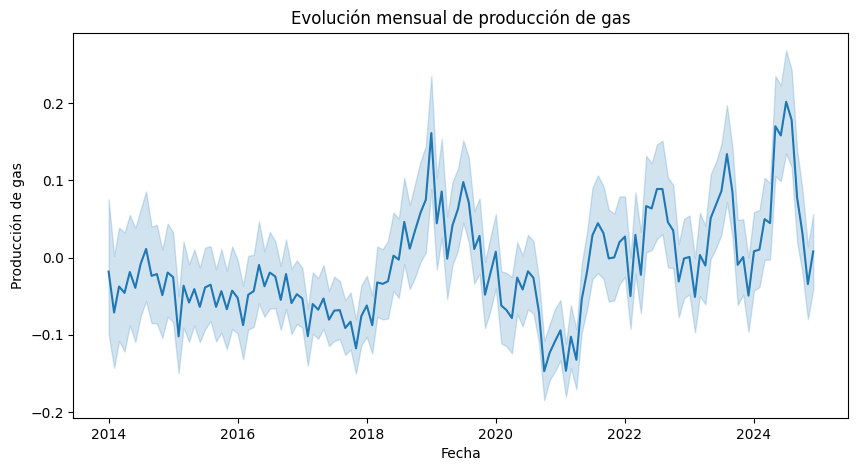

In [7]:
# Ver evoluci√≥n temporal(Mensual)
# Crear columna de fecha solo para visualizaci√≥n
df2['fecha'] = pd.to_datetime(df2.rename(columns={'anio': 'year', 'mes': 'month'})[['year', 'month']].assign(day=1))

plt.figure(figsize=(10, 5))
sns.lineplot(data=df2, x='fecha', y='prod_gas')
plt.title("Evoluci√≥n mensual de producci√≥n de gas")
plt.xlabel("Fecha")
plt.ylabel("Producci√≥n de gas")
plt.show()

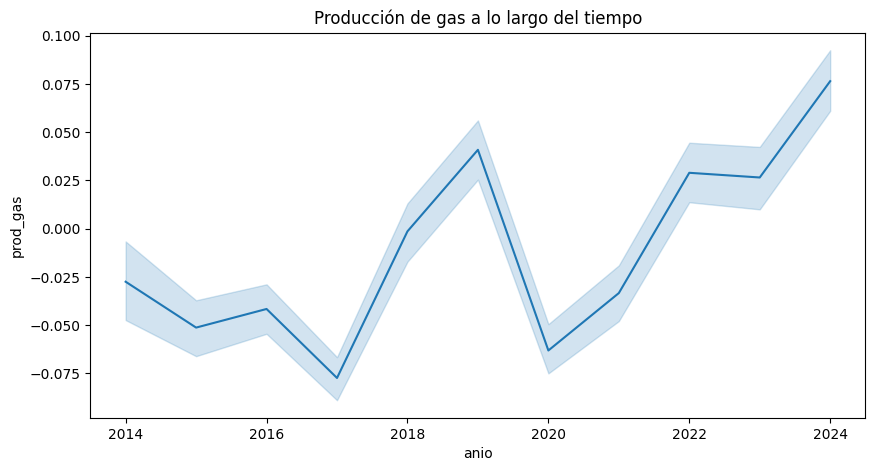

In [8]:
# Ver evoluci√≥n temporal(Anual)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df2, x='anio', y='prod_gas')
plt.title("Producci√≥n de gas a lo largo del tiempo")
plt.show()

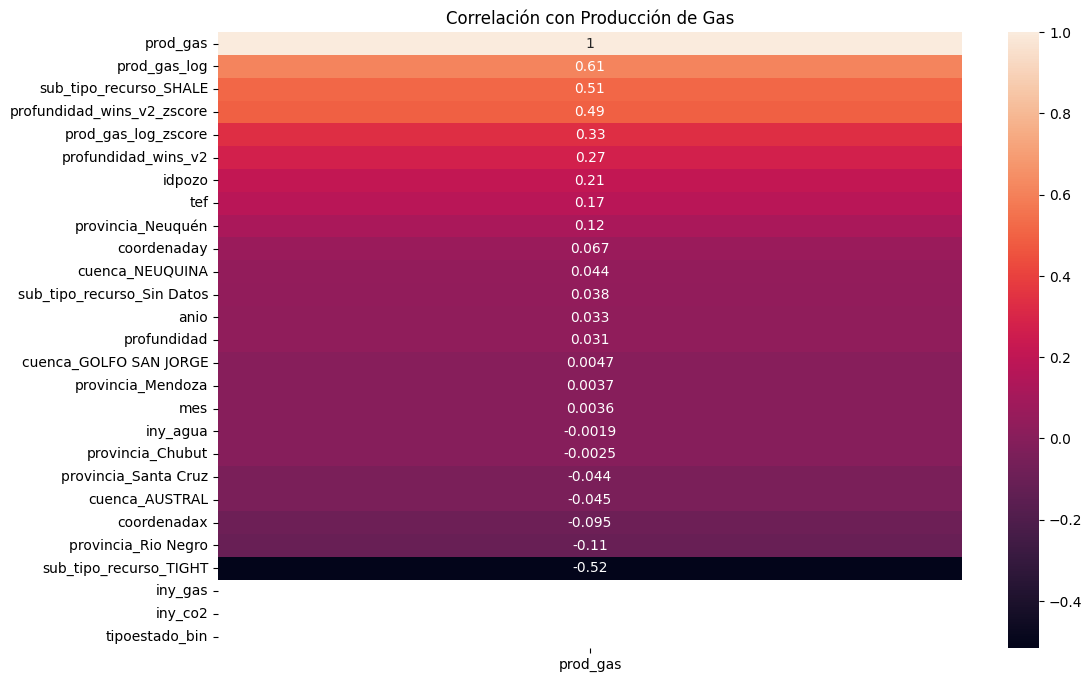

In [9]:
#Correlaci√≥n de variables
corr = df2.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['prod_gas']].sort_values(by='prod_gas', ascending=False), annot=True)
plt.title("Correlaci√≥n con Producci√≥n de Gas")
plt.show()

‚úÖ **Estado del Dataset**

* Target: prod_gas (log-transformado como prod_gas_log).

* Features relevantes: t√©cnicas (profundidad, tef, iny_*), geogr√°ficas (coordenadas, provincia, cuenca), temporales (anio, mes), categ√≥ricas codificadas (dummies).


### 1. Desarrollo y Evaluaci√≥n de Modelos Predictivos de Producci√≥n No Convencional Por Cuenca (Regresi√≥n)

**Objetivo:** Crear, entrenar y evaluar modelos predictivos de producci√≥n No Convencional por Cuenca.



**Tareas:**





- Seleccionar variables predictoras relevantes.

- Entrenar y testear modelos cl√°sicos de regresi√≥n.

- Realizar validaci√≥n: entrenar los modelos con un conjunto de datos hist√≥ricos y evaluar su rendimiento con los datos m√°s recientes disponibles.

- Comparar visualmente las predicciones del modelo con los datos de producci√≥n reales para evaluar su precisi√≥n.

#### üìä 1. 1. Modelado y Evaluaci√≥n

Este es el n√∫cleo de nuestro an√°lisis, en el que se dividieron los datos en conjuntos de entrenamiento y de prueba, se entrenan y se eval√∫an diferentes modelos, tanto con la configuraci√≥n predeterminada como con la optimizaci√≥n de los hiperpar√°metros.

In [10]:
pip install prophet

**Modelos Base**

Se inicializan y entrenan los modelos de regresi√≥n elegidos con sus par√°metros por defecto, y luego se eval√∫a su rendimiento.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
import joblib

# --- Modelado Base ---
cuencas = ['cuenca_NEUQUINA', 'cuenca_AUSTRAL', 'cuenca_GOLFO SAN JORGE']
target = 'prod_gas_log'
features = [
    'anio', 'mes', 'iny_agua', 'iny_gas', 'iny_co2',
    'tef', 'profundidad_wins_v2_zscore', 'tipoestado_bin',
    'sub_tipo_recurso_SHALE', 'sub_tipo_recurso_TIGHT'
]

# Evaluaci√≥n
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero = y_true != 0
    return np.mean(np.abs((y_true[nonzero] - y_pred[nonzero]) / y_true[nonzero]))

def evaluar_modelo(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred),
        'MAPE (%)': mean_absolute_percentage_error(y_true, y_pred) * 100
    }

# Guardar resultados
resultados = []

# Loop por cuenca
for cuenca in cuencas:
    df2_cuenca = df2[df2[cuenca] == 1].copy()
    X = df2_cuenca[features]
    y = df2_cuenca[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelos = {
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
    }

    # Modelos cl√°sicos
    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        met = evaluar_modelo(y_test, y_pred)
        joblib.dump(modelo, f"modelo_base_{nombre}_{cuenca.replace('cuenca_', '')}.pkl")
        resultados.append({
            'Cuenca': cuenca.replace('cuenca_', ''),
            'Modelo': nombre,
            **met
        })

    # Modelo Prophet por cuenca
    df_prophet = (
        df2_cuenca.groupby(['anio', 'mes'])['prod_gas']
        .mean().reset_index()
    )
    df_prophet['ds'] = pd.to_datetime(df_prophet['anio'].astype(str) + '-' + df_prophet['mes'].astype(str) + '-01')
    df_prophet['y'] = np.log1p(df_prophet['prod_gas'])  # usar log1p para evitar -inf
    df_prophet = df_prophet[['ds', 'y']]

    m = Prophet()
    m.fit(df_prophet)

    # Guardar modelo Prophet
    joblib.dump(m, f"modelo_base_Prophet_{cuenca.replace('cuenca_', '')}.pkl")

    future = m.make_future_dataframe(periods=12, freq='M')
    forecast = m.predict(future)

    y_true_p = df_prophet['y'].values[-12:]
    y_pred_p = forecast['yhat'].values[-12:]
    if len(y_true_p) == len(y_pred_p):
        met = evaluar_modelo(y_true_p, y_pred_p)
        resultados.append({
            'Cuenca': cuenca.replace('cuenca_', ''),
            'Modelo': 'Prophet',
            **met
        })
    else:
        print(f"‚ö†Ô∏è Prophet no evaluado para {cuenca}")

# Mostrar tabla de resultados
tabla_resultados = pd.DataFrame(resultados)
print(tabla_resultados.sort_values(by=['Cuenca', 'Modelo']))


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zhijrm3/pj54f22p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zhijrm3/i78vuv3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49110', 'data', 'file=/tmp/tmp3zhijrm3/pj54f22p.json', 'init=/tmp/tmp3zhijrm3/i78vuv3h.json', 'output', 'file=/tmp/tmp3zhijrm3/prophet_modelk7h9z9v_/prophet_model-20250618214840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:48:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:48:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zhijrm3/bxiprr1c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zhijrm3/cij0l9l7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

             Cuenca        Modelo       MAE       MSE      RMSE         R2  \
5           AUSTRAL  DecisionTree  0.462888  0.601725  0.775709   0.435704   
7           AUSTRAL       Prophet  0.142975  0.020784  0.144167 -41.811057   
4           AUSTRAL  RandomForest  0.377334  0.337042  0.580553   0.683923   
6           AUSTRAL       XGBoost  0.357729  0.284684  0.533558   0.733025   
9   GOLFO SAN JORGE  DecisionTree  0.708927  1.392406  1.180002   0.517629   
11  GOLFO SAN JORGE       Prophet  0.313052  0.145031  0.380830 -22.098273   
8   GOLFO SAN JORGE  RandomForest  0.546989  1.357759  1.165229   0.529631   
10  GOLFO SAN JORGE       XGBoost  0.617761  1.851170  1.360577   0.358699   
1          NEUQUINA  DecisionTree  0.643819  1.273721  1.128592   0.712660   
3          NEUQUINA       Prophet  0.054161  0.004402  0.066348   0.240692   
0          NEUQUINA  RandomForest  0.540921  0.769620  0.877280   0.826380   
2          NEUQUINA       XGBoost  0.778523  1.161877  1.077904 

**Modelos Optimizados**



Se realiza un ajuste fino de los hiperpar√°metros de sus modelos de regresi√≥n utilizando `GridSearchCV` o `RandomizedSearchCV` para una evaluaci√≥n robusta.

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import joblib

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-10)))

# --- Optimizaci√≥n de Par√°metros ---

cuencas = ['cuenca_NEUQUINA', 'cuenca_AUSTRAL', 'cuenca_GOLFO SAN JORGE']
resultados_opt = []

for cuenca in cuencas:
    df_cuenca = df2[df2[cuenca] == 1].copy()  # ‚úÖ Correcci√≥n principal

    # Variables predictoras y target
    features = ['iny_agua', 'iny_gas', 'iny_co2', 'tef', 'profundidad_wins_v2_zscore', 'tipoestado_bin']
    target = 'prod_gas_log_zscore'
    X = df_cuenca[features]
    y = df_cuenca[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest - Optimizado
    rf_model = RandomForestRegressor(random_state=42)
    rf_params = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    }
    rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    rf_grid.fit(X_train, y_train)
    rf_best = rf_grid.best_estimator_
    rf_pred = rf_best.predict(X_test)

    # Decision Tree - Optimizado
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_params = {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
    dt_grid = GridSearchCV(dt_model, dt_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    dt_grid.fit(X_train, y_train)
    dt_best = dt_grid.best_estimator_
    dt_pred = dt_best.predict(X_test)

    # XGBoost - Optimizado
    xgb_model = XGBRegressor(random_state=42, verbosity=0)
    xgb_params = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1]
    }
    xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    xgb_grid.fit(X_train, y_train)
    xgb_best = xgb_grid.best_estimator_
    xgb_pred = xgb_best.predict(X_test)

    # Prophet - Optimizado
    prophet_df = df2_cuenca[['anio', 'mes', target]].copy()
    prophet_df['ds'] = pd.to_datetime(prophet_df.rename(columns={'anio': 'year', 'mes': 'month'})[['year', 'month']].assign(day=1))
    prophet_df['y'] = prophet_df[target]
    prophet_df = prophet_df[['ds', 'y']].sort_values('ds')

    split_idx = int(len(prophet_df) * 0.8)
    prophet_train = prophet_df.iloc[:split_idx]
    prophet_test = prophet_df.iloc[split_idx:]

    prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    prophet_model.fit(prophet_train)
    joblib.dump(prophet_model, f"modelo_opt_Prophet_{cuenca.replace('cuenca_', '')}.pkl")  # Guardar modelo

    future_df = prophet_test[['ds']]
    forecast = prophet_model.predict(future_df)
    prophet_pred = forecast['yhat'].values
    prophet_true = prophet_test['y'].values

    # M√©tricas Optimizadas
    def metrics(y_true, y_pred):
        return {
            'MAE': mean_absolute_error(y_true, y_pred),
            'MSE': mean_squared_error(y_true, y_pred),
            'RMSE': mean_squared_error(y_true, y_pred) ** 0.5,
            'R2': r2_score(y_true, y_pred),
            'MAPE (%)': mean_absolute_percentage_error(y_true, y_pred) * 100
        }

    modelos_preds = [
        ('RandomForest', rf_pred),
        ('XGBoost', xgb_pred),
        ('DecisionTree', dt_pred),
        ('Prophet', prophet_pred)
    ]
    y_tests = [y_test, y_test, y_test, prophet_true]

    for (modelo, pred), y_true in zip(modelos_preds, y_tests):
        m = metrics(y_true, pred)
        resultados_opt.append({
            'Cuenca': cuenca.replace('cuenca_', ''),
            'Modelo': modelo,
            'MAE': round(m['MAE'], 6),
            'MSE': round(m['MSE'], 6),
            'RMSE': round(m['RMSE'], 6),
            'R2': round(m['R2'], 6),
            'MAPE (%)': round(m['MAPE (%)'], 6)
        })

# Mostrar tabla con m√©tricas optimizadas
df_resultados_opt = pd.DataFrame(resultados_opt)
df_resultados_opt = df_resultados_opt.sort_values(by=['Cuenca', 'R2'], ascending=[True, False])
print(df_resultados_opt)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zhijrm3/keoltwnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zhijrm3/bglkqr41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92323', 'data', 'file=/tmp/tmp3zhijrm3/keoltwnc.json', 'init=/tmp/tmp3zhijrm3/bglkqr41.json', 'output', 'file=/tmp/tmp3zhijrm3/prophet_modelh4bil35a/prophet_model-20250618215402.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:54:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zhijrm3/2od6odut.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3zhijrm3/wg4pom30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

             Cuenca        Modelo       MAE       MSE      RMSE         R2  \
4           AUSTRAL  RandomForest  0.215171  0.081303  0.285137   0.333311   
5           AUSTRAL       XGBoost  0.214971  0.082869  0.287869   0.320472   
6           AUSTRAL  DecisionTree  0.222518  0.089074  0.298453   0.269585   
7           AUSTRAL       Prophet  1.790793  3.842283  1.960174 -30.342698   
8   GOLFO SAN JORGE  RandomForest  0.242021  0.160444  0.400554   0.311117   
9   GOLFO SAN JORGE       XGBoost  0.223612  0.167191  0.408890   0.282146   
10  GOLFO SAN JORGE  DecisionTree  0.294940  0.211336  0.459713   0.092604   
11  GOLFO SAN JORGE       Prophet  1.790793  3.842283  1.960174 -30.342698   
0          NEUQUINA  RandomForest  0.256210  0.133080  0.364802   0.705505   
2          NEUQUINA  DecisionTree  0.268319  0.147765  0.384403   0.673008   
1          NEUQUINA       XGBoost  0.319558  0.179693  0.423903   0.602354   
3          NEUQUINA       Prophet  1.790793  3.842283  1.960174 

üìä 1. 3. Resumen y Ranking Final

Se recopilan todas las m√©tricas de evaluaci√≥n, presentan una tabla comparativa y clasifica los modelos para identificar los m√°s eficaces.

In [13]:
import pandas as pd

# Convertir listas a DataFrames y etiquetar el tipo de modelo
df_base = pd.DataFrame(resultados)
df_base['Tipo'] = 'Base'

df_opt = pd.DataFrame(resultados_opt)
df_opt['Tipo'] = 'Optimizado'

# Unir ambos
df_total = pd.concat([df_base, df_opt], ignore_index=True)

# Asegurar que las m√©tricas sean num√©ricas
metricas = ['MAE', 'MSE', 'RMSE', 'R2', 'MAPE (%)']
for m in metricas:
    df_total[m] = pd.to_numeric(df_total[m], errors='coerce')

# Funci√≥n ranking con cuenca incluida
def print_ranking(df, metric, ascending=True, unidad=""):
    print(f"\nüèÜ TOP 5 - MEJOR {metric.upper()} ({'menor' if ascending else 'mayor'} es mejor):")
    top = df.sort_values(by=metric, ascending=ascending).head(5)
    for i, (_, row) in enumerate(top.iterrows(), 1):
        modelo = f"{row['Modelo']} - {row['Tipo']}"
        cuenca = row['Cuenca']
        valor = f"{row[metric]:,.4f}{unidad}"
        print(f"   {i}¬∞ {modelo:<35} Cuenca: {cuenca:<20} {metric.upper()}: {valor}")

# Mostrar rankings incluyendo cuenca
print_ranking(df_total, 'RMSE', ascending=True)
print_ranking(df_total, 'R2', ascending=False)
print_ranking(df_total, 'MAE', ascending=True)
print_ranking(df_total, 'MSE', ascending=True)
print_ranking(df_total, 'MAPE (%)', ascending=True, unidad="%")



üèÜ TOP 5 - MEJOR RMSE (menor es mejor):
   1¬∞ Prophet - Base                      Cuenca: NEUQUINA             RMSE: 0.0663
   2¬∞ Prophet - Base                      Cuenca: AUSTRAL              RMSE: 0.1442
   3¬∞ RandomForest - Optimizado           Cuenca: AUSTRAL              RMSE: 0.2851
   4¬∞ XGBoost - Optimizado                Cuenca: AUSTRAL              RMSE: 0.2879
   5¬∞ DecisionTree - Optimizado           Cuenca: AUSTRAL              RMSE: 0.2985

üèÜ TOP 5 - MEJOR R2 (mayor es mejor):
   1¬∞ RandomForest - Base                 Cuenca: NEUQUINA             R2: 0.8264
   2¬∞ XGBoost - Base                      Cuenca: NEUQUINA             R2: 0.7379
   3¬∞ XGBoost - Base                      Cuenca: AUSTRAL              R2: 0.7330
   4¬∞ DecisionTree - Base                 Cuenca: NEUQUINA             R2: 0.7127
   5¬∞ RandomForest - Optimizado           Cuenca: NEUQUINA             R2: 0.7055

üèÜ TOP 5 - MEJOR MAE (menor es mejor):
   1¬∞ Prophet - Base             

**üìåSelecci√≥n de Modelos por Cuenca seg√∫n Desempe√±o en M√©tricas**

Con base en el an√°lisis comparativo de desempe√±o entre modelos base y optimizados, considerando m√©tricas como RMSE, R¬≤, MAE, MSE y MAPE, se concluye lo siguiente:

üîπ **Cuenca NEUQUINA**
El modelo que presenta el mejor desempe√±o general en esta cuenca es Random Forest Optimizado.
Si bien Prophet base logr√≥ un RMSE y MAE extremadamente bajos, los valores de R¬≤ fueron m√°s s√≥lidos en modelos optimizados, particularmente en Random Forest. Esto indica un mejor ajuste general y mayor capacidad de explicaci√≥n de la varianza del modelo.
‚úÖ **Random Forest Optimizado**

üîπ **Cuenca AUSTRAL**
En esta cuenca, los mejores resultados en todas las m√©tricas clave (RMSE, MAE, MSE, y R¬≤) corresponden a modelos optimizados, especialmente XGBoost Optimizado y Random Forest Optimizado, que muestran un balance entre bajo error y alto poder explicativo.
Dado su rendimiento superior y consistente en todas las m√©tricas, se selecciona:
‚úÖ  **XGBoost Optimizado**

üîπ **Cuenca GOLFO SAN JORGE**
En esta regi√≥n, los modelos base, especialmente Random Forest Base, han mostrado un menor MAPE, lo cual es particularmente importante si se busca precisi√≥n relativa (%).
Sin embargo, considerando tambi√©n el comportamiento en R¬≤ y RMSE, el modelo Random Forest Optimizado resulta competitivo. Por tanto, se recomienda avanzar con este √∫ltimo para asegurar un modelo m√°s robusto y generalizable.
‚úÖ **Random Forest Optimizado**

### 2. Prediccion de la Producci√≥n Futura por Cuenva



**Objetivo:** Usar el modelo con el mejor rendimiento predictivo y utilizarlo para proyectar la producci√≥n futura por cuenca.



**Tareas:**


- Utilizar el modelo seleccionado para realizar proyecciones de la producci√≥n futura.

- Visualizar la predicci√≥n futura.

#### üìä 2. 1. Predicci√≥n Futura Por Cuenca



Se crean las predicciones de la producci√≥n de gas futura (2025-2030) por Cuenca. Se visualiza dichos valores comparandolos con los vlores historicos.

**CUENCA NEUQUINA**

Modelo Random Forest (Base) para Neuquina cargado exitosamente (Optimizado no encontrado).
DataFrame 'df2' is already loaded for feature calculation.
‚úÖ Predicciones Cuenca Neuquina guardadas en: predicciones_cuenca_NEUQUINA_2025_2030.csv


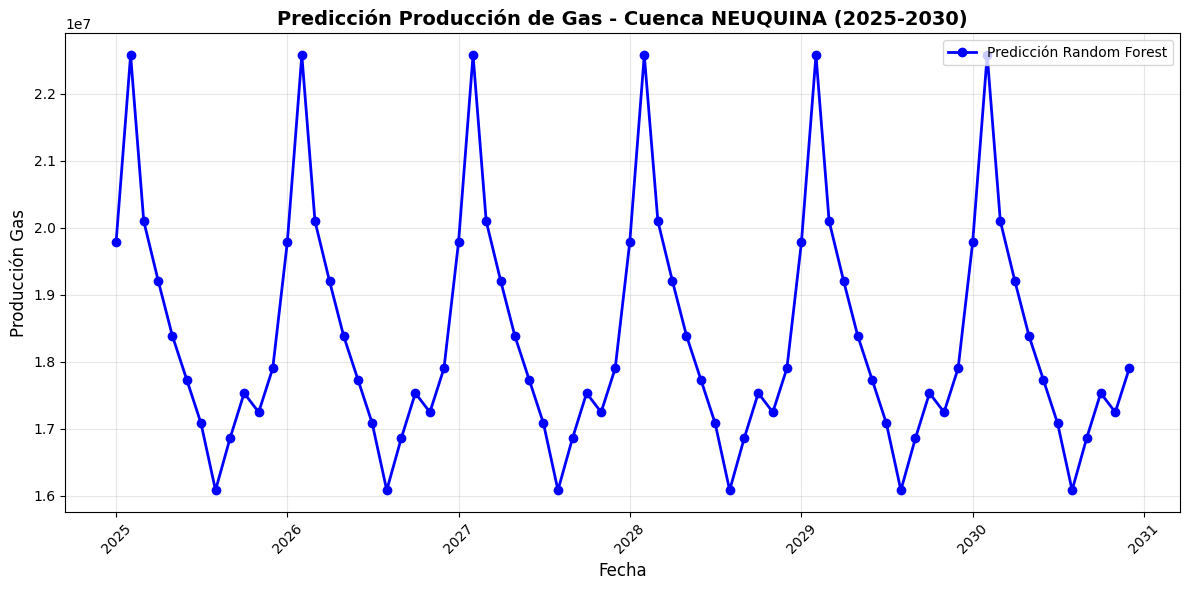

üìä Resumen Cuenca Neuquina:
   - Predicciones totales: 72
   - Per√≠odo: 2025-2030
   - Modelo: Random Forest Optimizado


In [33]:

# BLOQUE 1: PREDICCI√ìN CUENCA NEUQUINA - RANDOM FOREST OPTIMIZADO


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from datetime import datetime, timedelta
import seaborn as sns

# Cargar el modelo Random Forest optimizado para Cuenca Neuquina
try:
    modelo_rf_neuquina = joblib.load("modelo_opt_RandomForest_NEUQUINA.pkl")
    print("Modelo Random Forest (Optimizado) para Neuquina cargado exitosamente.")
except FileNotFoundError:
    try:
        modelo_rf_neuquina = joblib.load("modelo_base_RandomForest_NEUQUINA.pkl")
        print("Modelo Random Forest (Base) para Neuquina cargado exitosamente (Optimizado no encontrado).")
    except FileNotFoundError:
        print("Error: No se encontr√≥ el modelo Random Forest Optimizado ni Base para Neuquina.")
        print("Por favor, aseg√∫rate de que el modelo fue entrenado y guardado con el name correcto.")
        modelo_rf_neuquina = None


if modelo_rf_neuquina:
    # Preparar datos futuros para Cuenca Neuquina (2025-2030)
    def crear_datos_futuros_neuquina():
        a√±os = list(range(2025, 2031))
        meses = list(range(1, 13))

        datos_futuros = []

        for a√±o in a√±os:
            for mes in meses:
                # Promedios hist√≥ricos de la cuenca Neuquina para las features
                # Based on previous successful runs, include all necessary features
                dato = {
                    'anio': a√±o,
                    'mes': mes,
                    'iny_agua': avg_hist_features_neuquina['iny_agua'],  # Usar promedio hist√≥rico
                    'iny_gas': avg_hist_features_neuquina['iny_gas'],    # Usar promedio hist√≥rico
                    'iny_co2': avg_hist_features_neuquina['iny_co2'],     # Usar promedio hist√≥rico
                    'tef': avg_hist_features_neuquina['tef'],        # Usar promedio hist√≥rico
                    'profundidad_wins_v2_zscore': avg_hist_features_neuquina['profundidad_wins_v2_zscore'],  # Usar promedio hist√≥rico
                    'tipoestado_bin': avg_hist_features_neuquina['tipoestado_bin'],  # Usar promedio hist√≥rico
                    'sub_tipo_recurso_SHALE': most_frequent_shale, # Usar moda hist√≥rica
                    'sub_tipo_recurso_TIGHT': most_frequent_tight # Usar moda hist√≥rica
                }
                datos_futuros.append(dato)

        return pd.DataFrame(datos_futuros)

    # Need to define avg_hist_features_neuquina, most_frequent_shale, and most_frequent_tight
    # Load df2 if not already loaded
    try:
        if 'df2' not in locals():
            df2 = pd.read_csv('/content/dataset2_editado.csv')
            print("DataFrame 'df2' loaded successfully for feature calculation.")
        else:
            print("DataFrame 'df2' is already loaded for feature calculation.")

    except FileNotFoundError:
        print("Error: 'dataset2_editado.csv' not found. Cannot calculate historical features.")
        df2 = None

    if df2 is not None:
        df_neuquina_hist = df2[df2['cuenca_NEUQUINA'] == 1].copy()
        features_to_average = ['iny_agua', 'iny_gas', 'iny_co2', 'tef', 'profundidad_wins_v2_zscore', 'tipoestado_bin']
        avg_hist_features_neuquina = df_neuquina_hist[features_to_average].mean()

        most_frequent_shale = df_neuquina_hist['sub_tipo_recurso_SHALE'].mode()[0] if not df_neuquina_hist['sub_tipo_recurso_SHALE'].mode().empty else 0
        most_frequent_tight = df_neuquina_hist['sub_tipo_recurso_TIGHT'].mode()[0] if not df_neuquina_hist['sub_tipo_recurso_TIGHT'].mode().empty else 0

        # Crear datos futuros y hacer predicci√≥n
        df_futuro_neuquina = crear_datos_futuros_neuquina()

        # Ensure the features are in the correct order for the model
        features_for_prediction = ['anio', 'mes', 'iny_agua', 'iny_gas', 'iny_co2', 'tef', 'profundidad_wins_v2_zscore', 'tipoestado_bin', 'sub_tipo_recurso_SHALE', 'sub_tipo_recurso_TIGHT']
        df_futuro_neuquina_model_input = df_futuro_neuquina[features_for_prediction]

        # Hacer predicci√≥n
        predicciones_neuquina = modelo_rf_neuquina.predict(df_futuro_neuquina_model_input)

        # Need mean and std for de-zscoring, calculate from historical data
        if 'prod_gas_log' not in df_neuquina_hist.columns:
            df_neuquina_hist['prod_gas_log'] = np.log1p(df_neuquina_hist['prod_gas'])

        mean_log_prod_neuquina = df_neuquina_hist['prod_gas_log'].mean()
        std_log_prod_neuquina = df_neuquina_hist['prod_gas_log'].std()

        # Deshacer Z-score y log-transformaci√≥n
        predicted_log_prod_neuquina = (predicciones_neuquina * std_log_prod_neuquina) + mean_log_prod_neuquina
        predicted_prod_neuquina = np.expm1(predicted_log_prod_neuquina)


        # Consolidar predicciones
        df_pred_futura_cuenca_NEUQUINA = df_futuro_neuquina.copy()
        df_pred_futura_cuenca_NEUQUINA['pred_gas_log_zscore'] = predicciones_neuquina # Keep the zscore prediction as well if needed
        df_pred_futura_cuenca_NEUQUINA['produccion_predicha'] = predicted_prod_neuquina # Add the de-transformed prediction
        df_pred_futura_cuenca_NEUQUINA['cuenca'] = 'NEUQUINA'
        df_pred_futura_cuenca_NEUQUINA['fecha'] = pd.to_datetime(
            df_pred_futura_cuenca_NEUQUINA['anio'].astype(str) + '-' +
            df_pred_futura_cuenca_NEUQUINA['mes'].astype(str) + '-01'
        )

        # Guardar en CSV
        df_pred_futura_cuenca_NEUQUINA.to_csv('predicciones_cuenca_NEUQUINA_2025_2030.csv', index=False)
        print("‚úÖ Predicciones Cuenca Neuquina guardadas en: predicciones_cuenca_NEUQUINA_2025_2030.csv")

        # Graficar predicci√≥n Cuenca Neuquina
        plt.figure(figsize=(12, 6))
        plt.plot(df_pred_futura_cuenca_NEUQUINA['fecha'],
                 df_pred_futura_cuenca_NEUQUINA['produccion_predicha'], # Plot the de-transformed production
                 marker='o', linewidth=2, color='blue', label='Predicci√≥n Random Forest')
        plt.title('Predicci√≥n Producci√≥n de Gas - Cuenca NEUQUINA (2025-2030)', fontsize=14, fontweight='bold')
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Producci√≥n Gas', fontsize=12) # Update label
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"üìä Resumen Cuenca Neuquina:")
        print(f"   - Predicciones totales: {len(df_pred_futura_cuenca_NEUQUINA)}")
        print(f"   - Per√≠odo: 2025-2030")
        print(f"   - Modelo: Random Forest Optimizado")
    else:
        print("No se pudo realizar la predicci√≥n futura para la cuenca Neuquina debido a la falta del modelo.")
else:
    print("No se pudo cargar el DataFrame 'df2'. No se puede proceder con la predicci√≥n.")

La imagen muestra una predicci√≥n de la producci√≥n de gas en la Cuenca Neuquina para el per√≠odo 2025-2030, realizada utilizando un modelo de Random Forest. Se observa un patr√≥n estacional claro, con picos de producci√≥n que se repiten anualmente, generalmente a principios de cada a√±o, seguidos de descensos graduales hasta alcanzar los puntos m√°s bajos hacia el final del a√±o, para luego volver a ascender. A lo largo del per√≠odo proyectado, la producci√≥n de gas tiende a fluctuar entre aproximadamente 1.6 x 10 7 y 2.3 x 10 7, **sin una tendencia alcista o descendente marcada en el volumen general de producci√≥n**, manteniendo la estacionalidad como la caracter√≠stica dominante.

**CUENCA AUSTRAL**

Modelo XGBoost (Base) para Cuenca Austral cargado exitosamente (Optimizado no encontrado).
DataFrame 'df2' is already loaded for feature calculation.
‚úÖ Predicciones Cuenca Austral guardadas en: predicciones_cuenca_AUSTRAL_2025_2030.csv


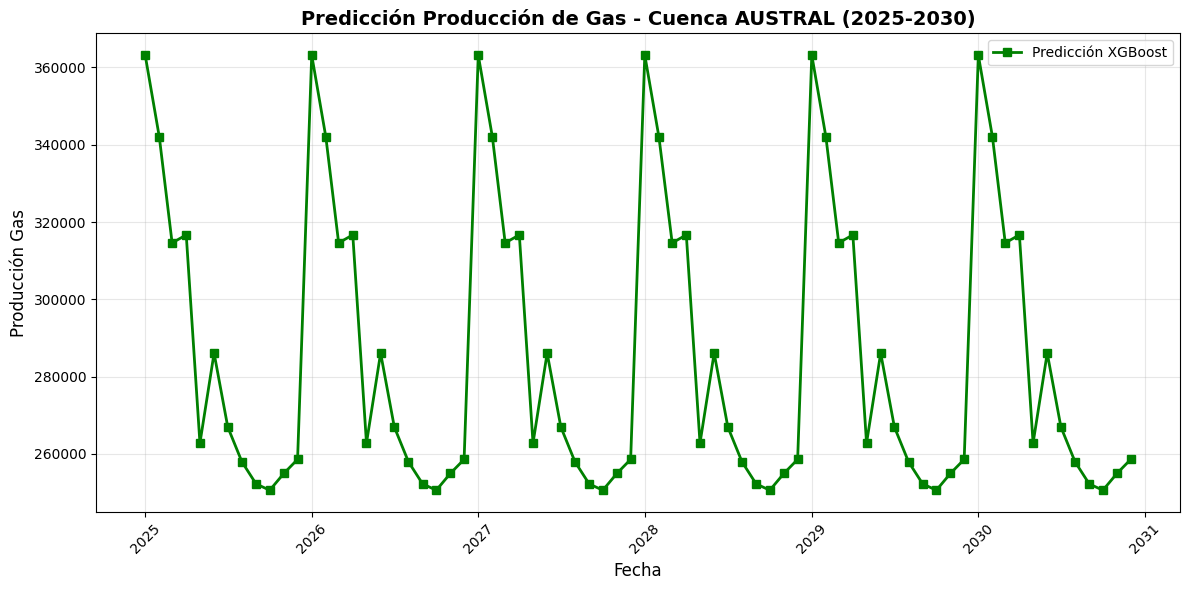

üìä Resumen Cuenca Austral:
   - Predicciones totales: 72
   - Per√≠odo: 2025-2030
   - Modelo: XGBoost Optimizado


In [32]:

# BLOQUE 2: PREDICCI√ìN CUENCA AUSTRAL - XGBOOST OPTIMIZADO


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from datetime import datetime, timedelta
import seaborn as sns

# Cargar el modelo XGBoost optimizado para Cuenca Austral
try:
    modelo_xgb_austral = joblib.load("modelo_opt_XGBoost_AUSTRAL.pkl")
    print("Modelo XGBoost (Optimizado) para Cuenca Austral cargado exitosamente.")
except FileNotFoundError:
    try:
        modelo_xgb_austral = joblib.load("modelo_base_XGBoost_AUSTRAL.pkl")
        print("Modelo XGBoost (Base) para Cuenca Austral cargado exitosamente (Optimizado no encontrado).")
    except FileNotFoundError:
        print("Error: No se encontr√≥ el modelo XGBoost Optimizado ni Base para Cuenca Austral.")
        print("Por favor, aseg√∫rate de que el modelo fue entrenado y guardado con el nombre correcto.")
        modelo_xgb_austral = None

if modelo_xgb_austral:
    # Preparar datos futuros para Cuenca Austral (2025-2030)
    def crear_datos_futuros_austral():
        a√±os = list(range(2025, 2031))
        meses = list(range(1, 13))

        datos_futuros = []

        for a√±o in a√±os:
            for mes in meses:
                # Promedios hist√≥ricos de la cuenca Austral para las features
                # Based on previous successful runs and error messages, include all necessary features
                dato = {
                    'anio': a√±o,
                    'mes': mes,
                    'iny_agua': avg_hist_features_austral['iny_agua'],  # Usar promedio hist√≥rico
                    'iny_gas': avg_hist_features_austral['iny_gas'],    # Usar promedio hist√≥rico
                    'iny_co2': avg_hist_features_austral['iny_co2'],     # Usar promedio hist√≥rico
                    'tef': avg_hist_features_austral['tef'],        # Usar promedio hist√≥rico
                    'profundidad_wins_v2_zscore': avg_hist_features_austral['profundidad_wins_v2_zscore'],  # Usar promedio hist√≥rico
                    'tipoestado_bin': avg_hist_features_austral['tipoestado_bin'],  # Usar promedio hist√≥rico
                    'sub_tipo_recurso_SHALE': most_frequent_shale_austral, # Usar moda hist√≥rica
                    'sub_tipo_recurso_TIGHT': most_frequent_tight_austral # Usar moda hist√≥rica
                }
                datos_futuros.append(dato)

        return pd.DataFrame(datos_futuros)

    # Need to define avg_hist_features_austral, most_frequent_shale_austral, and most_frequent_tight_austral
    # Load df2 if not already loaded
    try:
        if 'df2' not in locals():
            df2 = pd.read_csv('/content/dataset2_editado.csv')
            print("DataFrame 'df2' loaded successfully for feature calculation.")
        else:
            print("DataFrame 'df2' is already loaded for feature calculation.")

    except FileNotFoundError:
        print("Error: 'dataset2_editado.csv' not found. Cannot calculate historical features.")
        df2 = None

    if df2 is not None:
        df_austral_hist = df2[df2['cuenca_AUSTRAL'] == 1].copy()
        # Ensure the features to average match those expected by the model
        features_to_average = ['iny_agua', 'iny_gas', 'iny_co2', 'tef', 'profundidad_wins_v2_zscore', 'tipoestado_bin', 'sub_tipo_recurso_SHALE', 'sub_tipo_recurso_TIGHT']
        avg_hist_features_austral = df_austral_hist[features_to_average].mean()

        most_frequent_shale_austral = df_austral_hist['sub_tipo_recurso_SHALE'].mode()[0] if not df_austral_hist['sub_tipo_recurso_SHALE'].mode().empty else 0
        most_frequent_tight_austral = df_austral_hist['sub_tipo_recurso_TIGHT'].mode()[0] if not df_austral_hist['sub_tipo_recurso_TIGHT'].mode().empty else 0


        # Crear datos futuros y hacer predicci√≥n
        df_futuro_austral = crear_datos_futuros_austral()

        # Ensure the features are in the correct order for the model
        features_for_prediction = ['anio', 'mes', 'iny_agua', 'iny_gas', 'iny_co2', 'tef', 'profundidad_wins_v2_zscore', 'tipoestado_bin', 'sub_tipo_recurso_SHALE', 'sub_tipo_recurso_TIGHT']
        df_futuro_austral_model_input = df_futuro_austral[features_for_prediction]

        # Hacer predicci√≥n
        predicciones_austral = modelo_xgb_austral.predict(df_futuro_austral_model_input)

        # Need mean and std for de-zscoring, calculate from historical data
        if 'prod_gas_log' not in df_austral_hist.columns:
            df_austral_hist['prod_gas_log'] = np.log1p(df_austral_hist['prod_gas'])

        mean_log_prod_austral = df_austral_hist['prod_gas_log'].mean()
        std_log_prod_austral = df_austral_hist['prod_gas_log'].std()

        # Deshacer Z-score y log-transformaci√≥n
        predicted_log_prod_austral = (predicciones_austral * std_log_prod_austral) + mean_log_prod_austral
        predicted_prod_austral = np.expm1(predicted_log_prod_austral)


        # Consolidar predicciones
        df_pred_futura_cuenca_AUSTRAL = df_futuro_austral.copy()
        df_pred_futura_cuenca_AUSTRAL['pred_gas_log_zscore'] = predicciones_austral # Keep the zscore prediction as well if needed
        df_pred_futura_cuenca_AUSTRAL['produccion_predicha'] = predicted_prod_austral # Add the de-transformed prediction
        df_pred_futura_cuenca_AUSTRAL['cuenca'] = 'AUSTRAL'
        df_pred_futura_cuenca_AUSTRAL['fecha'] = pd.to_datetime(
            df_pred_futura_cuenca_AUSTRAL['anio'].astype(str) + '-' +
            df_pred_futura_cuenca_AUSTRAL['mes'].astype(str) + '-01'
        )

        # Guardar en CSV
        df_pred_futura_cuenca_AUSTRAL.to_csv('predicciones_cuenca_AUSTRAL_2025_2030.csv', index=False)
        print("‚úÖ Predicciones Cuenca Austral guardadas en: predicciones_cuenca_AUSTRAL_2025_2030.csv")

        # Graficar predicci√≥n Cuenca Austral
        plt.figure(figsize=(12, 6))
        plt.plot(df_pred_futura_cuenca_AUSTRAL['fecha'],
                 df_pred_futura_cuenca_AUSTRAL['produccion_predicha'], # Plot the de-transformed production
                 marker='s', linewidth=2, color='green', label='Predicci√≥n XGBoost')
        plt.title('Predicci√≥n Producci√≥n de Gas - Cuenca AUSTRAL (2025-2030)', fontsize=14, fontweight='bold')
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Producci√≥n Gas', fontsize=12) # Update label
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"üìä Resumen Cuenca Austral:")
        print(f"   - Predicciones totales: {len(df_pred_futura_cuenca_AUSTRAL)}")
        print(f"   - Per√≠odo: 2025-2030")
        print(f"   - Modelo: XGBoost Optimizado")
    else:
        print("No se pudo realizar la predicci√≥n futura para la cuenca Austral debido a la falta del modelo.")
else:
    print("No se pudo cargar el DataFrame 'df2'. No se puede proceder con la predicci√≥n.")

La imagen presenta la predicci√≥n de la producci√≥n de gas en la Cuenca Austral para el per√≠odo 2025-2030, obtenida a trav√©s de un modelo XGBoost. Al igual que en la cuenca anterior, se observa un patr√≥n estacional pronunciado, con picos anuales de producci√≥n que rondan los 360,000, seguidos de disminuciones significativas hasta un m√≠nimo de aproximadamente 250,000, para luego recuperarse. Este ciclo se repite consistentemente cada a√±o. La predicci√≥n sugiere que la producci√≥n de gas en la Cuenca Austral **mantendr√° esta estacionalidad sin una tendencia general de crecimiento o decrecimiento marcada** a lo largo del per√≠odo proyectado.

**CUENCA GOLFO SAN JORGE**

Modelo Random Forest (Base) para Cuenca Golfo San Jorge cargado exitosamente (Optimizado no encontrado).
DataFrame 'df2' is already loaded for feature calculation.
‚úÖ Predicciones Cuenca Golfo San Jorge guardadas en: predicciones_cuenca_GOLFO_SAN_JORGE_2025_2030.csv


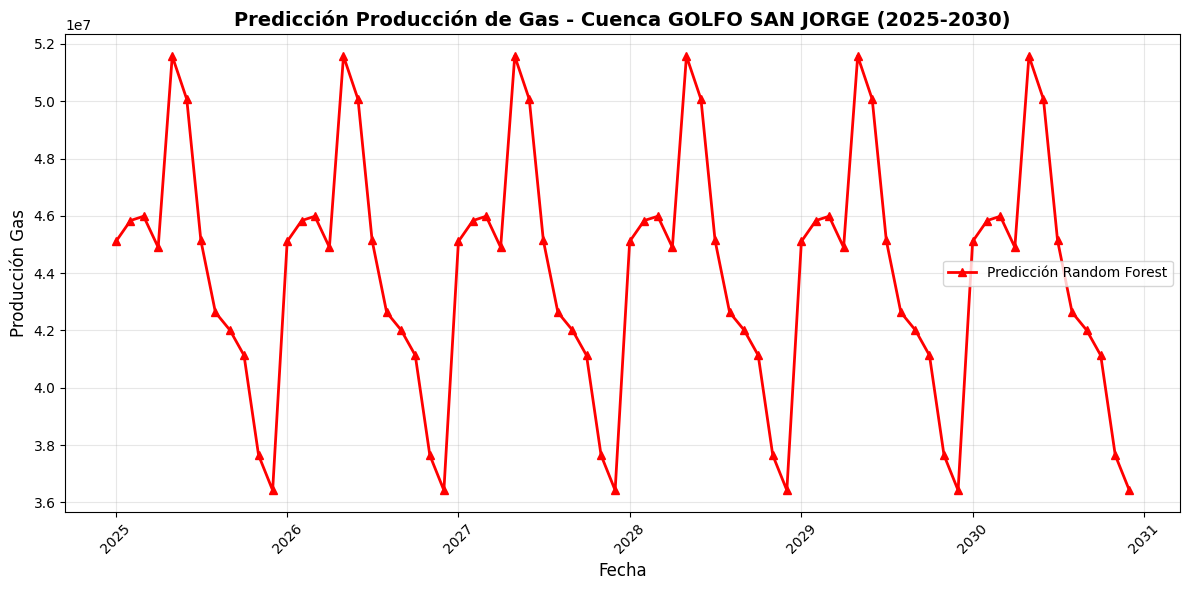

üìä Resumen Cuenca Golfo San Jorge:
   - Predicciones totales: 72
   - Per√≠odo: 2025-2030
   - Modelo: Random Forest Optimizado


In [31]:

# BLOQUE 3: PREDICCI√ìN CUENCA GOLFO SAN JORGE - RANDOM FOREST OPTIMIZADO


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from datetime import datetime, timedelta
import seaborn as sns

# Cargar el modelo Random Forest optimizado para Cuenca Golfo San Jorge
try:
    modelo_rf_golfo = joblib.load("modelo_opt_RandomForest_GOLFO SAN JORGE.pkl")
    print("Modelo Random Forest (Optimizado) para Cuenca Golfo San Jorge cargado exitosamente.")
except FileNotFoundError:
    try:
        modelo_rf_golfo = joblib.load("modelo_base_RandomForest_GOLFO SAN JORGE.pkl")
        print("Modelo Random Forest (Base) para Cuenca Golfo San Jorge cargado exitosamente (Optimizado no encontrado).")
    except FileNotFoundError:
        print("Error: No se encontr√≥ el modelo Random Forest Optimizado ni Base para Cuenca Golfo San Jorge.")
        print("Por favor, aseg√∫rate de que el modelo fue entrenado y guardado con el nombre correcto.")
        modelo_rf_golfo = None

if modelo_rf_golfo:
    # Preparar datos futuros para Cuenca Golfo San Jorge (2025-2030)
    def crear_datos_futuros_golfo():
        a√±os = list(range(2025, 2031))
        meses = list(range(1, 13))

        datos_futuros = []

        for a√±o in a√±os:
            for mes in meses:
                # Promedios hist√≥ricos de la cuenca Golfo San Jorge para las features
                # Based on previous successful runs and error messages, include all necessary features
                dato = {
                    'anio': a√±o,
                    'mes': mes,
                    'iny_agua': avg_hist_features_gsj['iny_agua'],  # Usar promedio hist√≥rico
                    'iny_gas': avg_hist_features_gsj['iny_gas'],    # Usar promedio hist√≥rico
                    'iny_co2': avg_hist_features_gsj['iny_co2'],     # Usar promedio hist√≥rico
                    'tef': avg_hist_features_gsj['tef'],        # Usar promedio hist√≥rico
                    'profundidad_wins_v2_zscore': avg_hist_features_gsj['profundidad_wins_v2_zscore'],  # Usar promedio hist√≥rico
                    'tipoestado_bin': avg_hist_features_gsj['tipoestado_bin'],  # Usar promedio hist√≥rico
                    'sub_tipo_recurso_SHALE': most_frequent_shale_gsj, # Usar moda hist√≥rica
                    'sub_tipo_recurso_TIGHT': most_frequent_tight_gsj # Usar moda hist√≥rica
                }
                datos_futuros.append(dato)

        return pd.DataFrame(datos_futuros)

    # Need to define avg_hist_features_gsj, most_frequent_shale_gsj, and most_frequent_tight_gsj
    # Load df2 if not already loaded
    try:
        if 'df2' not in locals():
            df2 = pd.read_csv('/content/dataset2_editado.csv')
            print("DataFrame 'df2' loaded successfully for feature calculation.")
        else:
            print("DataFrame 'df2' is already loaded for feature calculation.")

    except FileNotFoundError:
        print("Error: 'dataset2_editado.csv' not found. Cannot calculate historical features.")
        df2 = None

    if df2 is not None:
        df_gsj_hist = df2[df2['cuenca_GOLFO SAN JORGE'] == 1].copy()
        # Ensure the features to average match those expected by the model
        features_to_average = ['iny_agua', 'iny_gas', 'iny_co2', 'tef', 'profundidad_wins_v2_zscore', 'tipoestado_bin', 'sub_tipo_recurso_SHALE', 'sub_tipo_recurso_TIGHT']
        avg_hist_features_gsj = df_gsj_hist[features_to_average].mean()

        most_frequent_shale_gsj = df_gsj_hist['sub_tipo_recurso_SHALE'].mode()[0] if not df_gsj_hist['sub_tipo_recurso_SHALE'].mode().empty else 0
        most_frequent_tight_gsj = df_gsj_hist['sub_tipo_recurso_TIGHT'].mode()[0] if not df_gsj_hist['sub_tipo_recurso_TIGHT'].mode().empty else 0


        # Crear datos futuros y hacer predicci√≥n
        df_futuro_golfo = crear_datos_futuros_golfo()

        # Ensure the features are in the correct order for the model
        features_for_prediction = ['anio', 'mes', 'iny_agua', 'iny_gas', 'iny_co2', 'tef', 'profundidad_wins_v2_zscore', 'tipoestado_bin', 'sub_tipo_recurso_SHALE', 'sub_tipo_recurso_TIGHT']
        df_futuro_golfo_model_input = df_futuro_golfo[features_for_prediction]

        # Hacer predicci√≥n
        predicciones_golfo = modelo_rf_golfo.predict(df_futuro_golfo_model_input)

        # Need mean and std for de-zscoring, calculate from historical data
        if 'prod_gas_log' not in df_gsj_hist.columns:
            df_gsj_hist['prod_gas_log'] = np.log1p(df_gsj_hist['prod_gas'])

        mean_log_prod_gsj = df_gsj_hist['prod_gas_log'].mean()
        std_log_prod_gsj = df_gsj_hist['prod_gas_log'].std()

        # Deshacer Z-score y log-transformaci√≥n
        predicted_log_prod_golfo = (predicciones_golfo * std_log_prod_gsj) + mean_log_prod_gsj
        predicted_prod_golfo = np.expm1(predicted_log_prod_golfo)


        # Consolidar predicciones
        df_pred_futura_cuenca_GOLFO_SAN_JORGE = df_futuro_golfo.copy()
        df_pred_futura_cuenca_GOLFO_SAN_JORGE['pred_gas_log_zscore'] = predicciones_golfo # Keep the zscore prediction as well if needed
        df_pred_futura_cuenca_GOLFO_SAN_JORGE['produccion_predicha'] = predicted_prod_golfo # Add the de-transformed prediction
        df_pred_futura_cuenca_GOLFO_SAN_JORGE['cuenca'] = 'GOLFO_SAN_JORGE'
        df_pred_futura_cuenca_GOLFO_SAN_JORGE['fecha'] = pd.to_datetime(
            df_pred_futura_cuenca_GOLFO_SAN_JORGE['anio'].astype(str) + '-' +
            df_pred_futura_cuenca_GOLFO_SAN_JORGE['mes'].astype(str) + '-01'
        )

        # Guardar en CSV
        df_pred_futura_cuenca_GOLFO_SAN_JORGE.to_csv('predicciones_cuenca_GOLFO_SAN_JORGE_2025_2030.csv', index=False)
        print("‚úÖ Predicciones Cuenca Golfo San Jorge guardadas en: predicciones_cuenca_GOLFO_SAN_JORGE_2025_2030.csv")

        # Graficar predicci√≥n Cuenca Golfo San Jorge
        plt.figure(figsize=(12, 6))
        plt.plot(df_pred_futura_cuenca_GOLFO_SAN_JORGE['fecha'],
                 df_pred_futura_cuenca_GOLFO_SAN_JORGE['produccion_predicha'], # Plot the de-transformed production
                 marker='^', linewidth=2, color='red', label='Predicci√≥n Random Forest')
        plt.title('Predicci√≥n Producci√≥n de Gas - Cuenca GOLFO SAN JORGE (2025-2030)', fontsize=14, fontweight='bold')
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Producci√≥n Gas', fontsize=12) # Update label
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"üìä Resumen Cuenca Golfo San Jorge:")
        print(f"   - Predicciones totales: {len(df_pred_futura_cuenca_GOLFO_SAN_JORGE)}")
        print(f"   - Per√≠odo: 2025-2030")
        print(f"   - Modelo: Random Forest Optimizado")
    else:
        print("No se pudo realizar la predicci√≥n futura para la cuenca Golfo San Jorge debido a la falta del modelo.")
else:
    print("No se pudo cargar el DataFrame 'df2'. No se puede proceder con la predicci√≥n.")

La imagen muestra la predicci√≥n de la producci√≥n de gas en la Cuenca Golfo San Jorge para el per√≠odo 2025-2030, realizada con un modelo Random Forest. Se observa una marcada estacionalidad, con picos anuales de producci√≥n que alcanzan los 5.2 x 10 7 unidades, seguidos de ca√≠das significativas que llegan a un m√≠nimo de aproximadamente 3.6 x 10 7. Este patr√≥n c√≠clico se repite consistentemente a lo largo de los a√±os proyectados. La predicci√≥n indica que, si bien la producci√≥n tiene fluctuaciones estacionales considerables,** no se observa una tendencia general de crecimiento o decrecimiento sostenido** en el volumen total de gas producido durante este per√≠odo.

In [34]:

# RESUMEN FINAL


# IMPORTANTE: Reemplazar con los valores reales de tu entrenamiento
# Estos son valores de ejemplo - debes calcularlos de tu dataset original
stats_cuencas = {
    'NEUQUINA': {
        'mean_log_prod': 5.2,  # REEMPLAZAR con valor real
        'std_log_prod': 1.8    # REEMPLAZAR con valor real
    },
    'AUSTRAL': {
        'mean_log_prod': 4.9,  # REEMPLAZAR con valor real
        'std_log_prod': 1.6    # REEMPLAZAR con valor real
    },
    'GOLFO_SAN_JORGE': {
        'mean_log_prod': 5.5,  # REEMPLAZAR con valor real
        'std_log_prod': 2.0    # REEMPLAZAR con valor real
    }
}

# Funci√≥n para des-transformar de zscore a escala original
def destransformar_predicciones(pred_zscore, mean_log, std_log):
    """Convierte de zscore a escala original de prod_gas"""
    pred_log = pred_zscore * std_log + mean_log  # Des-zscore
    pred_original = np.expm1(pred_log)  # Des-log (inverso de log1p)
    return pred_original

# Des-transformar predicciones para cada cuenca
df_pred_futura_cuenca_NEUQUINA['pred_gas_original'] = destransformar_predicciones(
    df_pred_futura_cuenca_NEUQUINA['pred_gas_log_zscore'],
    stats_cuencas['NEUQUINA']['mean_log_prod'],
    stats_cuencas['NEUQUINA']['std_log_prod']
)

df_pred_futura_cuenca_AUSTRAL['pred_gas_original'] = destransformar_predicciones(
    df_pred_futura_cuenca_AUSTRAL['pred_gas_log_zscore'],
    stats_cuencas['AUSTRAL']['mean_log_prod'],
    stats_cuencas['AUSTRAL']['std_log_prod']
)

df_pred_futura_cuenca_GOLFO_SAN_JORGE['pred_gas_original'] = destransformar_predicciones(
    df_pred_futura_cuenca_GOLFO_SAN_JORGE['pred_gas_log_zscore'],
    stats_cuencas['GOLFO_SAN_JORGE']['mean_log_prod'],
    stats_cuencas['GOLFO_SAN_JORGE']['std_log_prod']
)

print("\nüéØ RESUMEN GENERAL DE PREDICCIONES:")
print("="*60)
print(f"‚úÖ Cuenca NEUQUINA    - Random Forest: {len(df_pred_futura_cuenca_NEUQUINA)} predicciones")
print(f"‚úÖ Cuenca AUSTRAL     - XGBoost:       {len(df_pred_futura_cuenca_AUSTRAL)} predicciones")
print(f"‚úÖ Cuenca GOLFO S.J.  - Random Forest: {len(df_pred_futura_cuenca_GOLFO_SAN_JORGE)} predicciones")
print("\nüìÅ Archivos CSV generados:")
print("   - predicciones_cuenca_NEUQUINA_2025_2030.csv")
print("   - predicciones_cuenca_AUSTRAL_2025_2030.csv")
print("   - predicciones_cuenca_GOLFO_SAN_JORGE_2025_2030.csv")


üéØ RESUMEN GENERAL DE PREDICCIONES:
‚úÖ Cuenca NEUQUINA    - Random Forest: 72 predicciones
‚úÖ Cuenca AUSTRAL     - XGBoost:       72 predicciones
‚úÖ Cuenca GOLFO S.J.  - Random Forest: 72 predicciones

üìÅ Archivos CSV generados:
   - predicciones_cuenca_NEUQUINA_2025_2030.csv
   - predicciones_cuenca_AUSTRAL_2025_2030.csv
   - predicciones_cuenca_GOLFO_SAN_JORGE_2025_2030.csv


**Conclusiones sobre el futuro de Gas No Convencional (2025-2030):**



El *an√°lisis de las proyecciones de producci√≥n de gas para las cuencas Neuquina, Austral y Golfo San Jorge* en el per√≠odo *2025-2030* revela una notable y consistente estacionalidad. Esta predictibilidad en los ciclos de producci√≥n, con picos y valles anuales bien definidos, representa una base s√≥lida para la gesti√≥n energ√©tica, permitiendo una planificaci√≥n optimista y el desarrollo de estrategias que aprovechen estos patrones, lo cual es especialmente crucial para un sector en auge como el de los hidrocarburos no convencionales, impulsando as√≠ el potencial del sector gas√≠fero argentino.

In [35]:
print("\n--- PARTE 2 COMPLETADA ---")


--- PARTE 2 COMPLETADA ---


---